
# **Project Name : ✨ Employee turnover prediction  ✨**

AUTHOR : **Jamshed Butt** from **Data Science**



# **Import Librabries**

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

#Normalize Data
from sklearn.preprocessing import StandardScaler

#Conert Categorical to Numerical Value
from sklearn.preprocessing import LabelEncoder

#Columns Relationship for target value
from sklearn.feature_selection import mutual_info_classif,SelectKBest,f_classif

#Splitting Data
from sklearn.model_selection import train_test_split,cross_val_score

#PCA
from sklearn.decomposition import PCA

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
#from sklearn.metrics._plot.roc_curve import auc

# **Load Dataset**

In [355]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [356]:
df.shape

(1470, 35)

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [358]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [359]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

# **Univariate Analysis**

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### **Categorical Varaible**

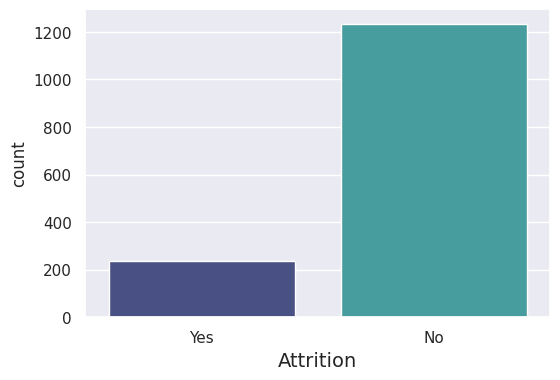

In [361]:
plt.figure(figsize=(6,4))
sns.countplot(x="Attrition",data=df,palette="mako")
plt.xlabel("Attrition", fontsize=14)
plt.show()

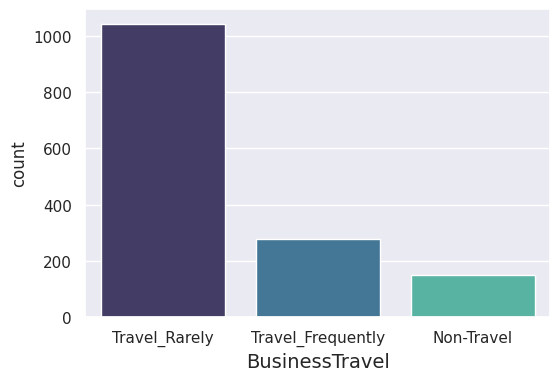

In [362]:
plt.figure(figsize=(6,4))
sns.countplot(x="BusinessTravel",data=df,palette="mako")
plt.xlabel("BusinessTravel", fontsize=14)
plt.show()

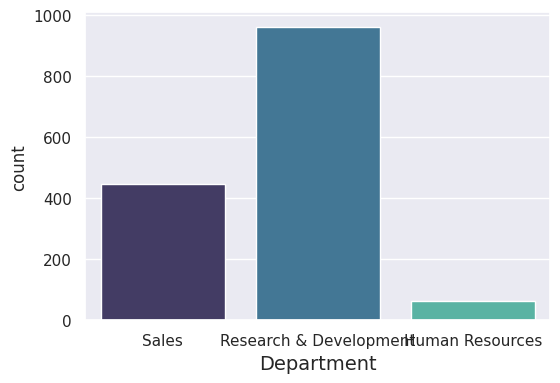

In [363]:
plt.figure(figsize=(6,4))
sns.countplot(x="Department",data=df,palette="mako")
plt.xlabel("Department", fontsize=14)
plt.show()

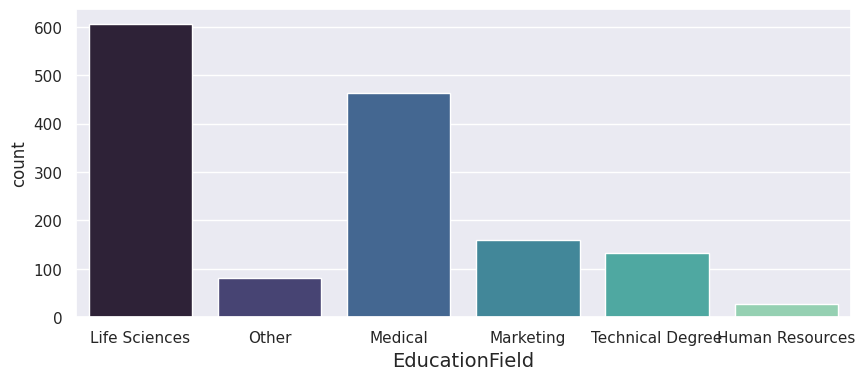

In [364]:
plt.figure(figsize=(10,4))
sns.countplot(x="EducationField",data=df,palette="mako")
plt.xlabel("EducationField", fontsize=14)
plt.show()

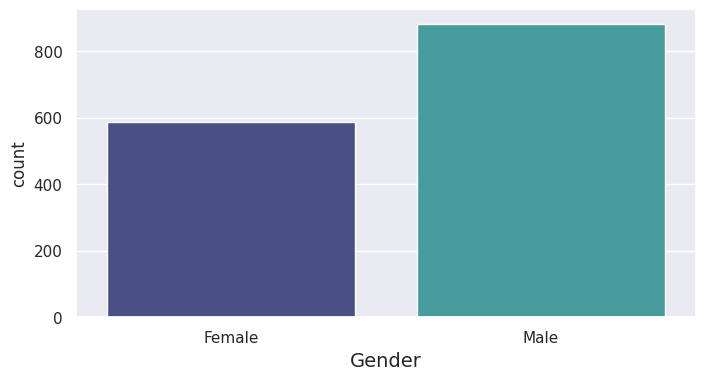

In [365]:
plt.figure(figsize=(8,4))
sns.countplot(x="Gender",data=df,palette="mako")
plt.xlabel("Gender", fontsize=14)
plt.show()

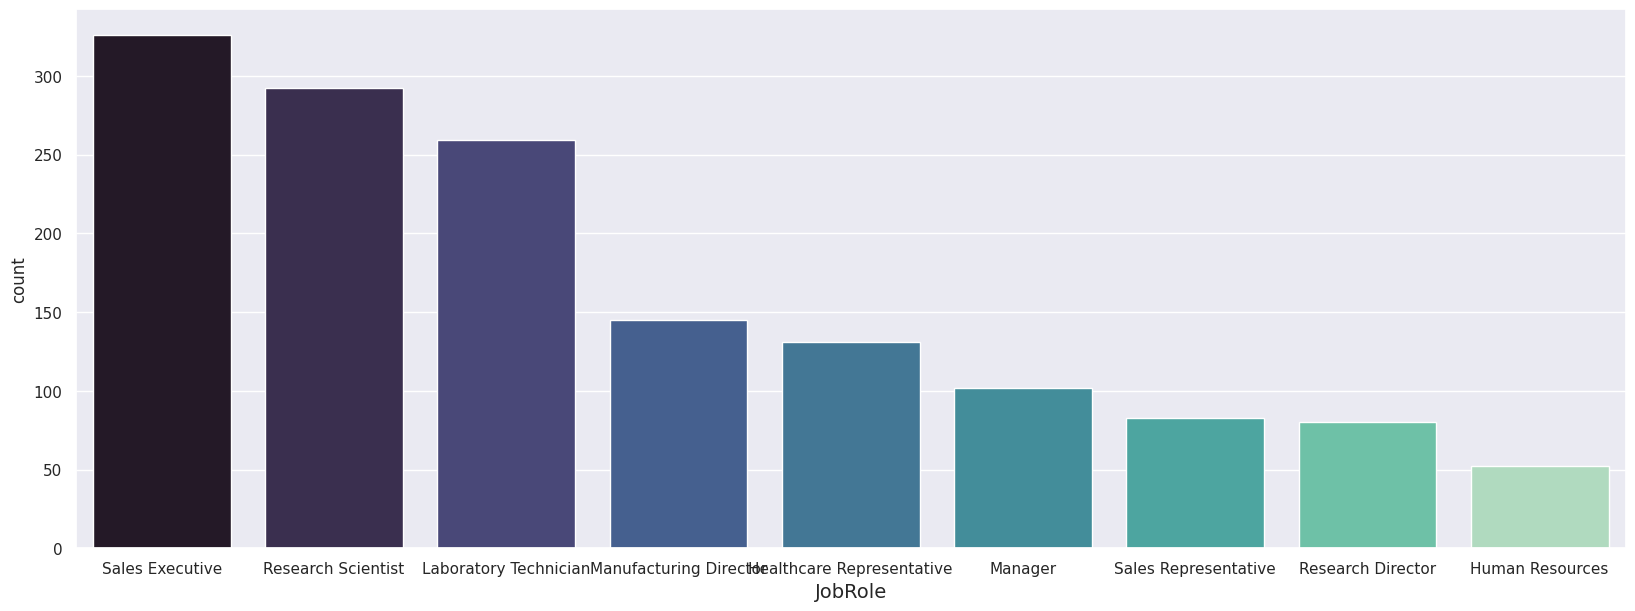

In [366]:
plt.figure(figsize=(20,7))
sns.countplot(x="JobRole",data=df,palette="mako")
plt.xlabel("JobRole", fontsize=14)
plt.show()

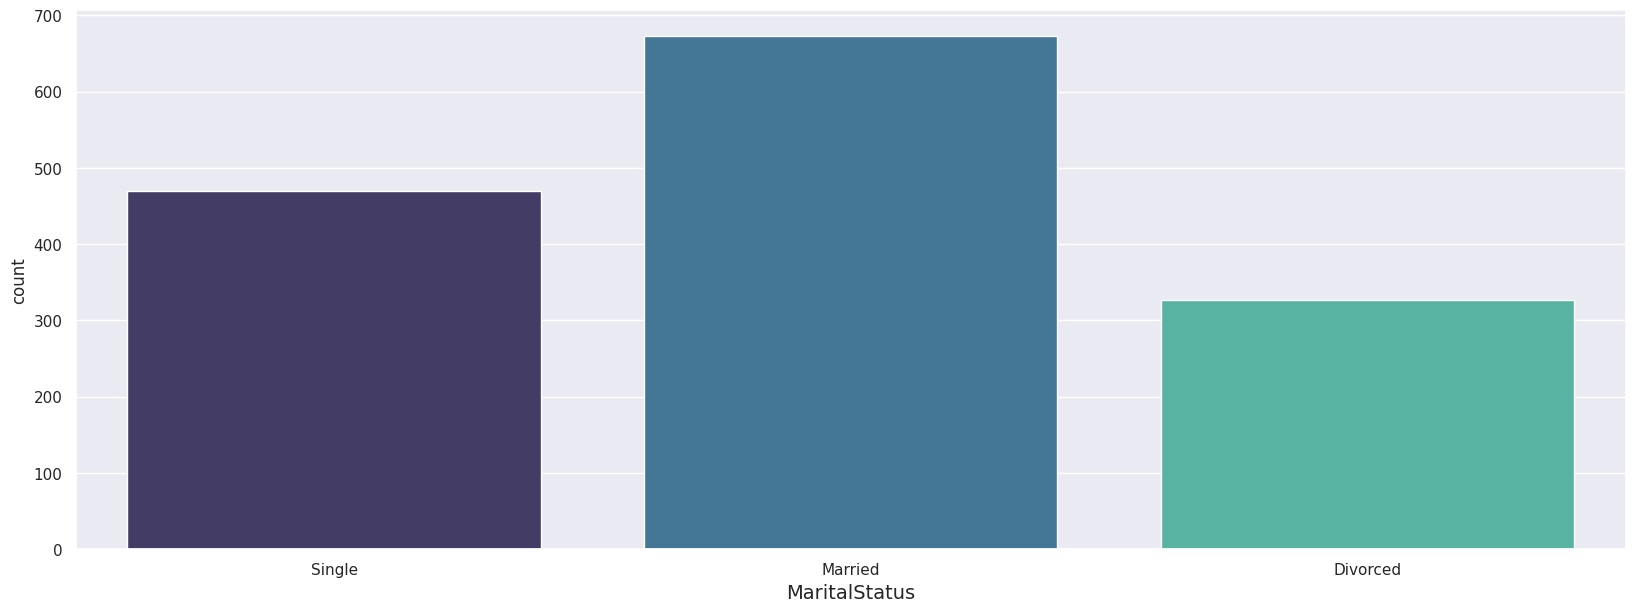

In [367]:
plt.figure(figsize=(20,7))
sns.countplot(x="MaritalStatus",data=df,palette="mako")
plt.xlabel("MaritalStatus", fontsize=14)
plt.show()

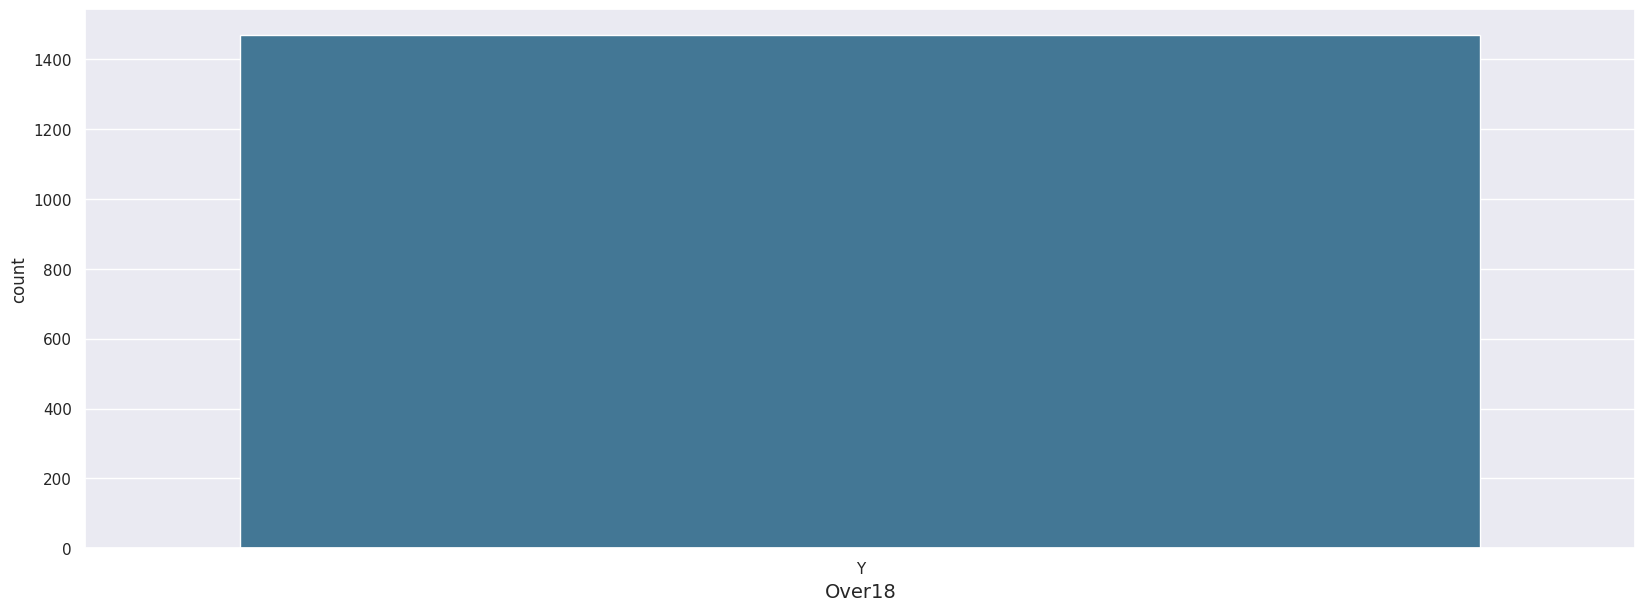

In [368]:
plt.figure(figsize=(20,7))
sns.countplot(x="Over18",data=df,palette="mako")
plt.xlabel("Over18", fontsize=14)
plt.show()

In [369]:
df["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

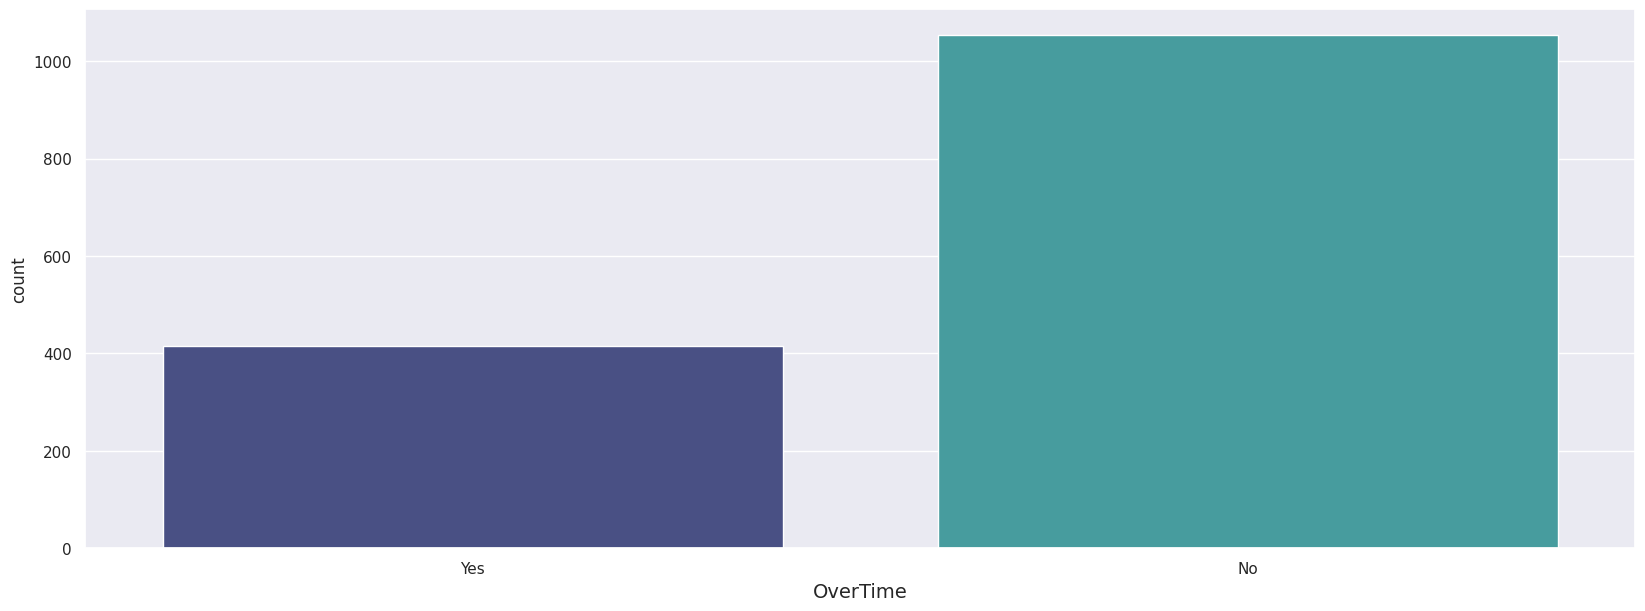

In [370]:
plt.figure(figsize=(20,7))
sns.countplot(x="OverTime",data=df,palette="mako")
plt.xlabel("OverTime", fontsize=14)
plt.show()

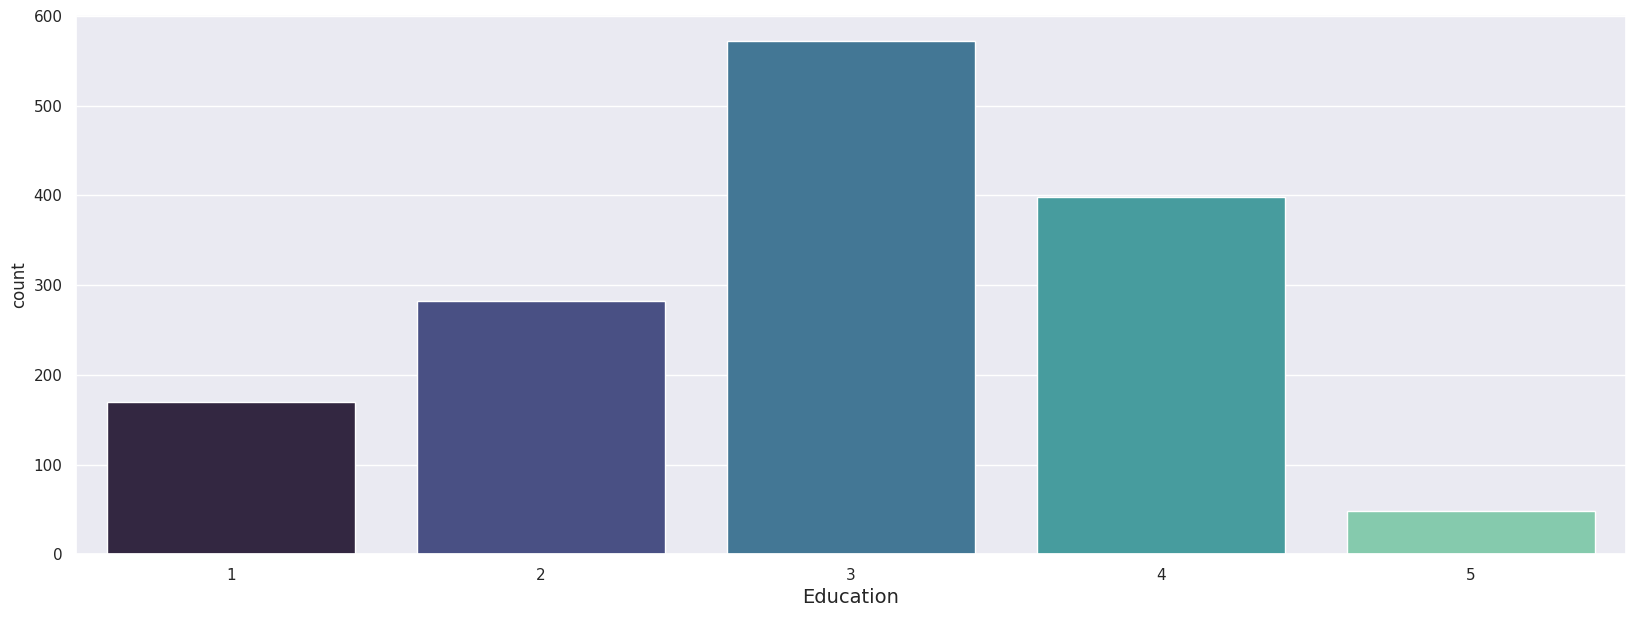

In [371]:
plt.figure(figsize=(20,7))
sns.countplot(x="Education",data=df,palette="mako")
plt.xlabel("Education", fontsize=14)
plt.show()

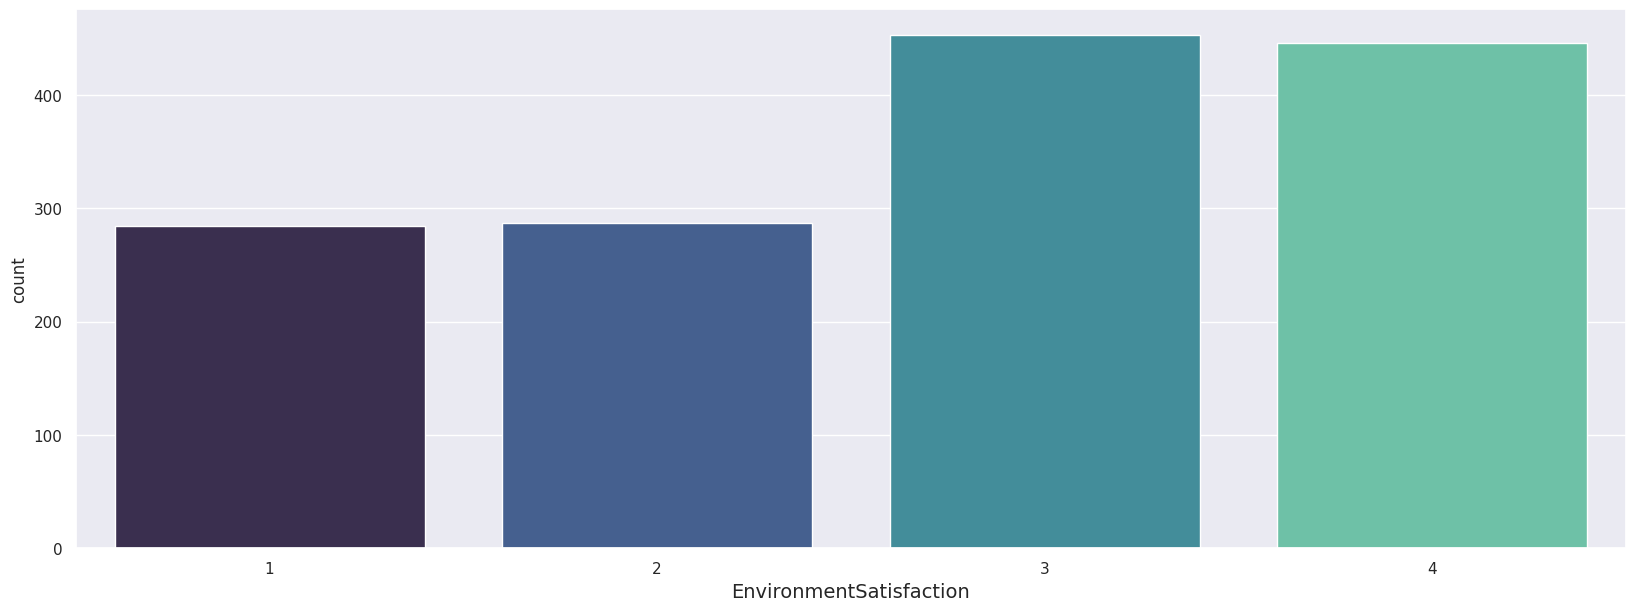

In [372]:
plt.figure(figsize=(20,7))
sns.countplot(x="EnvironmentSatisfaction",data=df,palette="mako")
plt.xlabel("EnvironmentSatisfaction", fontsize=14)
plt.show()

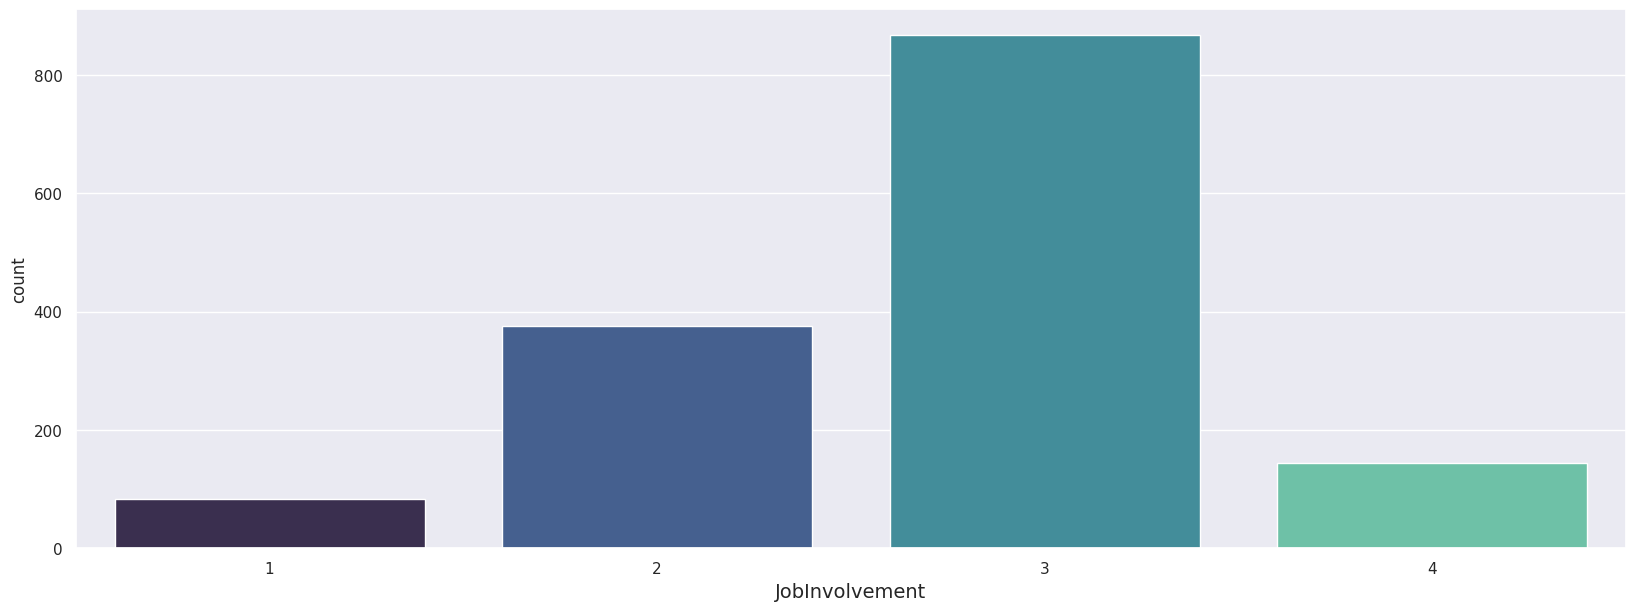

In [373]:
plt.figure(figsize=(20,7))
sns.countplot(x="JobInvolvement",data=df,palette="mako")
plt.xlabel("JobInvolvement", fontsize=14)
plt.show()

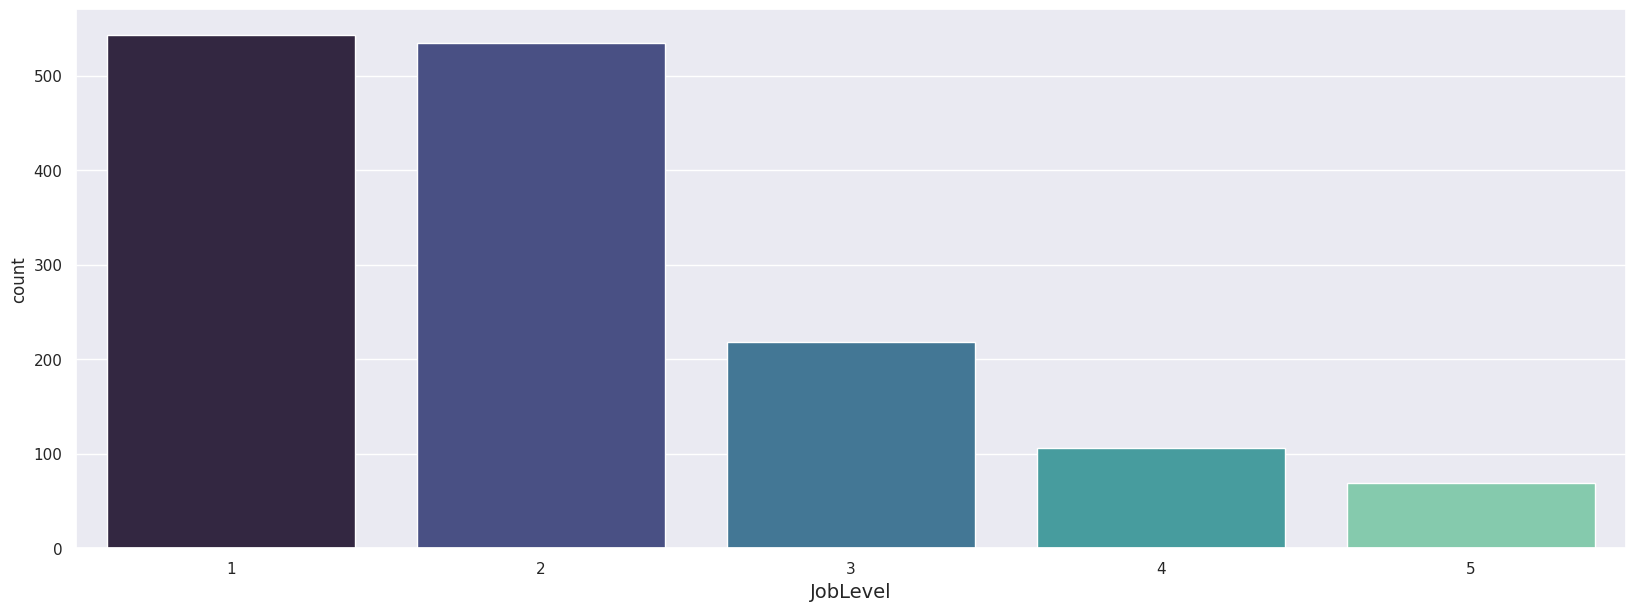

In [374]:

plt.figure(figsize=(20,7))
sns.countplot(x="JobLevel",data=df,palette="mako")
plt.xlabel("JobLevel", fontsize=14)
plt.show()

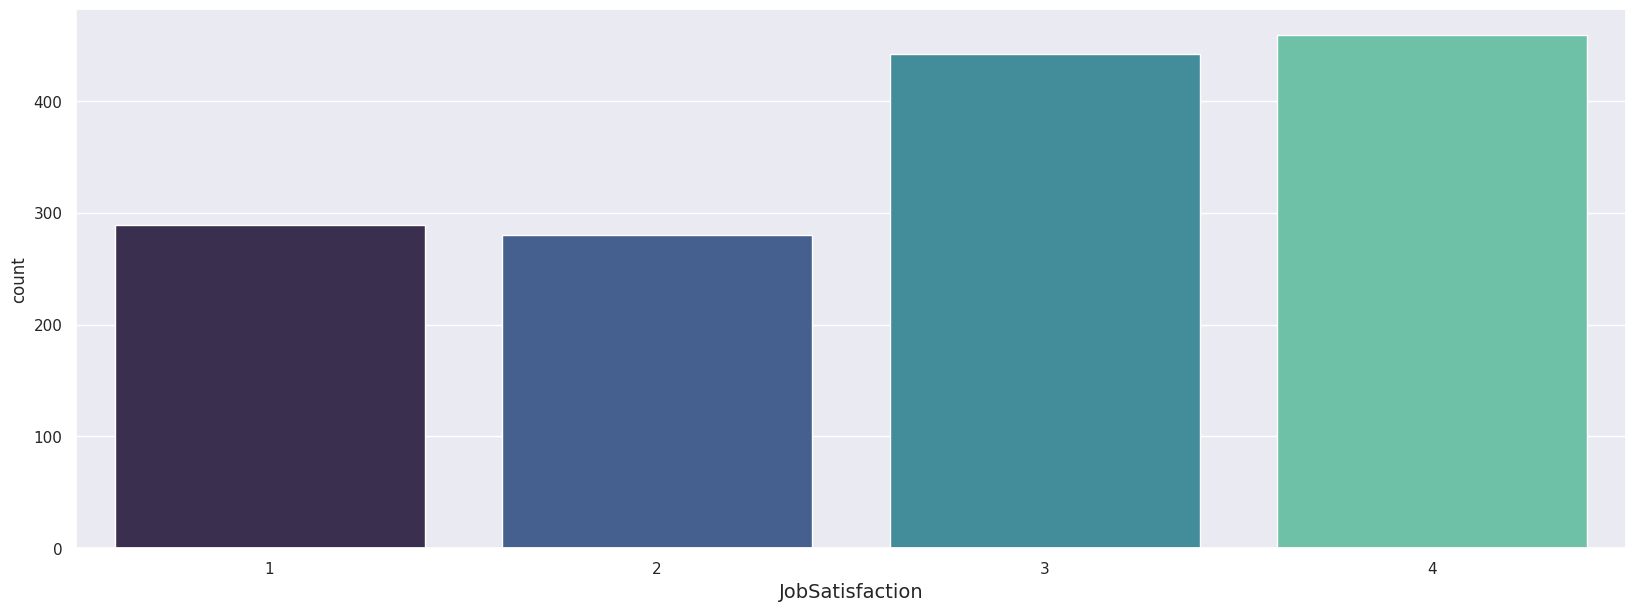

In [375]:
plt.figure(figsize=(20,7))
sns.countplot(x="JobSatisfaction",data=df,palette="mako")
plt.xlabel("JobSatisfaction", fontsize=14)
plt.show()

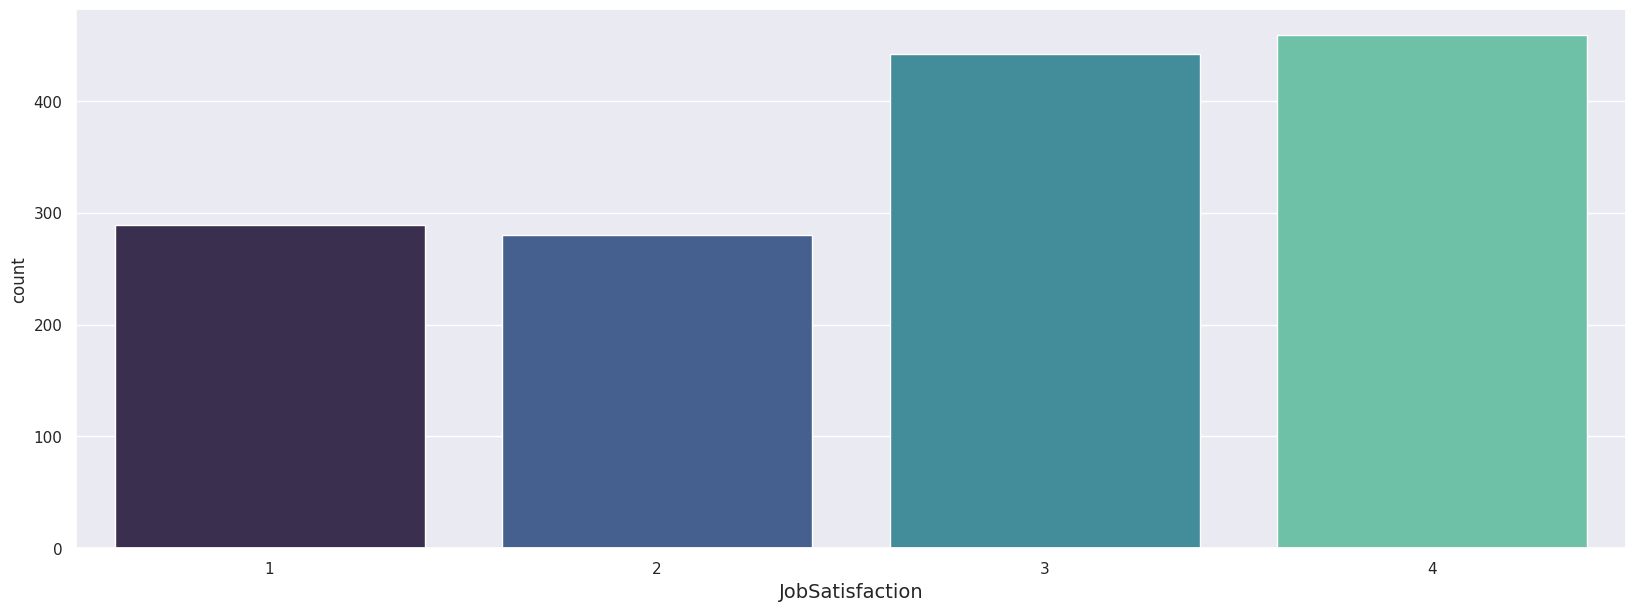

In [376]:
plt.figure(figsize=(20,7))
sns.countplot(x="JobSatisfaction",data=df,palette="mako")
plt.xlabel("JobSatisfaction", fontsize=14)
plt.show()

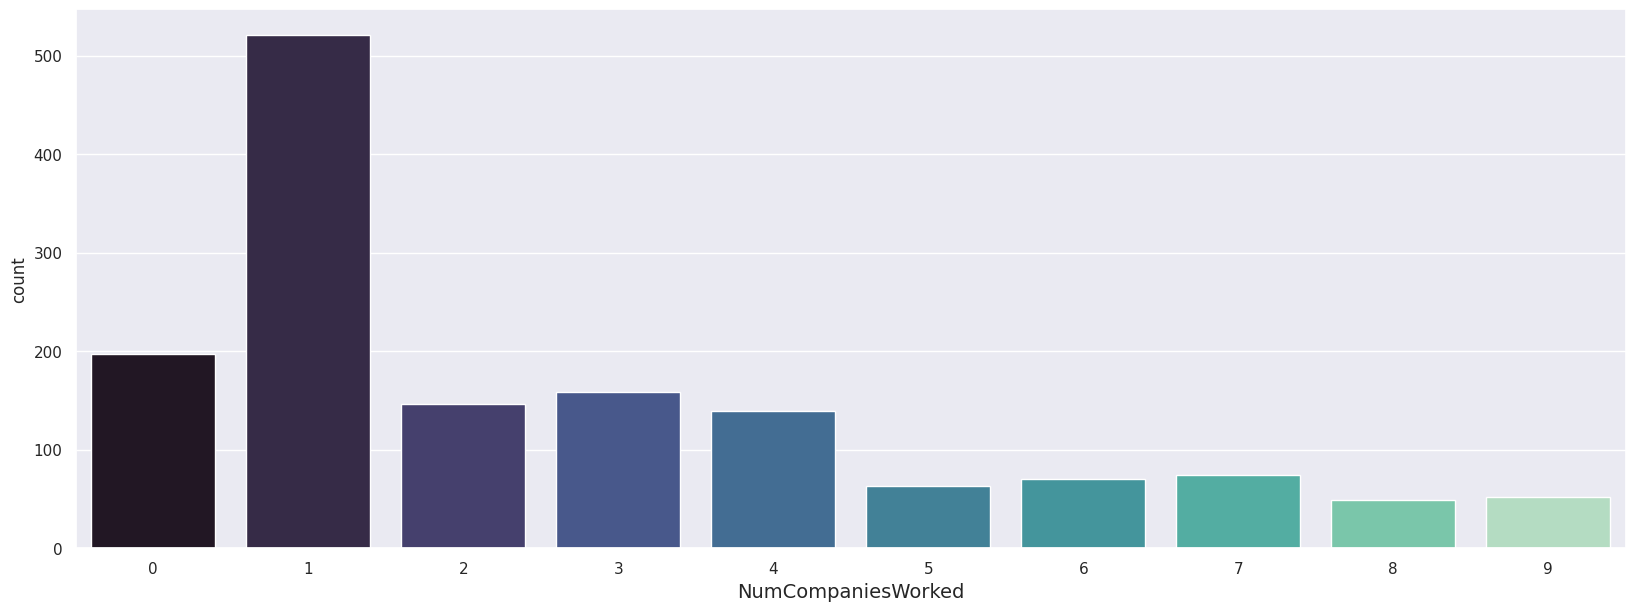

In [377]:

plt.figure(figsize=(20,7))
sns.countplot(x="NumCompaniesWorked",data=df,palette="mako")
plt.xlabel("NumCompaniesWorked", fontsize=14)
plt.show()

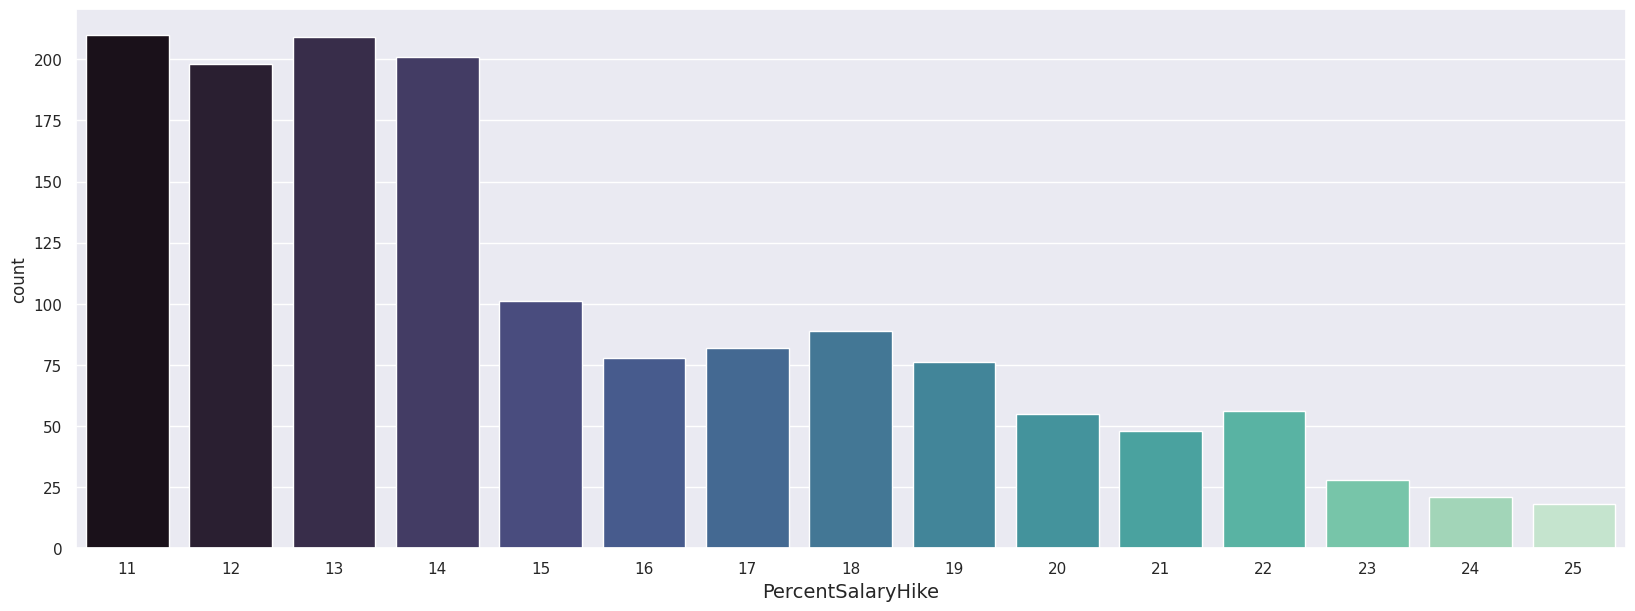

In [378]:
plt.figure(figsize=(20,7))
sns.countplot(x="PercentSalaryHike",data=df,palette="mako")
plt.xlabel("PercentSalaryHike", fontsize=14)
plt.show()

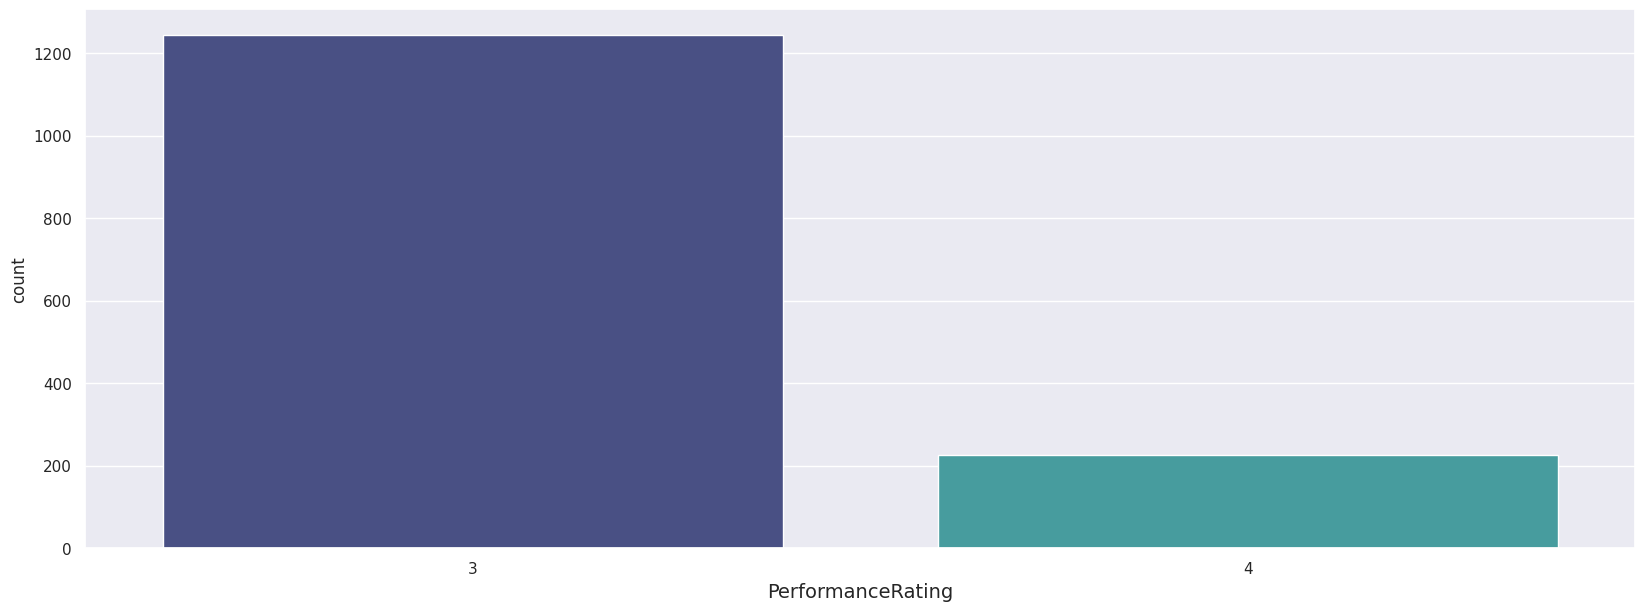

In [379]:

plt.figure(figsize=(20,7))
sns.countplot(x="PerformanceRating",data=df,palette="mako")
plt.xlabel("PerformanceRating", fontsize=14)
plt.show()

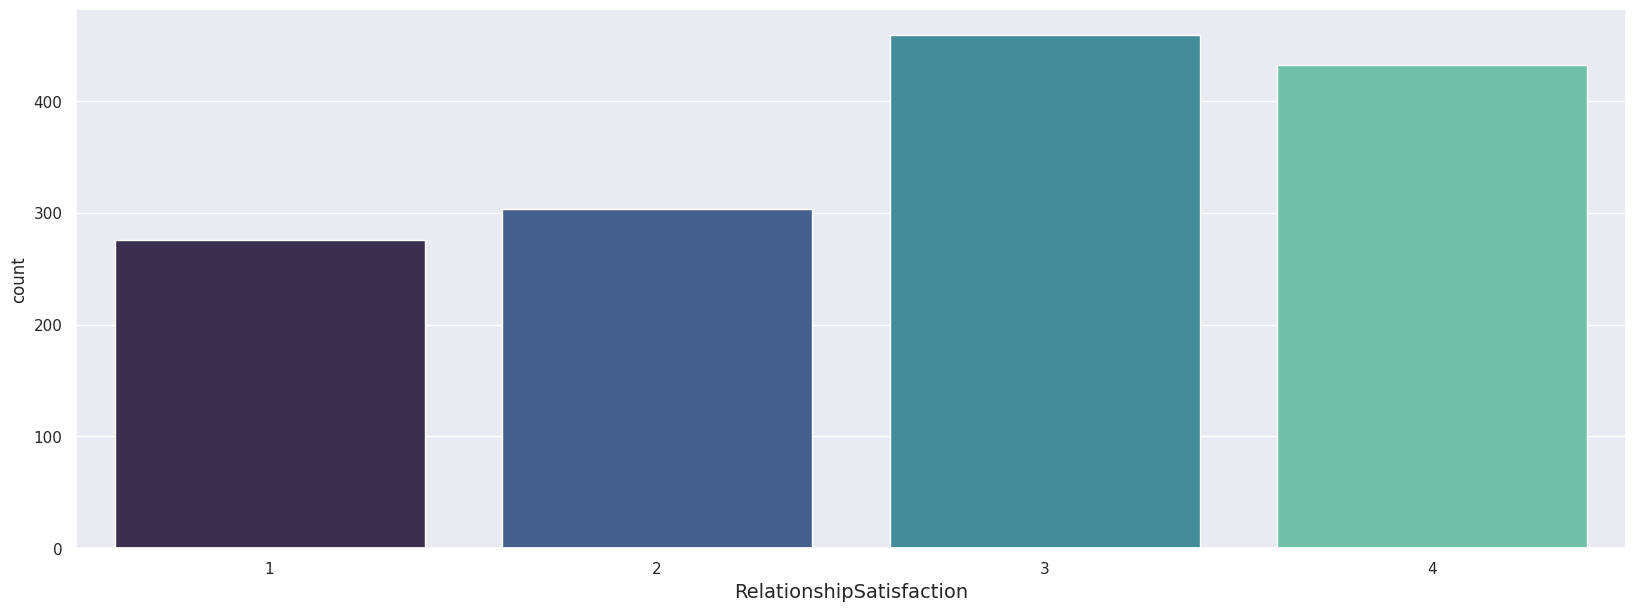

In [380]:
plt.figure(figsize=(20,7))
sns.countplot(x="RelationshipSatisfaction",data=df,palette="mako")
plt.xlabel("RelationshipSatisfaction", fontsize=14)
plt.show()

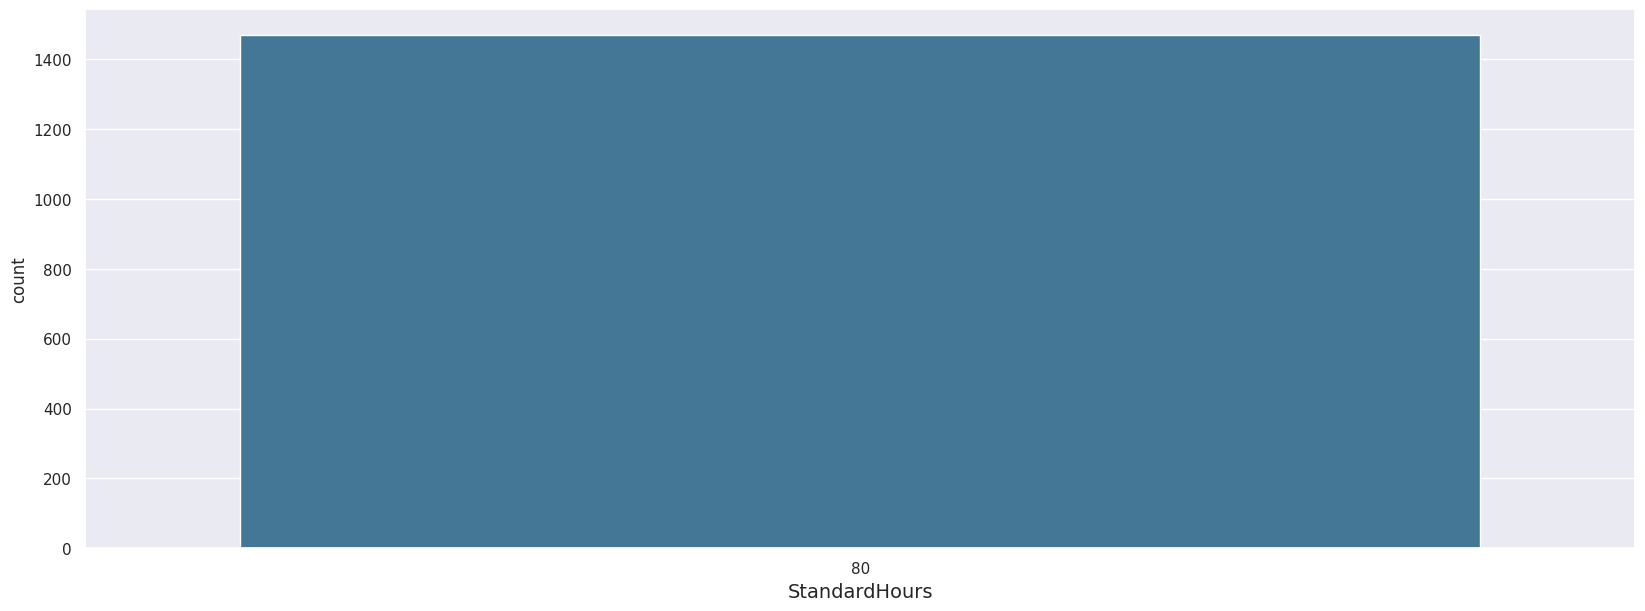

In [381]:
plt.figure(figsize=(20,7))
sns.countplot(x="StandardHours",data=df,palette="mako")
plt.xlabel("StandardHours", fontsize=14)
plt.show()

In [382]:
df["StandardHours"].value_counts()

80    1470
Name: StandardHours, dtype: int64

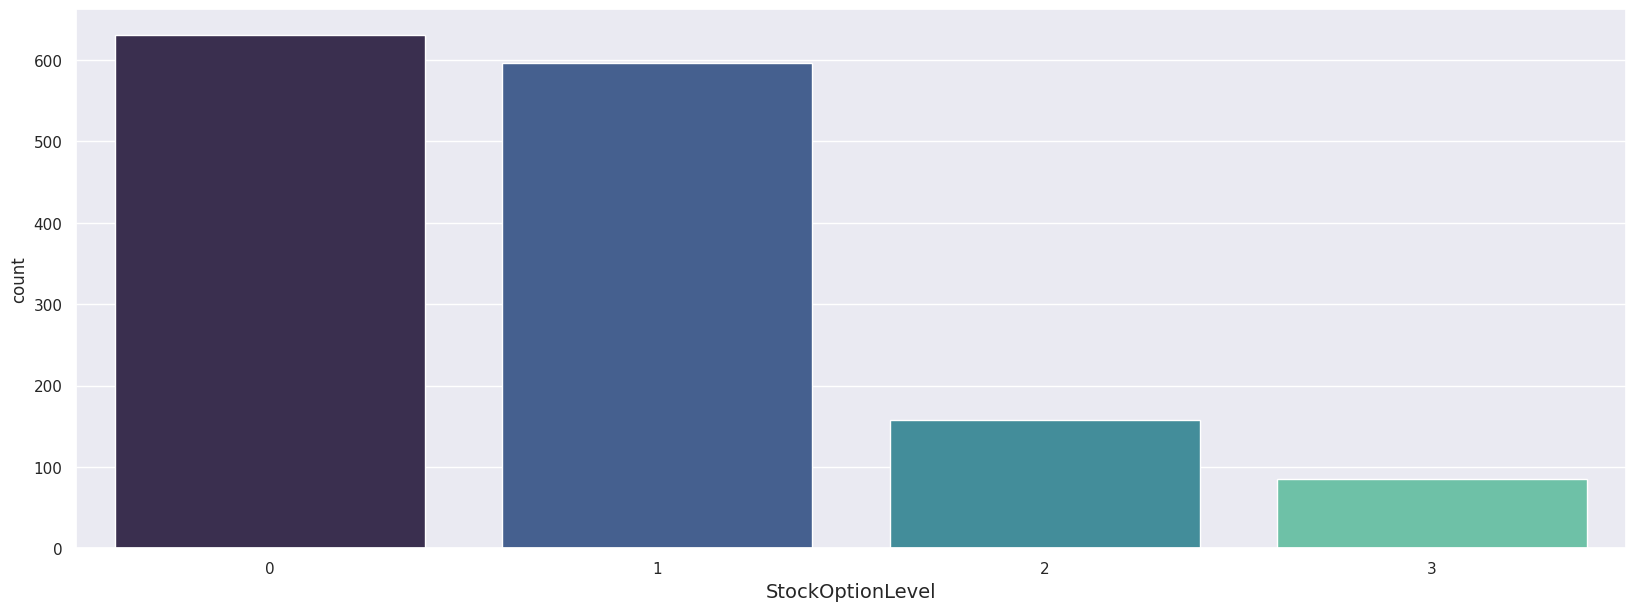

In [383]:
plt.figure(figsize=(20,7))
sns.countplot(x="StockOptionLevel",data=df,palette="mako")
plt.xlabel("StockOptionLevel", fontsize=14)
plt.show()

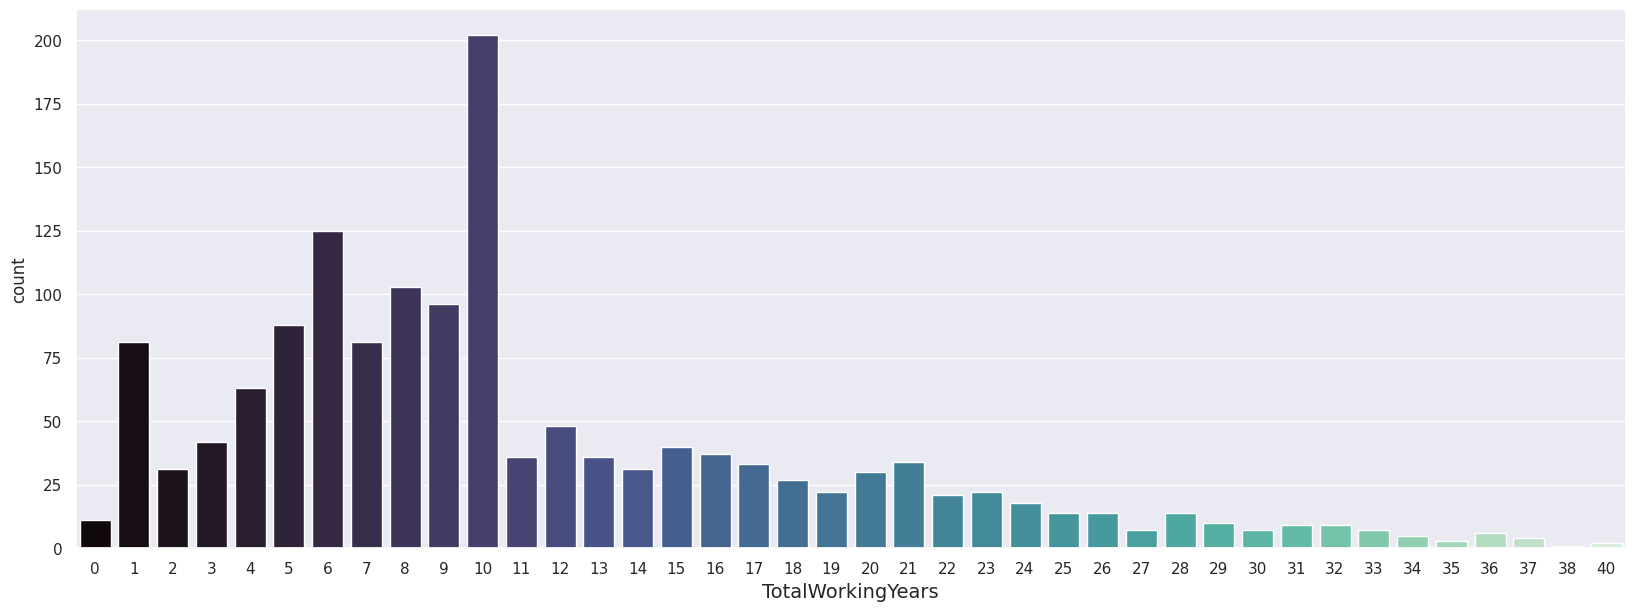

In [384]:
plt.figure(figsize=(20,7))
sns.countplot(x="TotalWorkingYears",data=df,palette="mako")
plt.xlabel("TotalWorkingYears", fontsize=14)
plt.show()

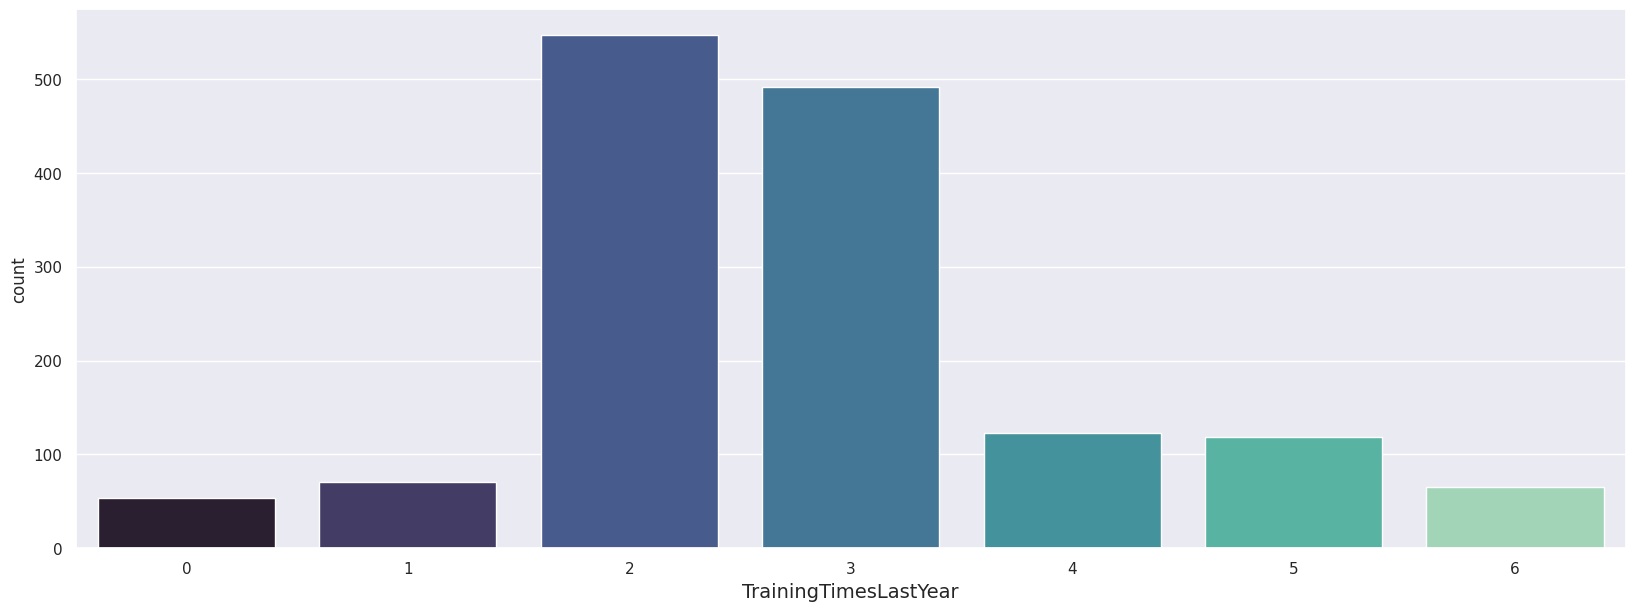

In [385]:
plt.figure(figsize=(20,7))
sns.countplot(x="TrainingTimesLastYear",data=df,palette="mako")
plt.xlabel("TrainingTimesLastYear", fontsize=14)
plt.show()

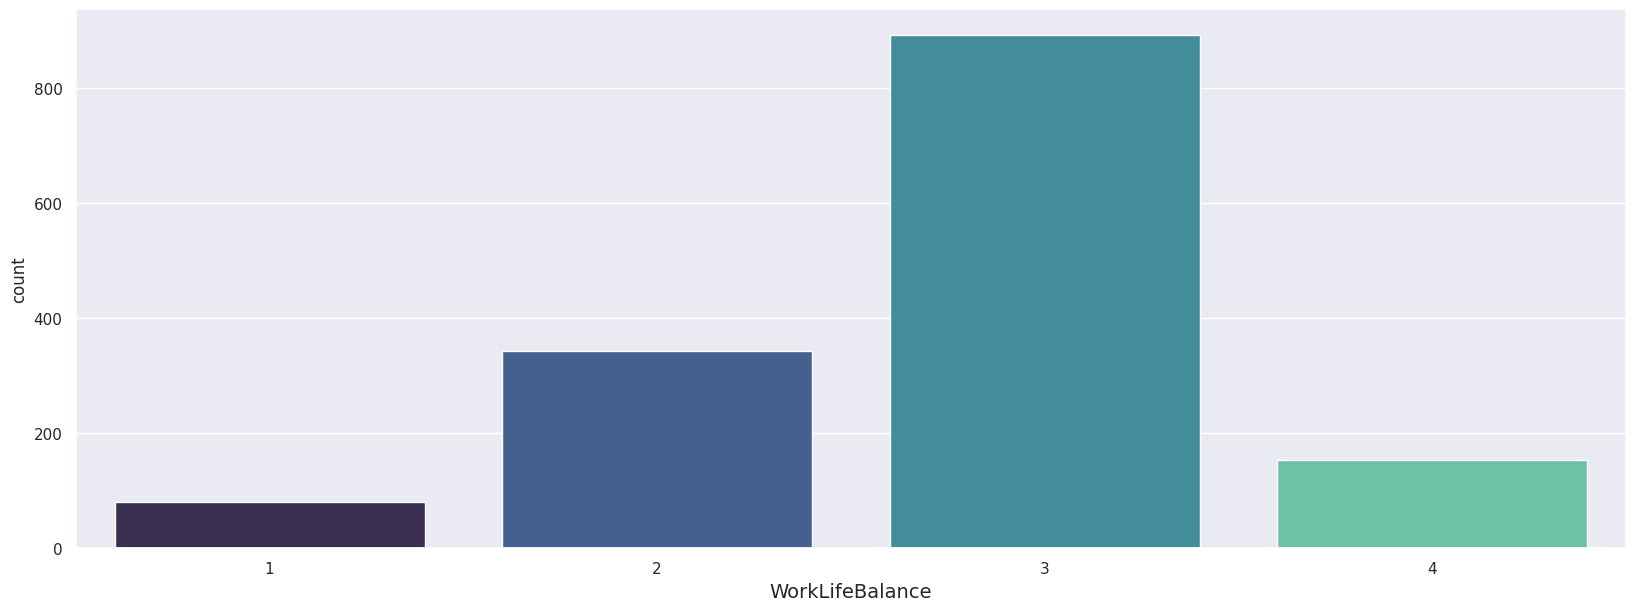

In [386]:
plt.figure(figsize=(20,7))
sns.countplot(x="WorkLifeBalance",data=df,palette="mako")
plt.xlabel("WorkLifeBalance", fontsize=14)
plt.show()

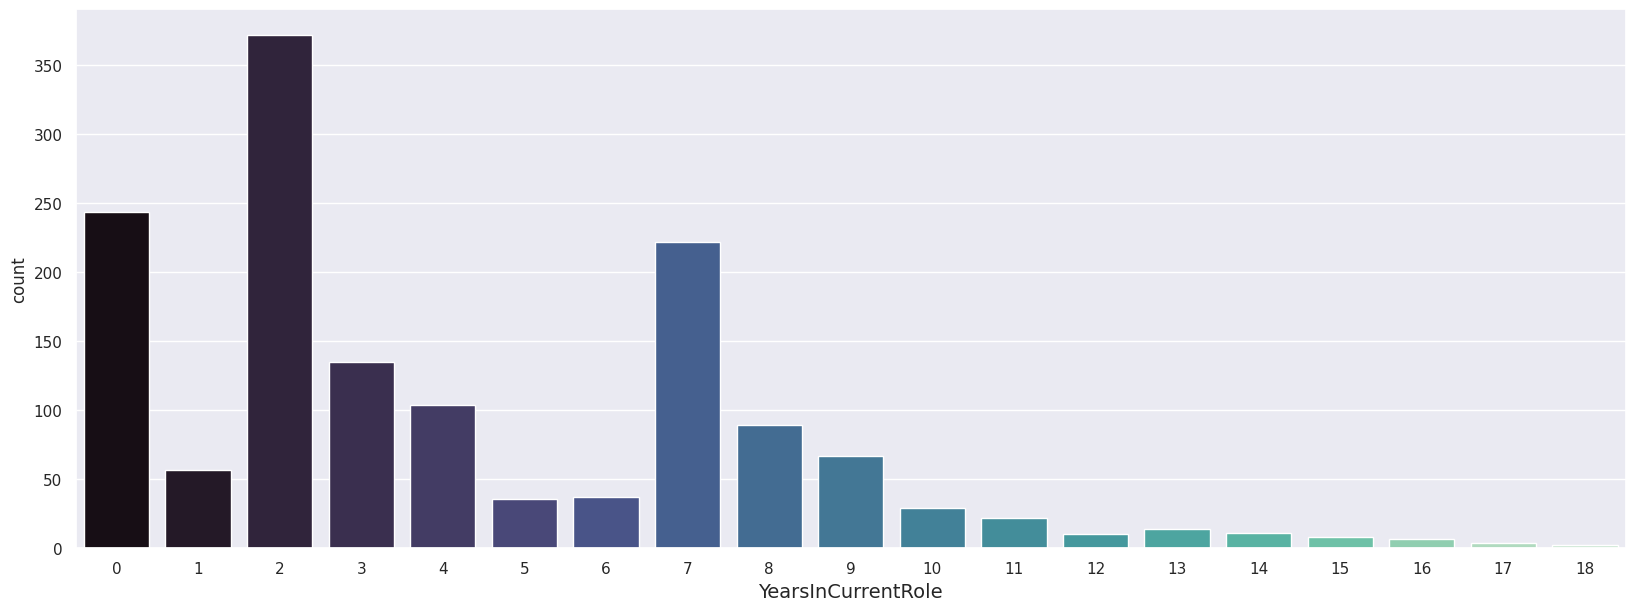

In [387]:
plt.figure(figsize=(20,7))
sns.countplot(x="YearsInCurrentRole",data=df,palette="mako")
plt.xlabel("YearsInCurrentRole", fontsize=14)
plt.show()

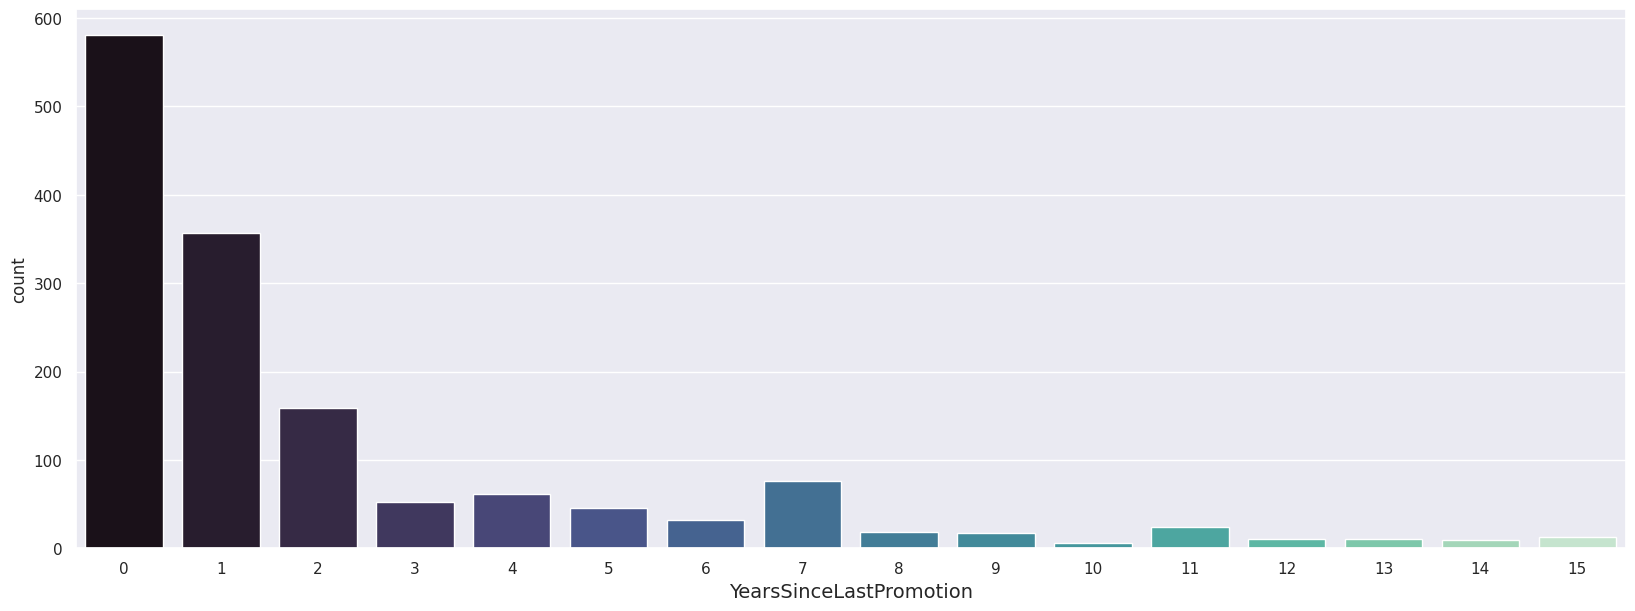

In [388]:
plt.figure(figsize=(20,7))
sns.countplot(x="YearsSinceLastPromotion",data=df,palette="mako")
plt.xlabel("YearsSinceLastPromotion", fontsize=14)
plt.show()

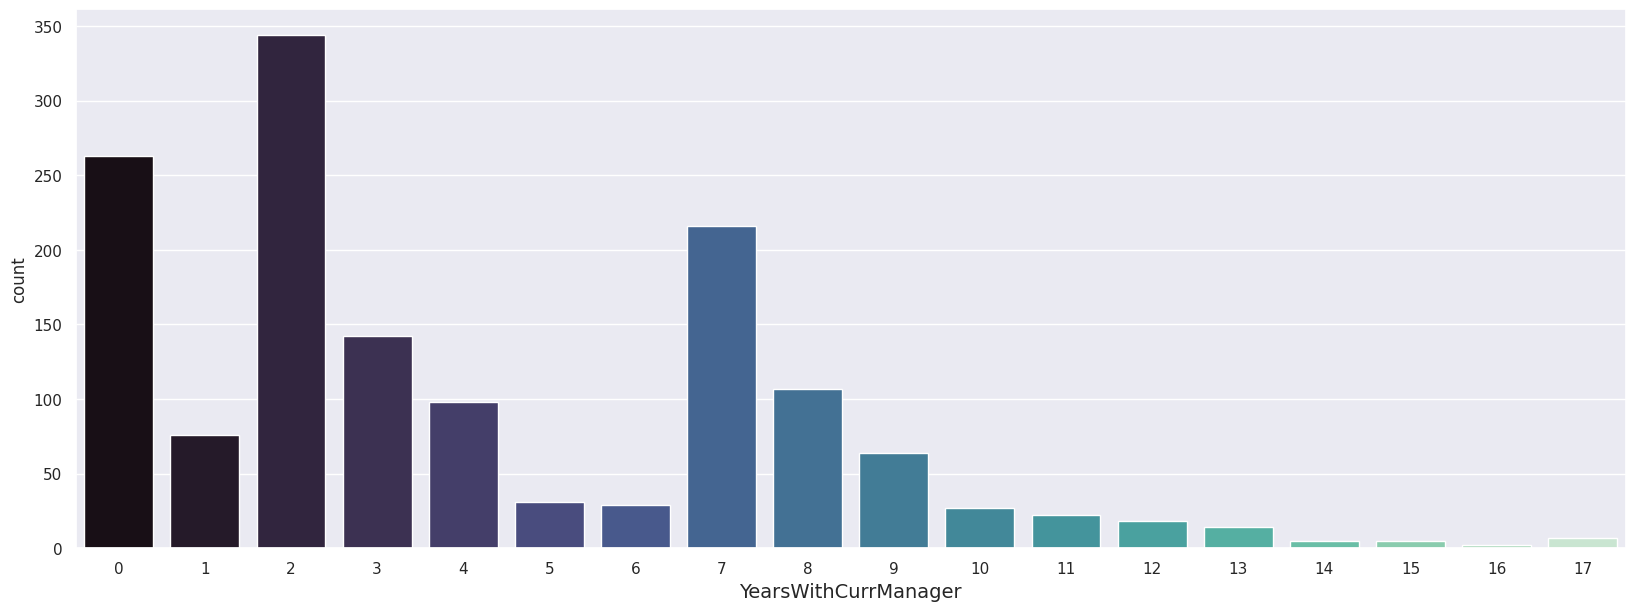

In [389]:
plt.figure(figsize=(20,7))
sns.countplot(x="YearsWithCurrManager",data=df,palette="mako")
plt.xlabel("YearsWithCurrManager", fontsize=14)
plt.show()

#### **Numerical Columns**

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<ipython-input-391-511f0157ff88>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], kde=True, color="orange", bins=10)


<Axes: xlabel='Age', ylabel='Density'>

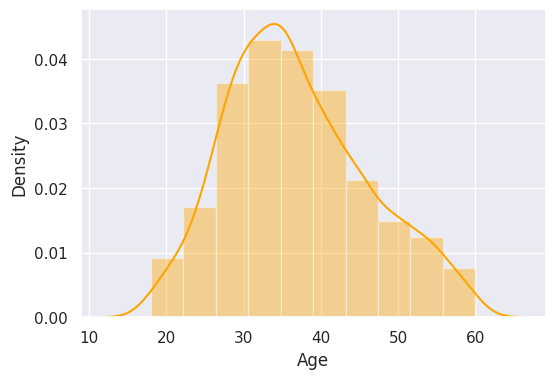

In [391]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Age"], kde=True, color="orange", bins=10)

<ipython-input-392-af0b7102f343>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["DailyRate"], kde=True, color="orange", bins=10)


<Axes: xlabel='DailyRate', ylabel='Density'>

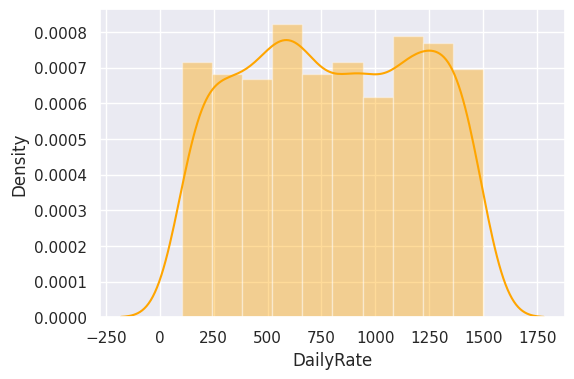

In [392]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["DailyRate"], kde=True, color="orange", bins=10)

<ipython-input-393-95ae110e16c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["DistanceFromHome"], kde=True, color="orange", bins=10)


<Axes: xlabel='DistanceFromHome', ylabel='Density'>

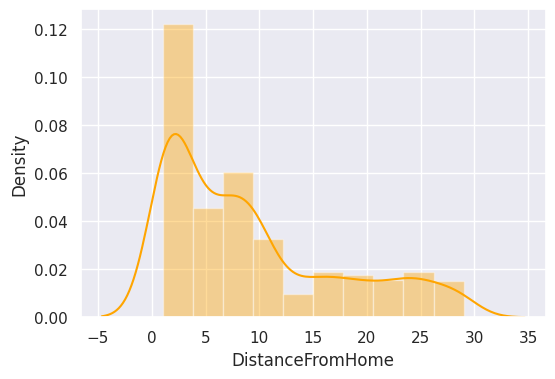

In [393]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["DistanceFromHome"], kde=True, color="orange", bins=10)

In [394]:
df["DistanceFromHome"].value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

<ipython-input-395-740e49886658>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["EmployeeCount"], kde=True, color="orange", bins=10)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='EmployeeCount', ylabel='Density'>

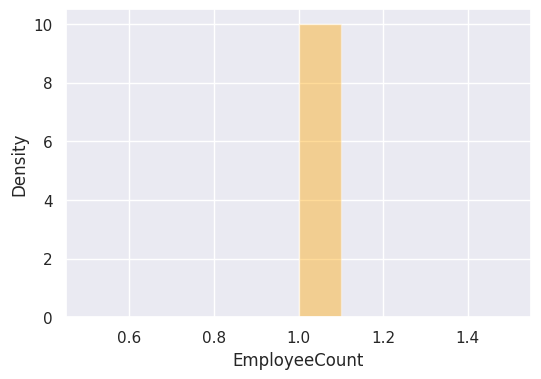

In [395]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["EmployeeCount"], kde=True, color="orange", bins=10)

In [396]:
df["EmployeeCount"].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

<ipython-input-397-bc1a11462786>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["EmployeeNumber"], kde=True, color="orange", bins=10)


<Axes: xlabel='EmployeeNumber', ylabel='Density'>

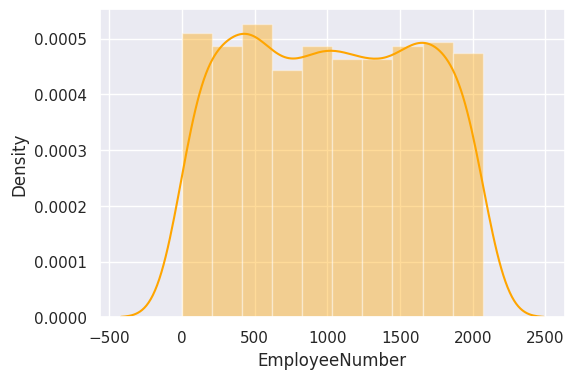

In [397]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["EmployeeNumber"], kde=True, color="orange", bins=10)

<ipython-input-398-0ce7043de696>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["HourlyRate"], kde=True, color="orange", bins=10)


<Axes: xlabel='HourlyRate', ylabel='Density'>

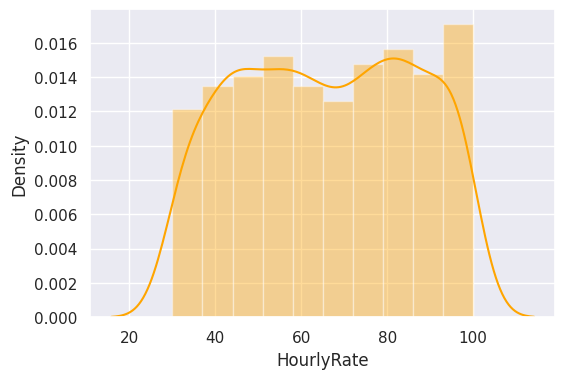

In [398]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["HourlyRate"], kde=True, color="orange", bins=10)

<ipython-input-399-f6abc1e7915f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["MonthlyIncome"], kde=True, color="orange", bins=10)


<Axes: xlabel='MonthlyIncome', ylabel='Density'>

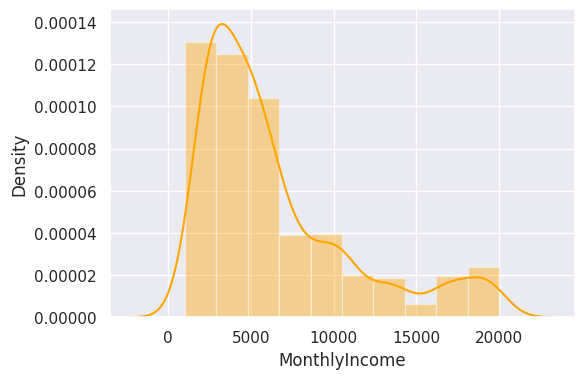

In [399]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["MonthlyIncome"], kde=True, color="orange", bins=10)

<ipython-input-400-2c25cb735ae0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["MonthlyRate"], kde=True, color="orange", bins=10)


<Axes: xlabel='MonthlyRate', ylabel='Density'>

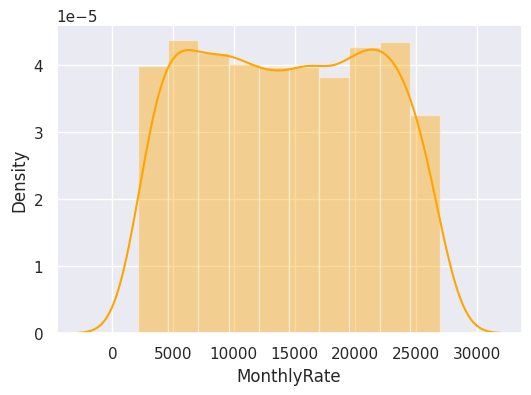

In [400]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["MonthlyRate"], kde=True, color="orange", bins=10)

<ipython-input-401-d4b3e975482e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["NumCompaniesWorked"], kde=True, color="orange", bins=10)


<Axes: xlabel='NumCompaniesWorked', ylabel='Density'>

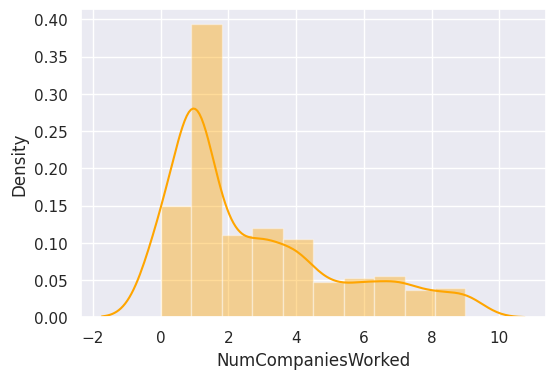

In [401]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["NumCompaniesWorked"], kde=True, color="orange", bins=10)

<ipython-input-402-c34736e2106b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["PercentSalaryHike"], kde=True, color="orange", bins=10)


<Axes: xlabel='PercentSalaryHike', ylabel='Density'>

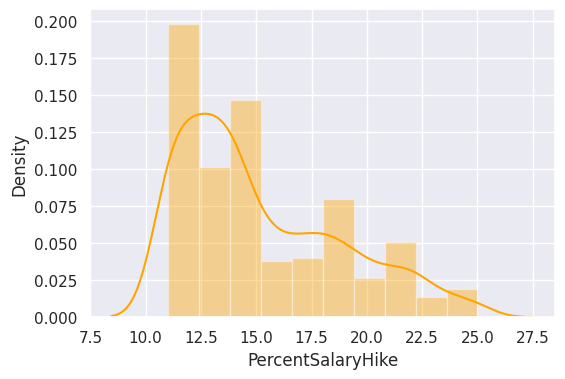

In [402]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["PercentSalaryHike"], kde=True, color="orange", bins=10)

<ipython-input-403-0c8395d54ab2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["YearsAtCompany"], kde=True, color="orange", bins=10)


<Axes: xlabel='YearsAtCompany', ylabel='Density'>

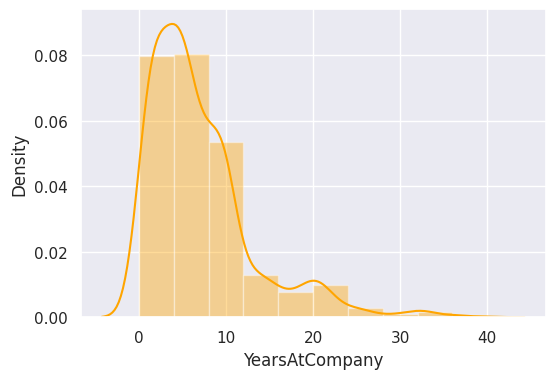

In [403]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["YearsAtCompany"], kde=True, color="orange", bins=10)

<ipython-input-404-779e2ea27da8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["YearsWithCurrManager"], kde=True, color="orange", bins=10)


<Axes: xlabel='YearsWithCurrManager', ylabel='Density'>

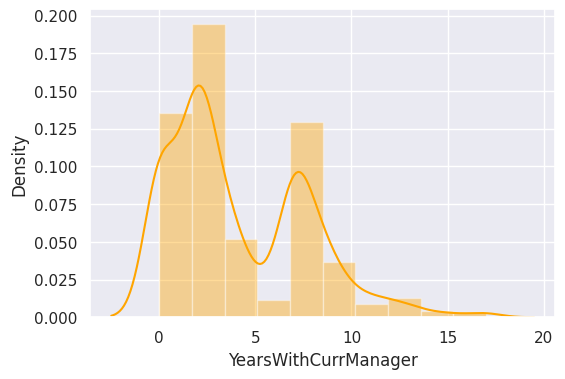

In [404]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["YearsWithCurrManager"], kde=True, color="orange", bins=10)

# **EDA (Exploratory Data Analysis)**

#### **Remove Columns**

In [405]:
df.drop(["EmployeeCount","Over18","StandardHours"],axis=1,inplace=True)

In [406]:
df.shape

(1470, 32)

#### **Remove Duplicate**

In [407]:
df.duplicated().sum()

0

#### **Remove NaN Values**

In [408]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#### **Remove Outliers**

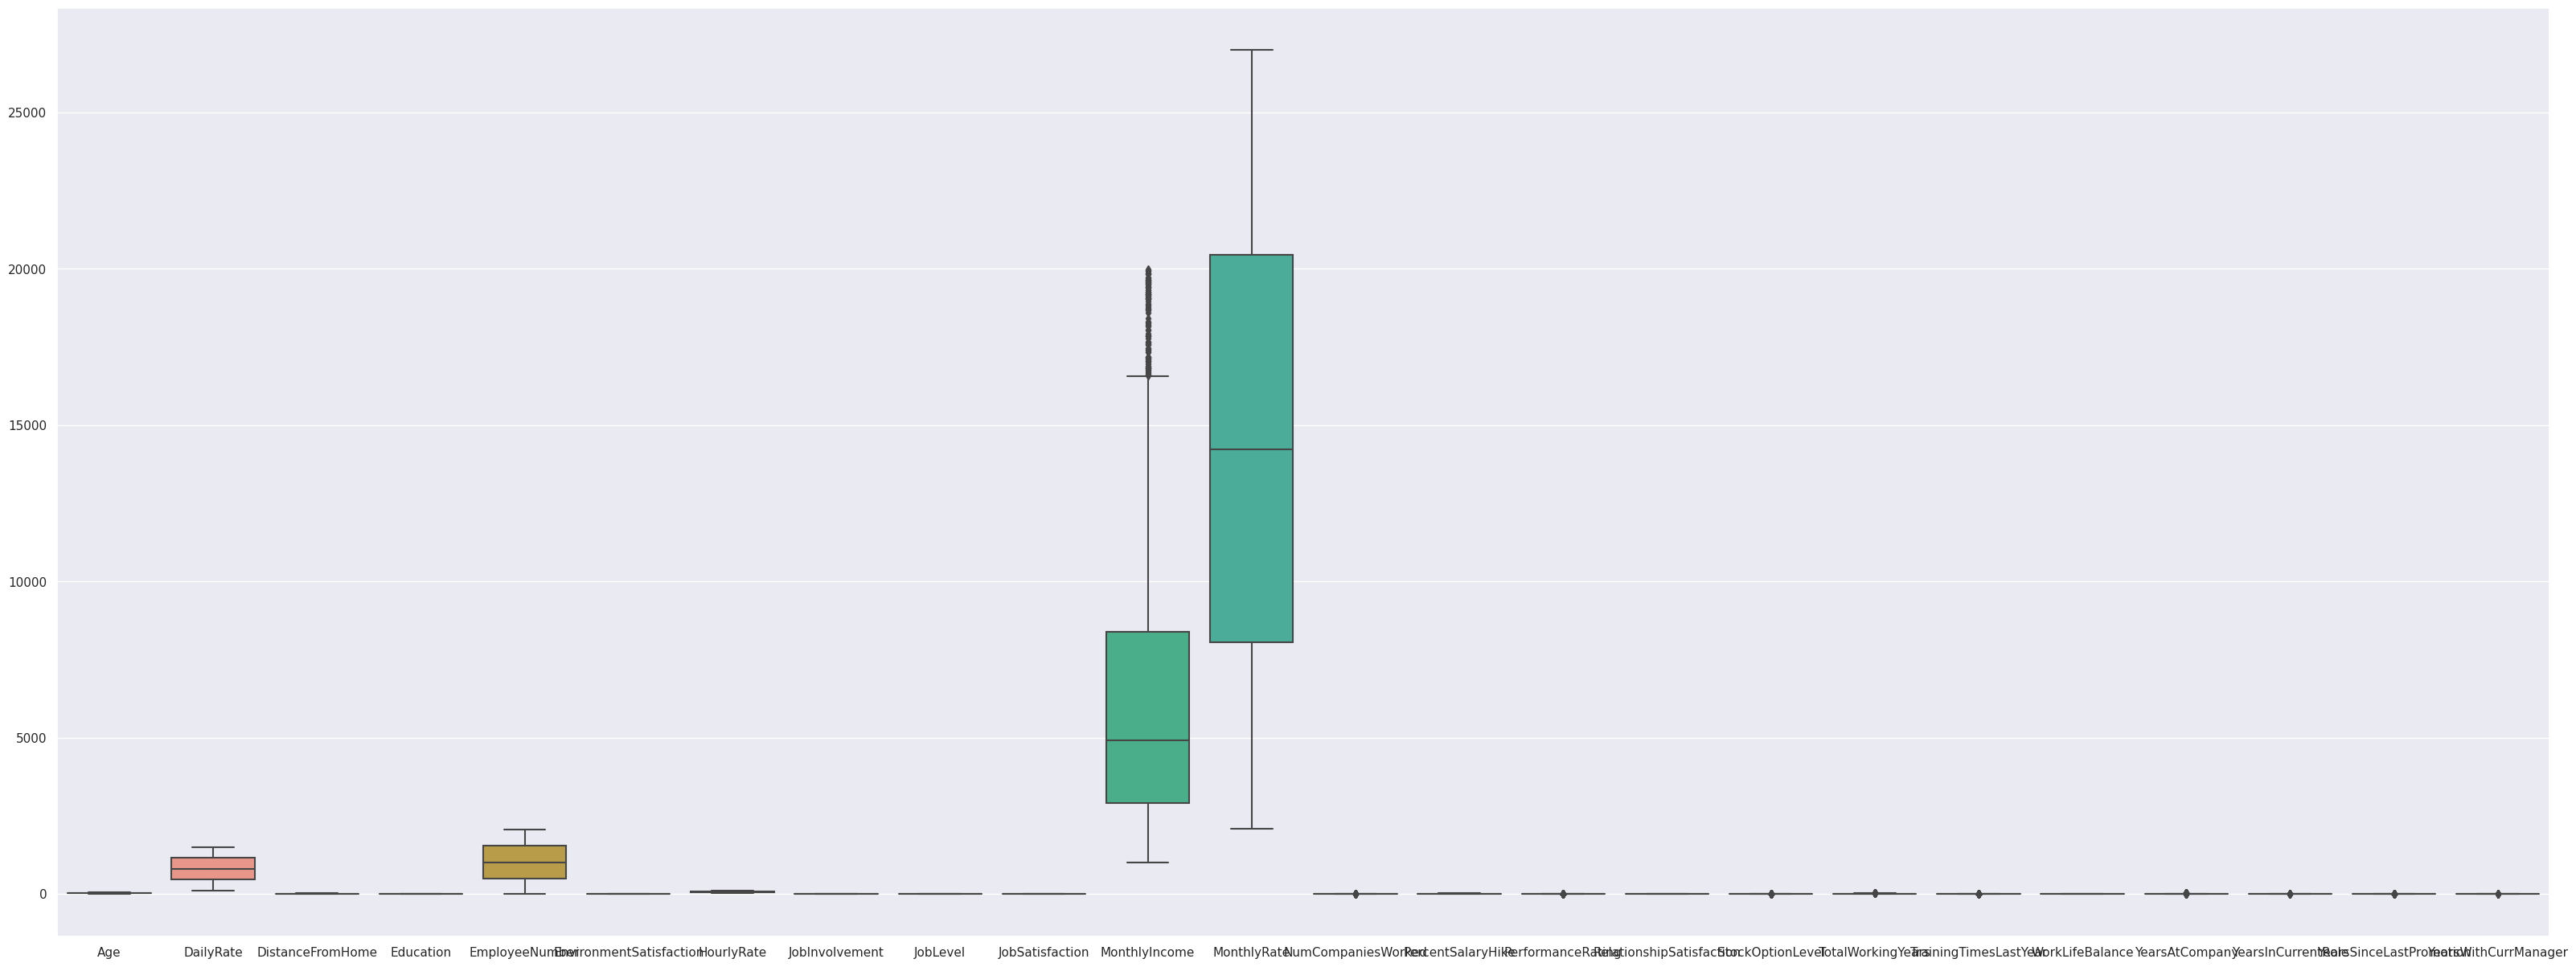

In [409]:
#Check Outliers
num_cols =df.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(40,15))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

In [410]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [411]:
df.columns.get_loc('PerformanceRating')

22

In [412]:
num_cols = df.select_dtypes(include=["int64","float64"])
for i in num_cols.columns:
  if df.columns.get_loc(i) == 22:
    pass
  else:
    lower_range,upper_range = remove_outlier(df[i])
    df[i] = np.where(df[i] > upper_range, upper_range, df[i])
    df[i] = np.where(df[i] < lower_range, lower_range, df[i])

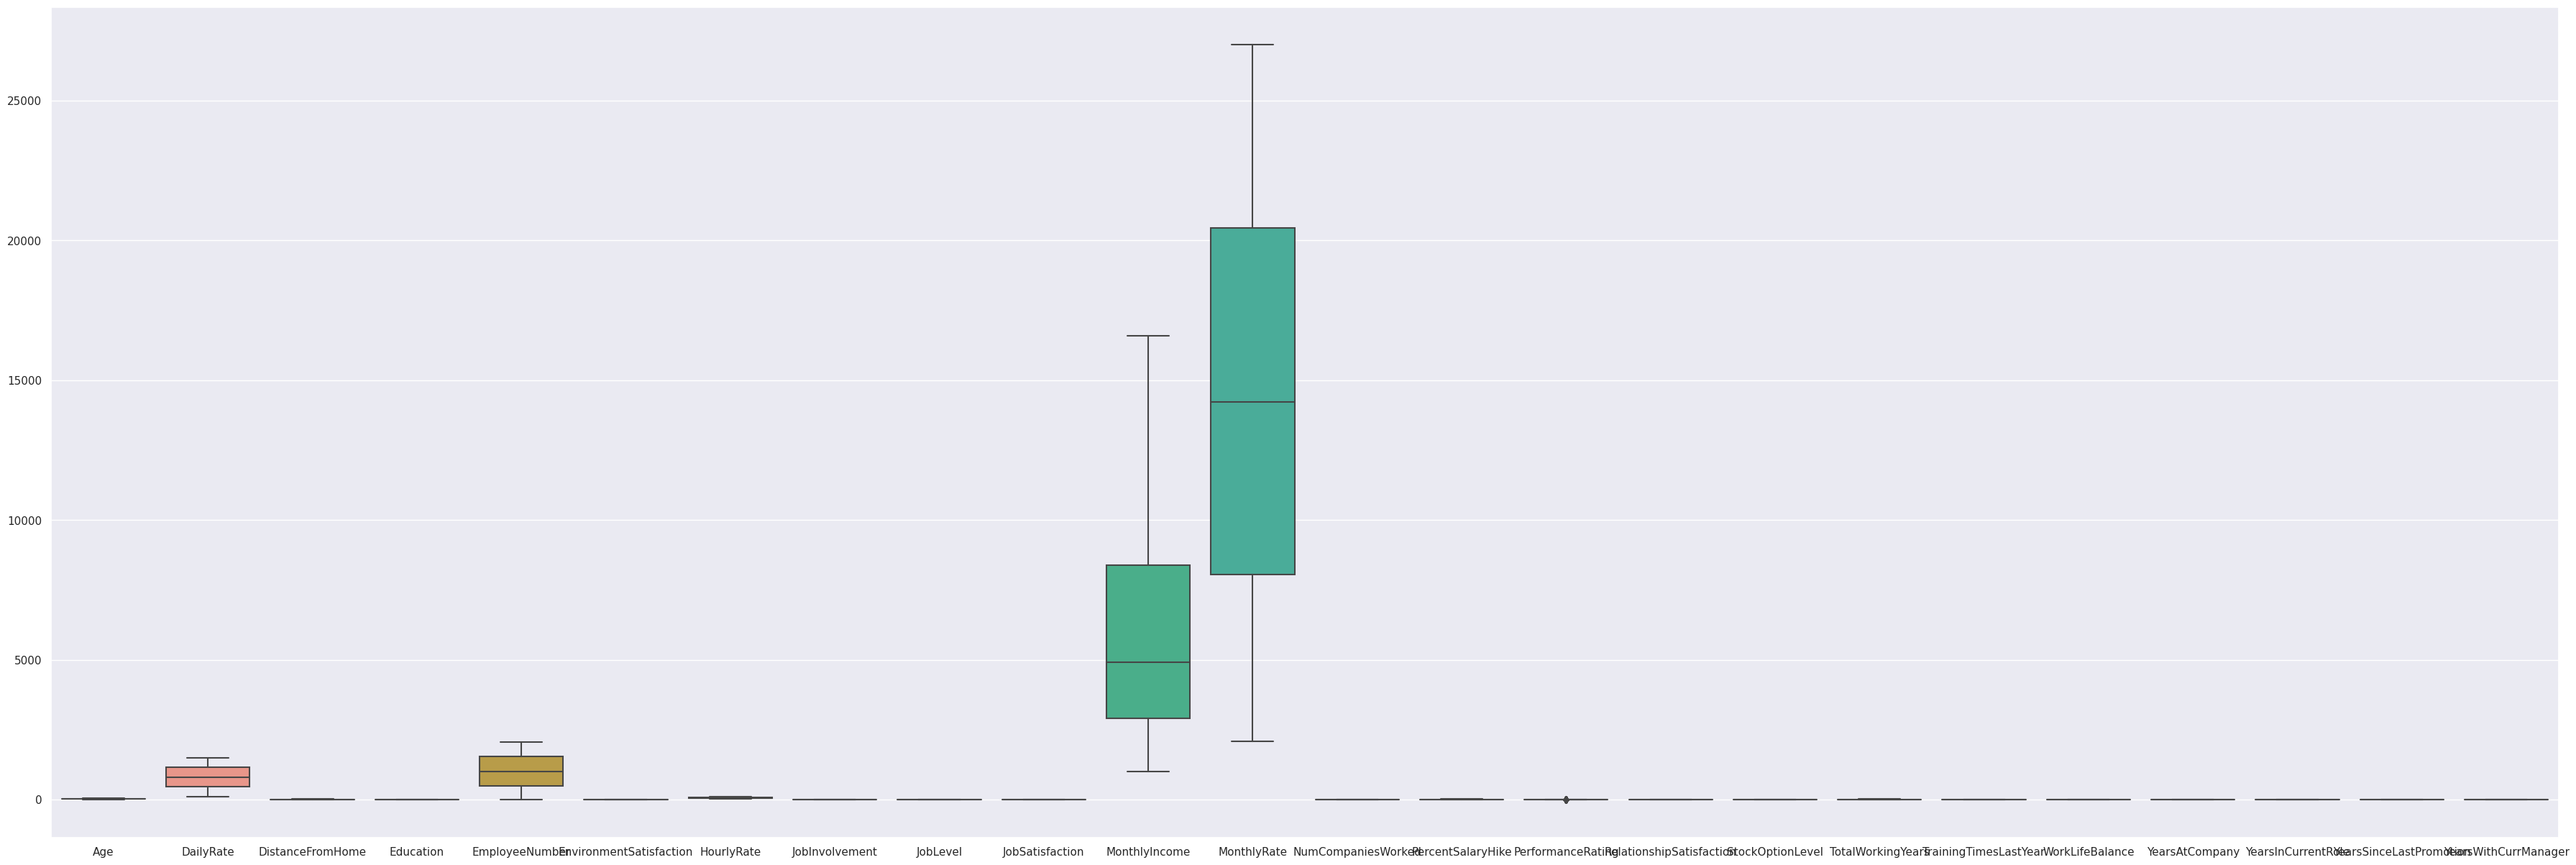

In [413]:
#Check Outliers
num_cols =df.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(45,15))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

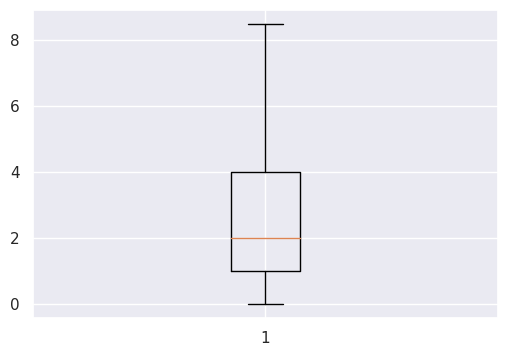

In [414]:
plt.boxplot(df["NumCompaniesWorked"])
plt.show()

In [415]:
df["EnvironmentSatisfaction"].value_counts()

3.0    453
4.0    446
2.0    287
1.0    284
Name: EnvironmentSatisfaction, dtype: int64

#### **Bivariate Analysis**

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EmployeeNumber            1470 non-null   float64
 9   EnvironmentSatisfaction   1470 non-null   float64
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   float64
 12  JobInvolvement            1470 non-null   float64
 13  JobLevel                  1470 non-null   float64
 14  JobRole 

In [417]:
df['YearsWithCurrManager'].value_counts()

2.0     344
0.0     263
7.0     216
3.0     142
8.0     107
4.0      98
1.0      76
9.0      64
5.0      31
6.0      29
10.0     27
11.0     22
12.0     18
14.5     14
13.0     14
14.0      5
Name: YearsWithCurrManager, dtype: int64

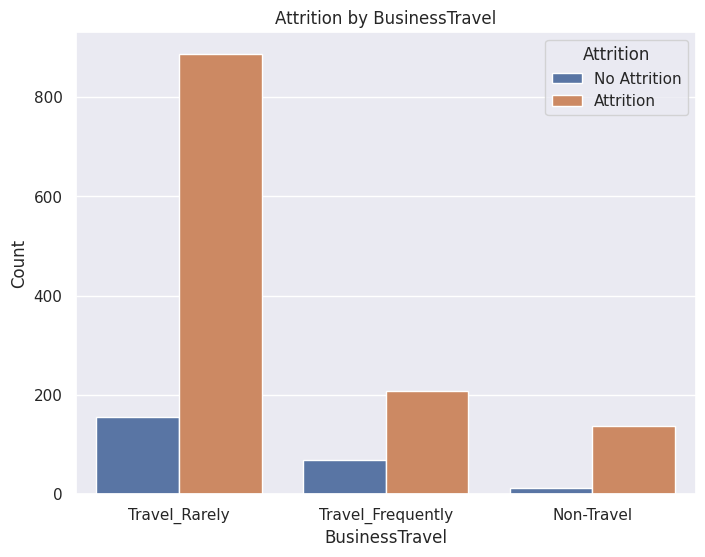

In [418]:
plt.figure(figsize=(8, 6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
plt.title('Attrition by BusinessTravel')
plt.xlabel('BusinessTravel')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

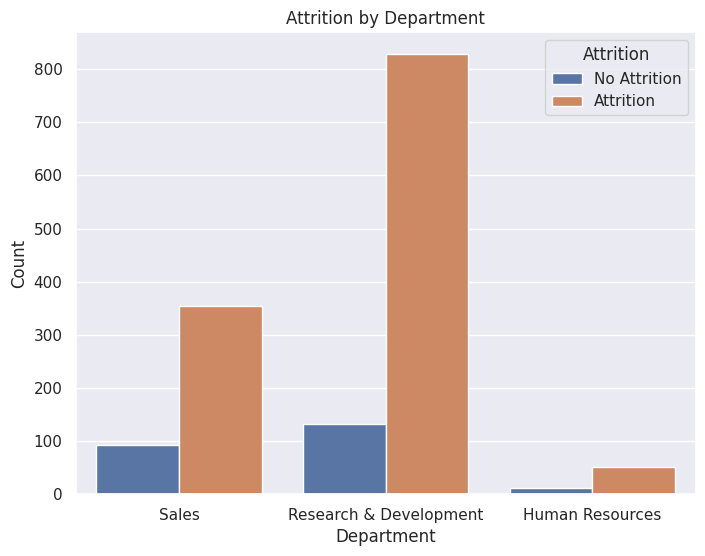

In [419]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

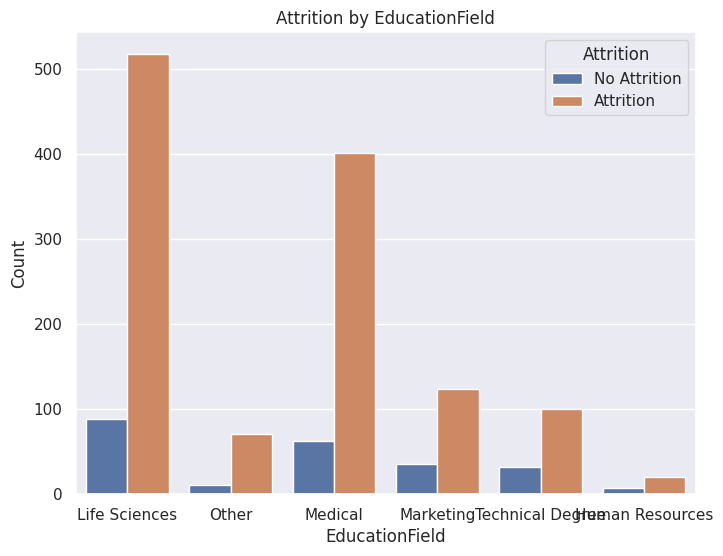

In [420]:
plt.figure(figsize=(8, 6))
sns.countplot(x='EducationField', hue='Attrition', data=df)
plt.title('Attrition by EducationField')
plt.xlabel('EducationField')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

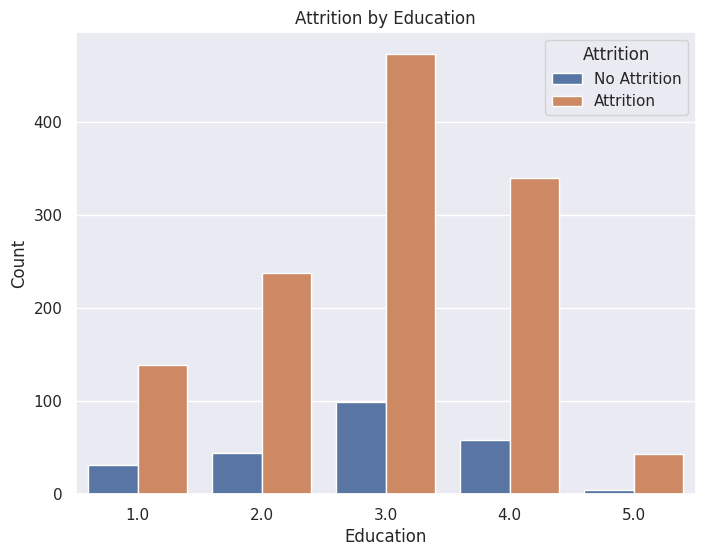

In [421]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Attrition', data=df)
plt.title('Attrition by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

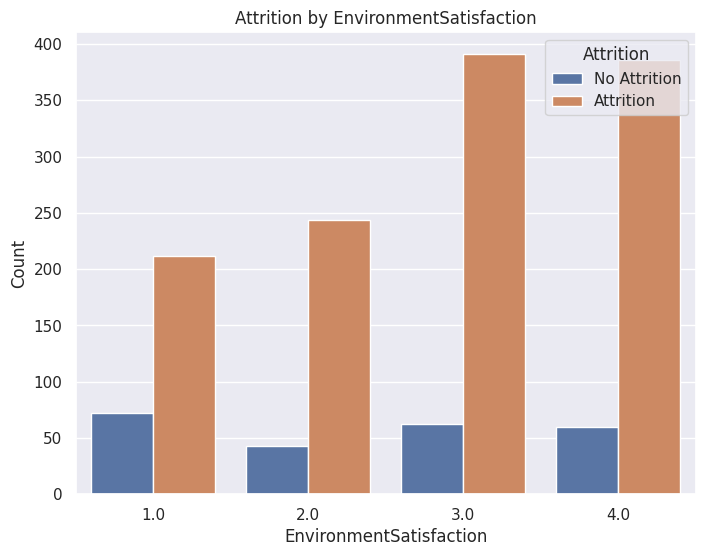

In [422]:
plt.figure(figsize=(8, 6))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df)
plt.title('Attrition by EnvironmentSatisfaction')
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

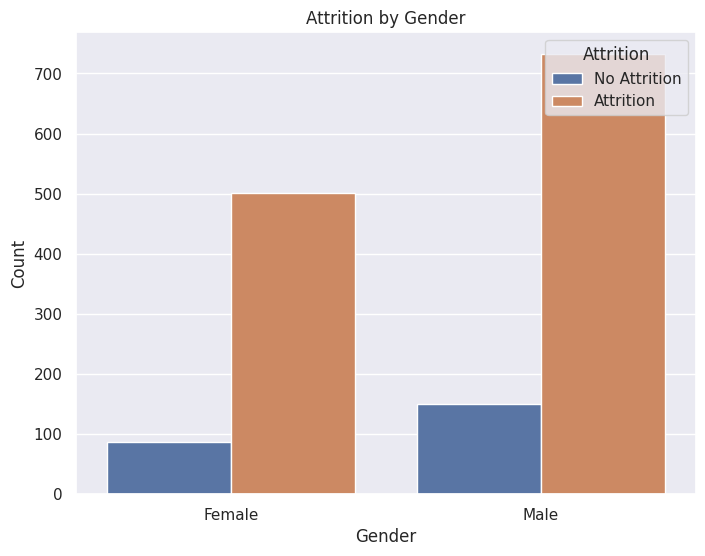

In [423]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

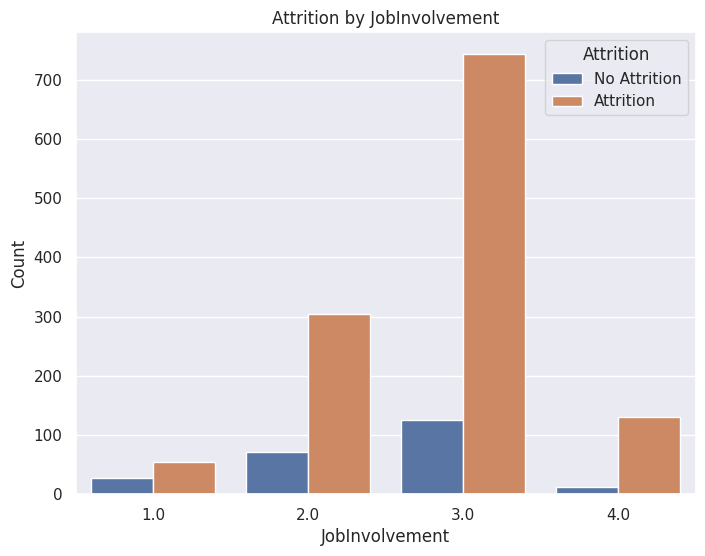

In [424]:
plt.figure(figsize=(8, 6))
sns.countplot(x='JobInvolvement', hue='Attrition', data=df)
plt.title('Attrition by JobInvolvement')
plt.xlabel('JobInvolvement')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

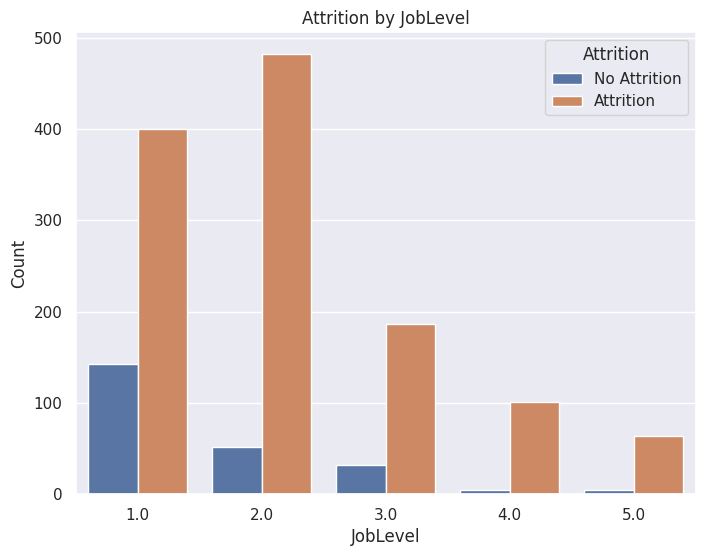

In [425]:
plt.figure(figsize=(8, 6))
sns.countplot(x='JobLevel', hue='Attrition', data=df)
plt.title('Attrition by JobLevel')
plt.xlabel('JobLevel')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

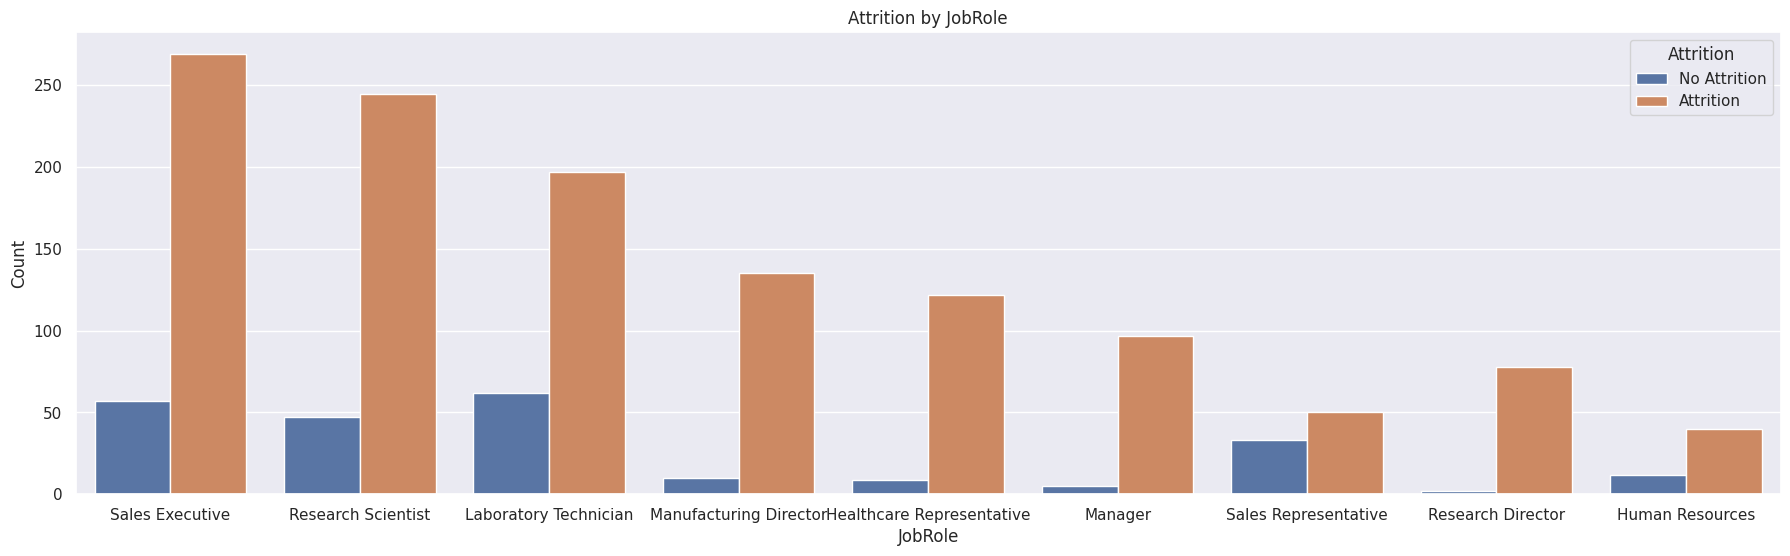

In [426]:
plt.figure(figsize=(22, 6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Attrition by JobRole')
plt.xlabel('JobRole')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

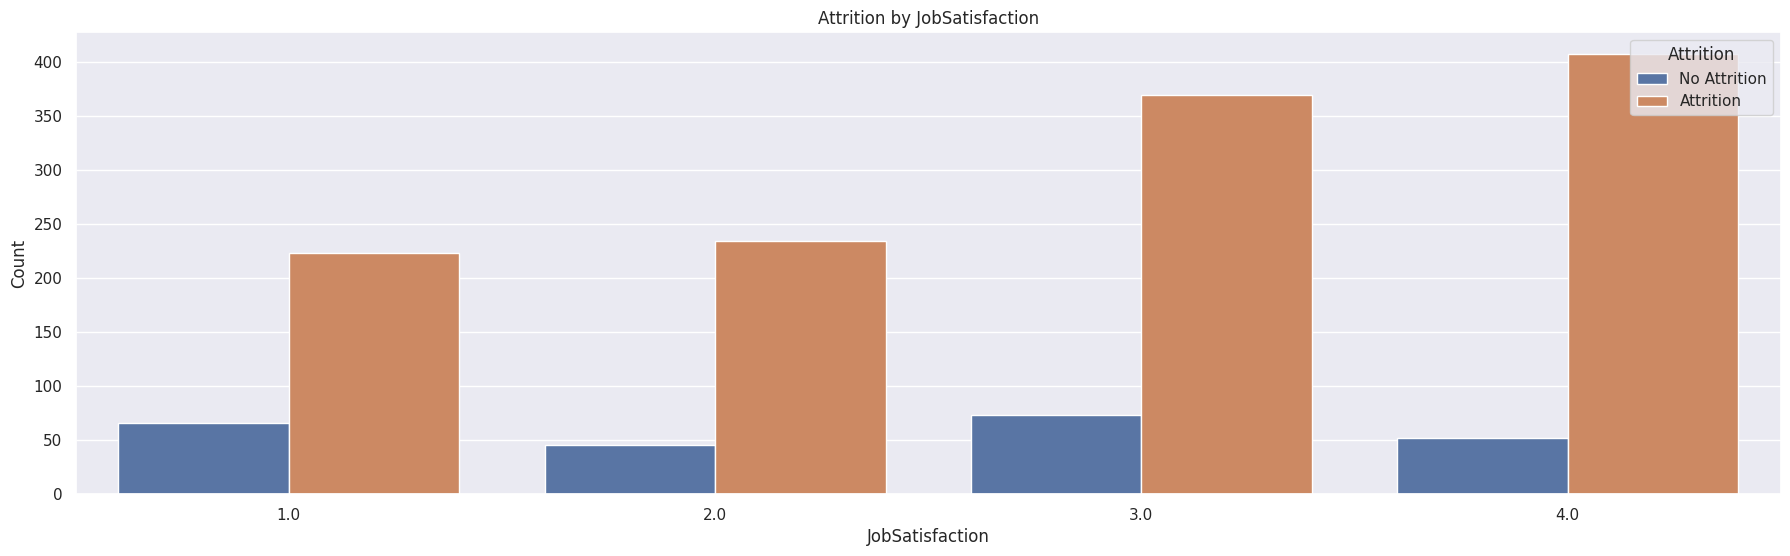

In [427]:
plt.figure(figsize=(22, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Attrition by JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

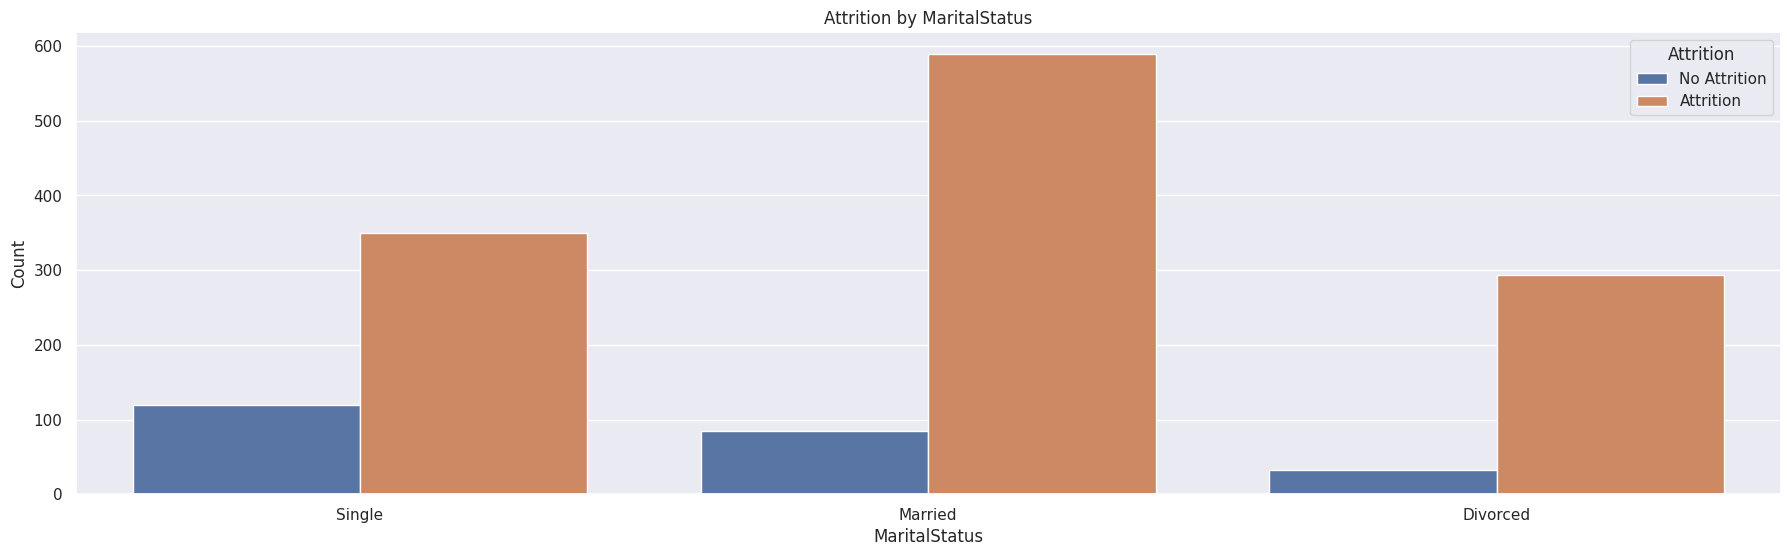

In [428]:
plt.figure(figsize=(22, 6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Attrition by MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

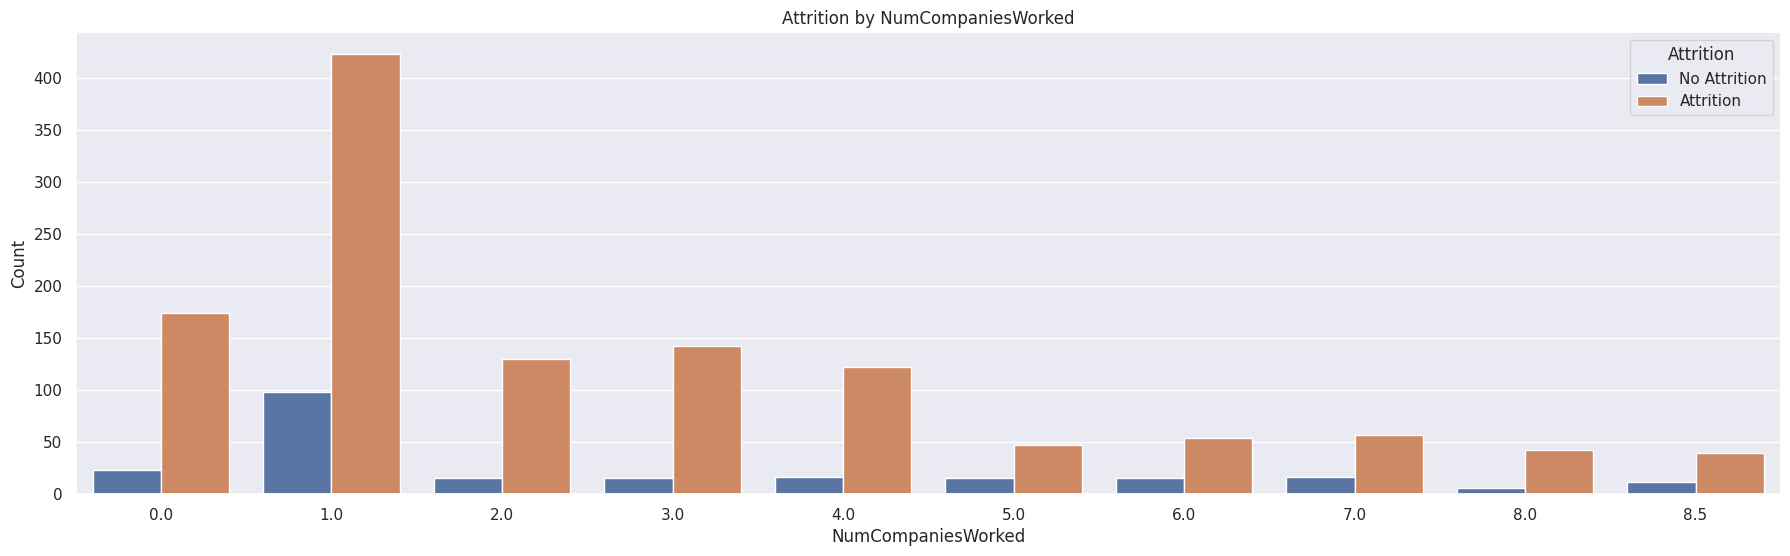

In [429]:
plt.figure(figsize=(22, 6))
sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=df)
plt.title('Attrition by NumCompaniesWorked')
plt.xlabel('NumCompaniesWorked')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

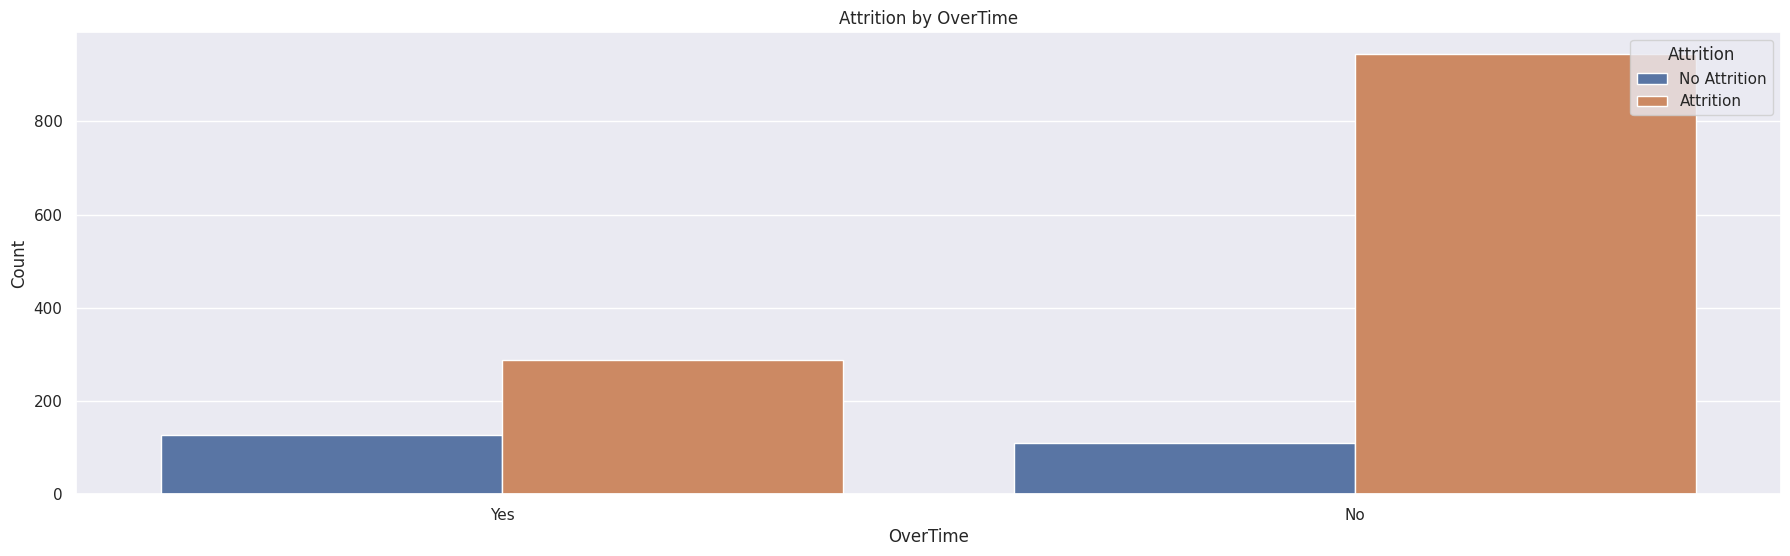

In [430]:
plt.figure(figsize=(22, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

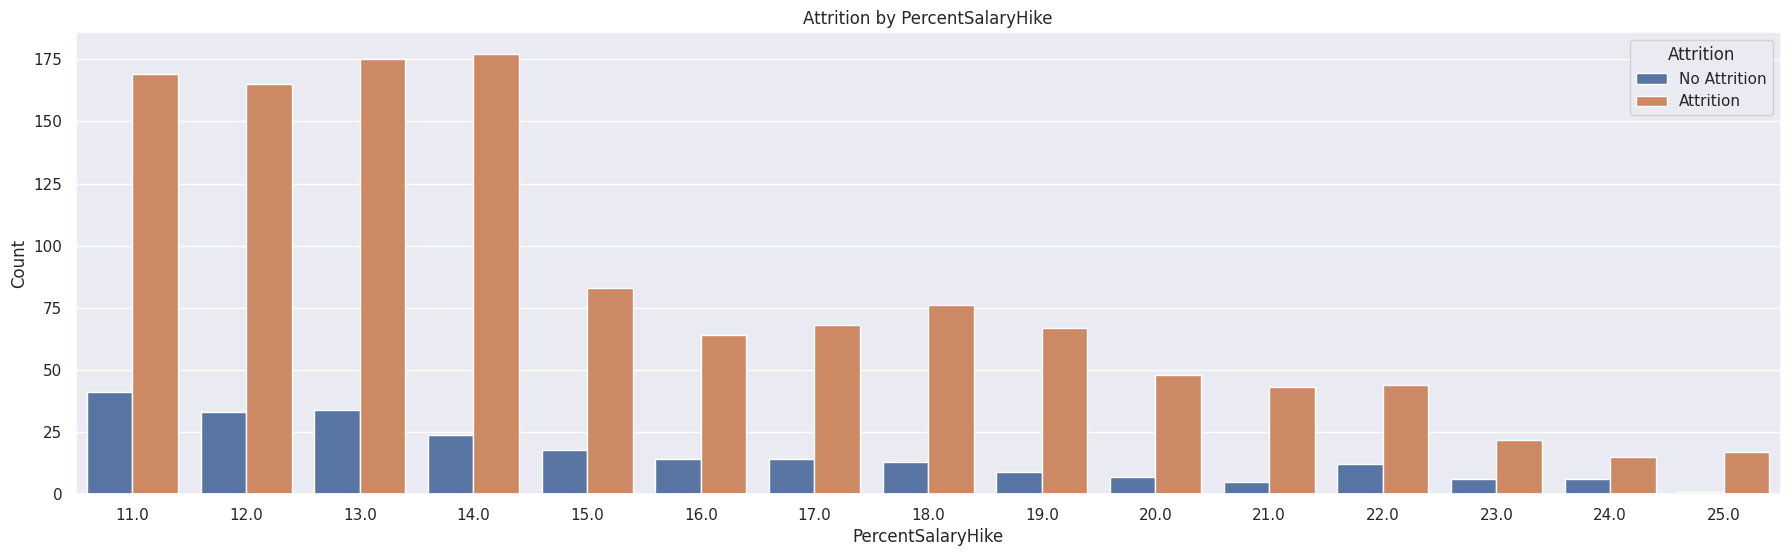

In [431]:
plt.figure(figsize=(22, 6))
sns.countplot(x='PercentSalaryHike', hue='Attrition', data=df)
plt.title('Attrition by PercentSalaryHike')
plt.xlabel('PercentSalaryHike')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

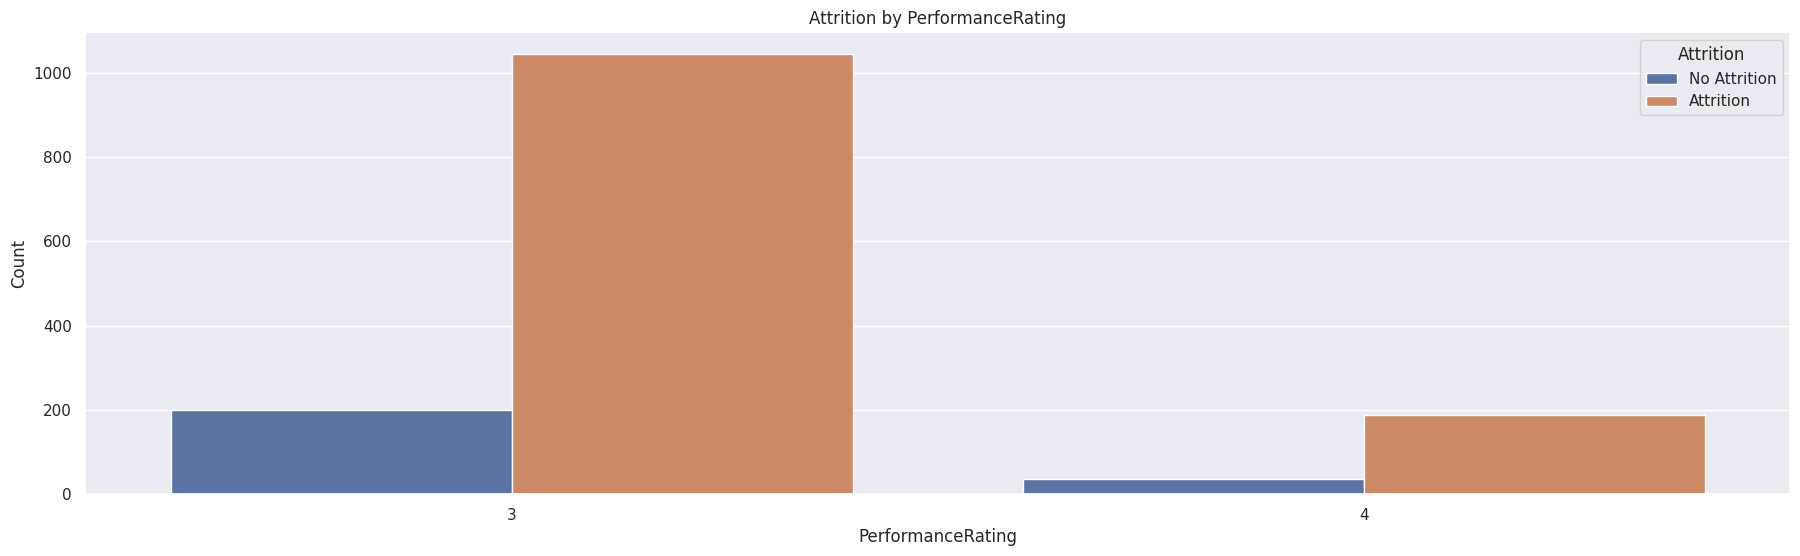

In [432]:
plt.figure(figsize=(22, 6))
sns.countplot(x='PerformanceRating', hue='Attrition', data=df)
plt.title('Attrition by PerformanceRating')
plt.xlabel('PerformanceRating')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

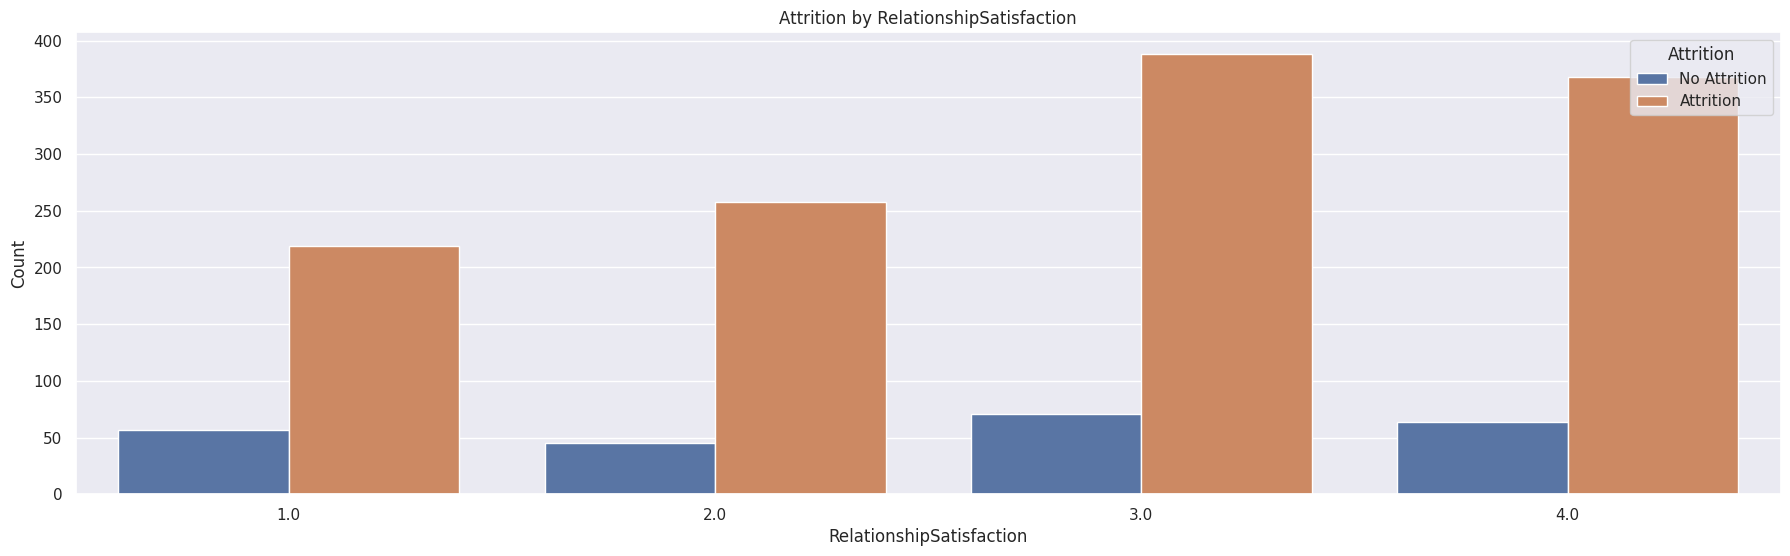

In [433]:
plt.figure(figsize=(22, 6))
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df)
plt.title('Attrition by RelationshipSatisfaction')
plt.xlabel('RelationshipSatisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

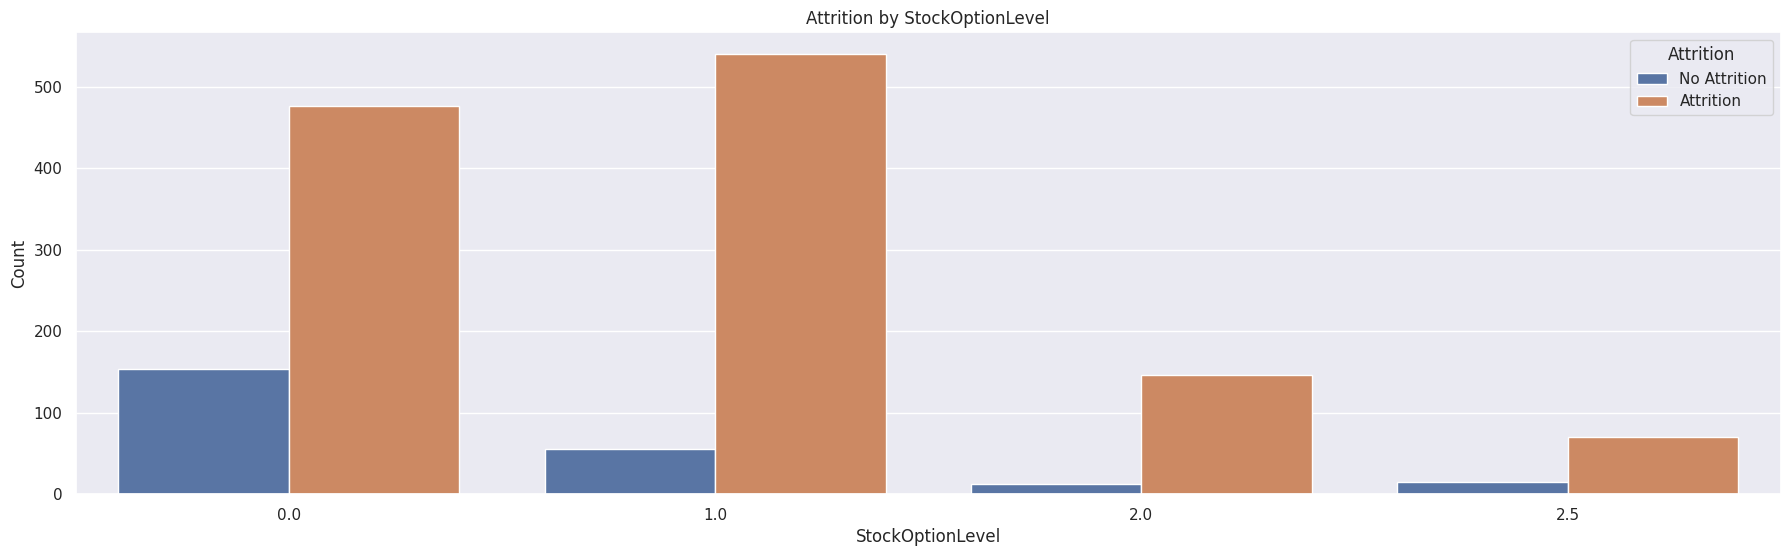

In [434]:
plt.figure(figsize=(22, 6))
sns.countplot(x='StockOptionLevel', hue='Attrition', data=df)
plt.title('Attrition by StockOptionLevel')
plt.xlabel('StockOptionLevel')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

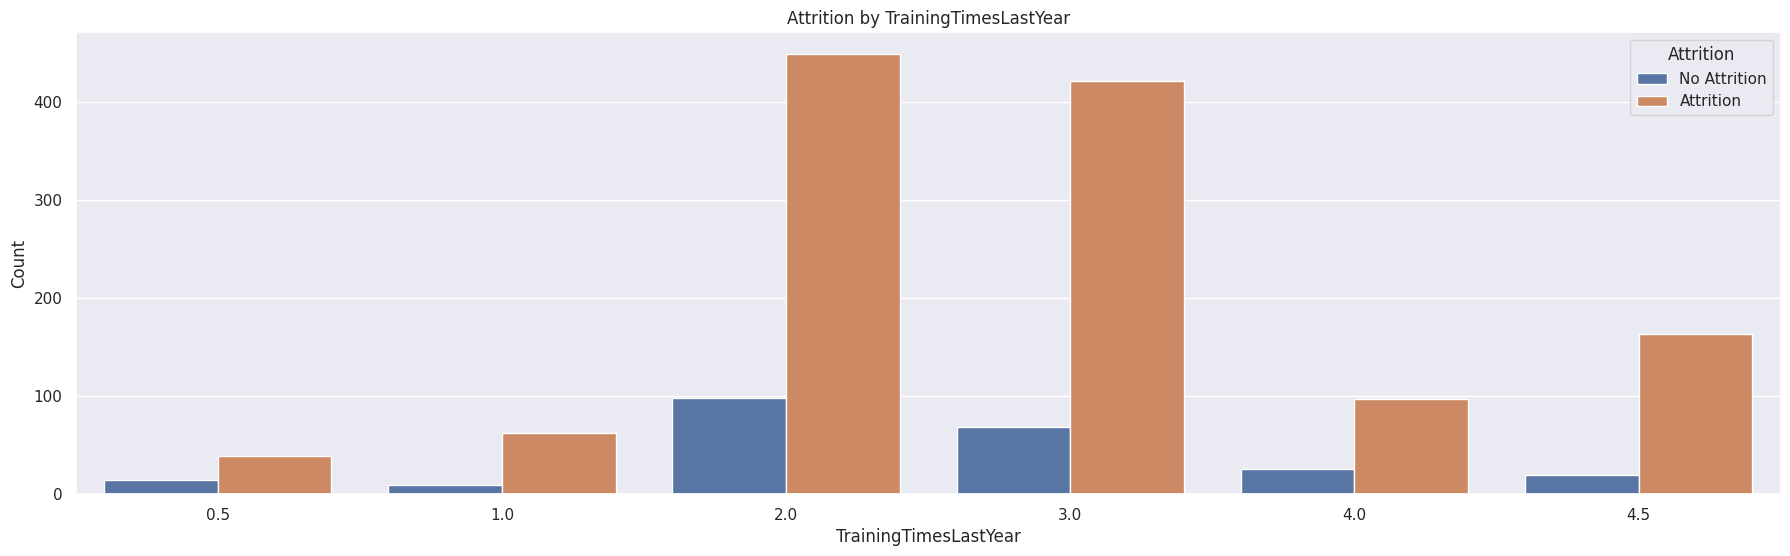

In [435]:
plt.figure(figsize=(22, 6))
sns.countplot(x='TrainingTimesLastYear', hue='Attrition', data=df)
plt.title('Attrition by TrainingTimesLastYear')
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

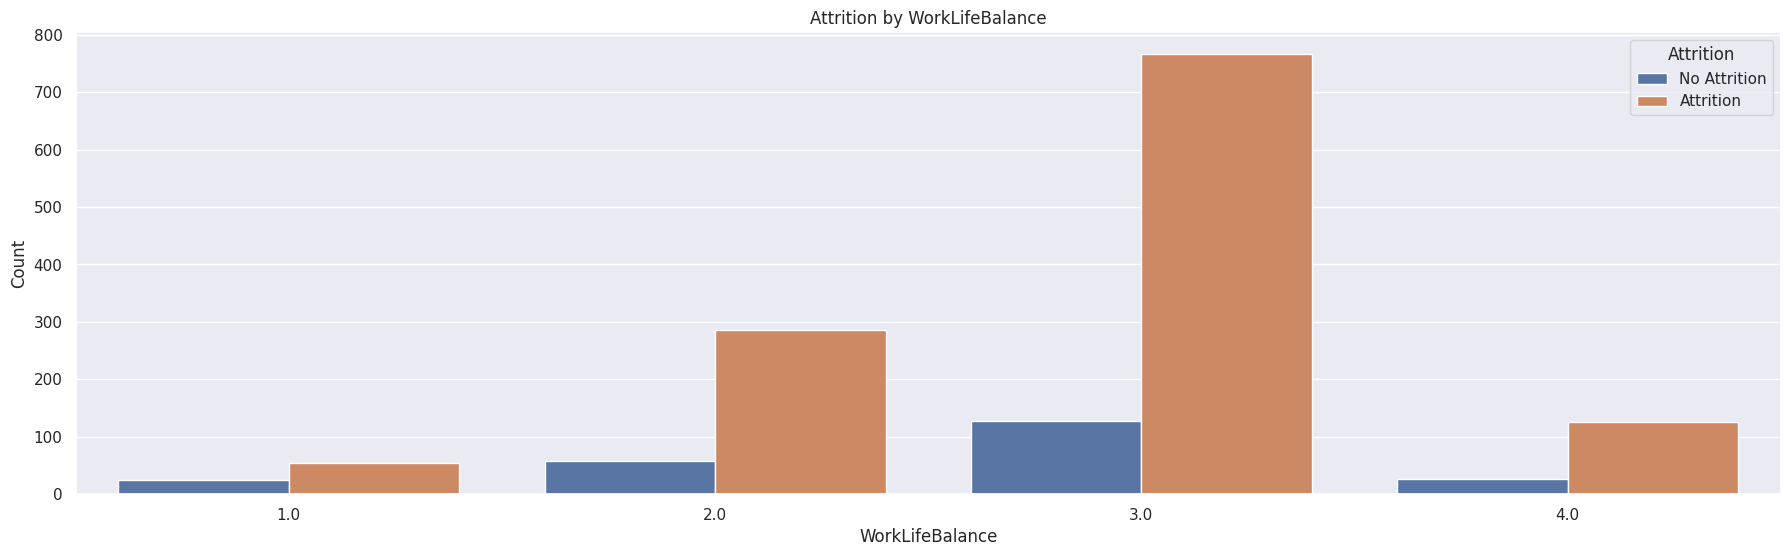

In [436]:
plt.figure(figsize=(22, 6))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title('Attrition by WorkLifeBalance')
plt.xlabel('WorkLifeBalance')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

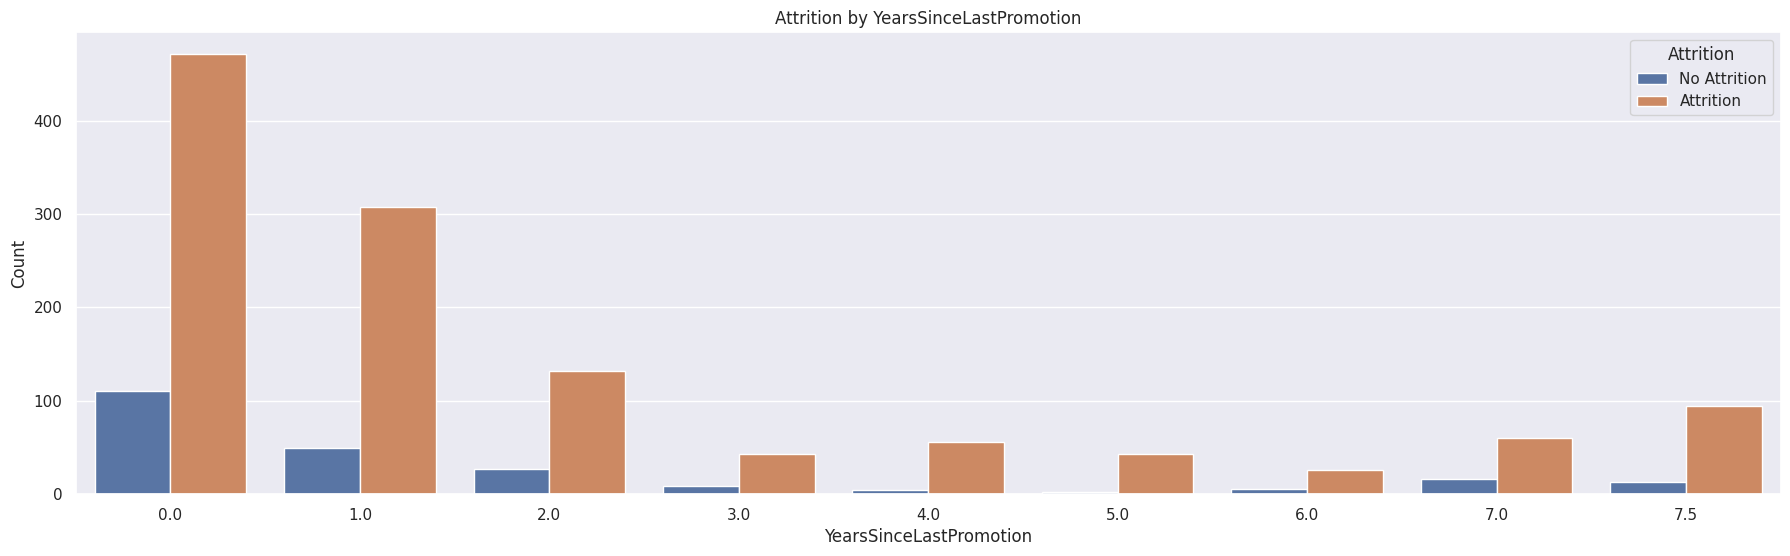

In [437]:
plt.figure(figsize=(22, 6))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df)
plt.title('Attrition by YearsSinceLastPromotion')
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

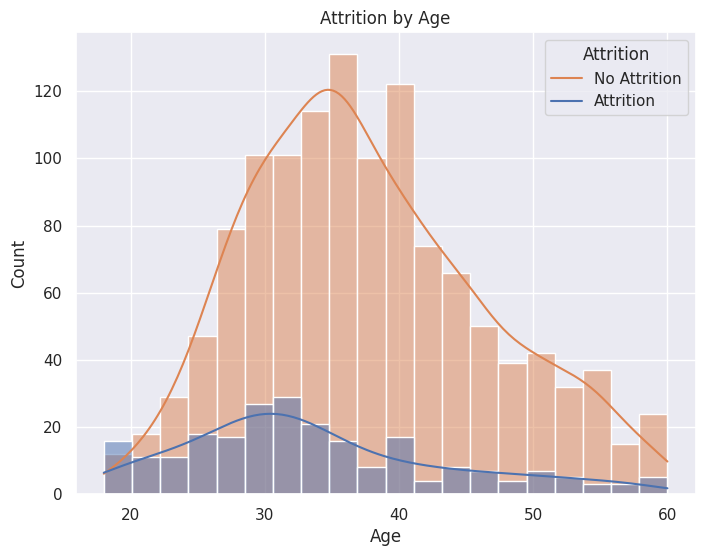

In [438]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, bins=20)
plt.title('Attrition by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

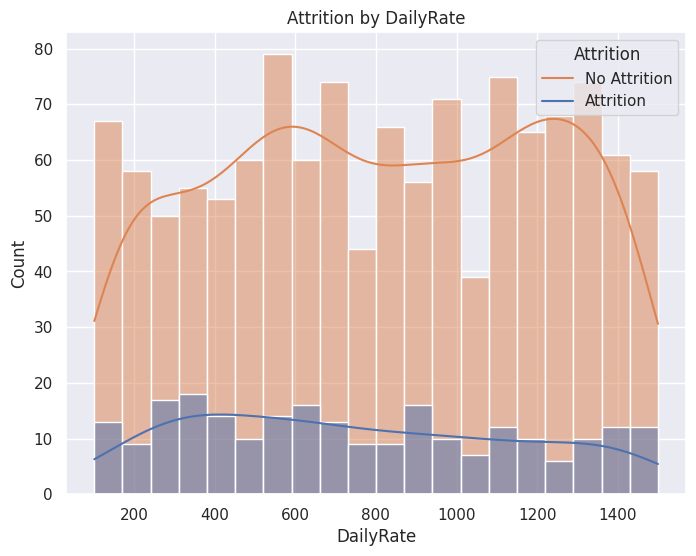

In [439]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='DailyRate', hue='Attrition', kde=True, bins=20)
plt.title('Attrition by DailyRate')
plt.xlabel('DailyRate')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

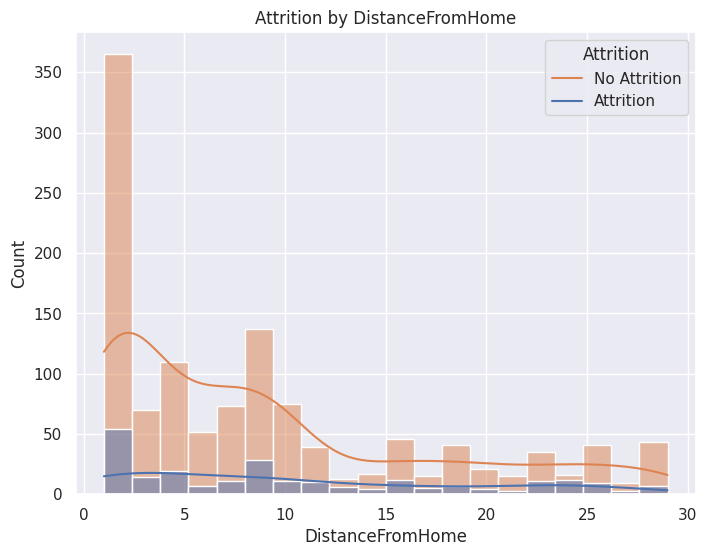

In [440]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='DistanceFromHome', hue='Attrition', kde=True, bins=20)
plt.title('Attrition by DistanceFromHome')
plt.xlabel('DistanceFromHome')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

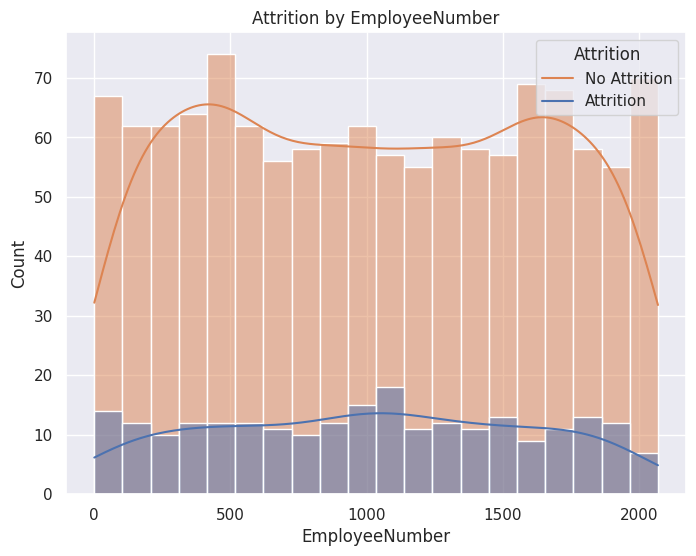

In [441]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='EmployeeNumber', hue='Attrition', kde=True, bins=20)
plt.title('Attrition by EmployeeNumber')
plt.xlabel('EmployeeNumber')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

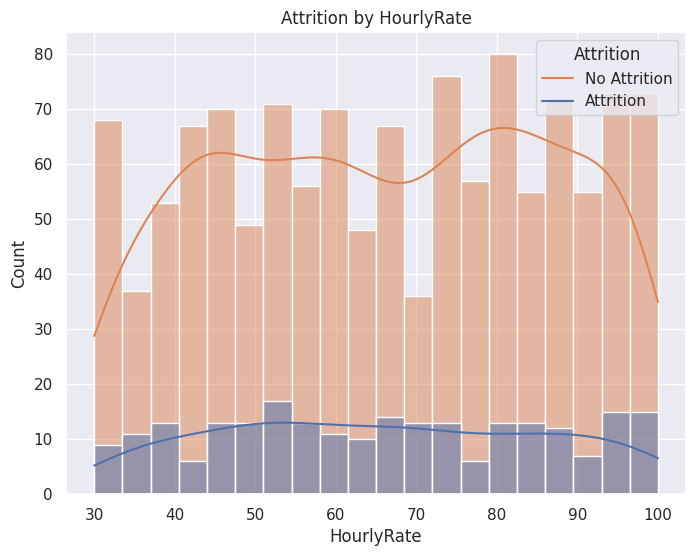

In [442]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='HourlyRate', hue='Attrition', kde=True, bins=20)
plt.title('Attrition by HourlyRate')
plt.xlabel('HourlyRate')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

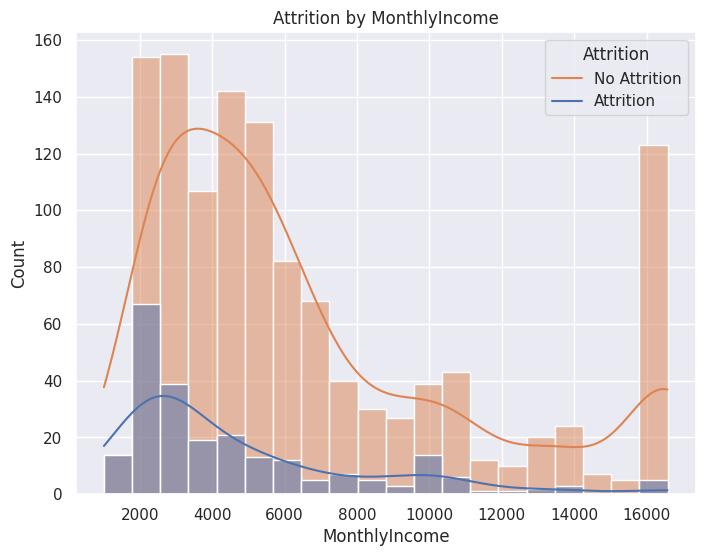

In [443]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=True, bins=20)
plt.title('Attrition by MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

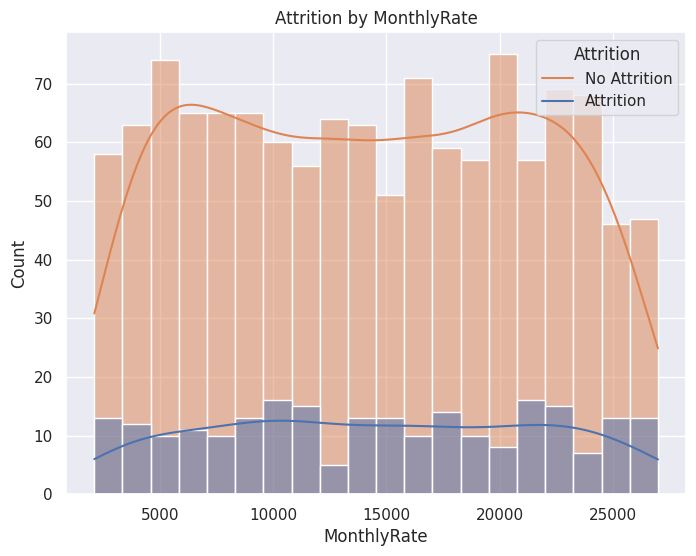

In [444]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='MonthlyRate', hue='Attrition', kde=True, bins=20)
plt.title('Attrition by MonthlyRate')
plt.xlabel('MonthlyRate')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

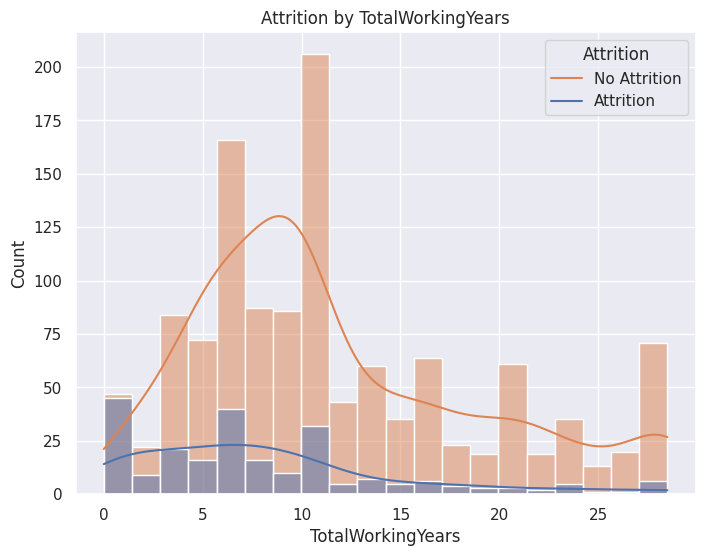

In [445]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='TotalWorkingYears', hue='Attrition', kde=True, bins=20)
plt.title('Attrition by TotalWorkingYears')
plt.xlabel('TotalWorkingYears')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

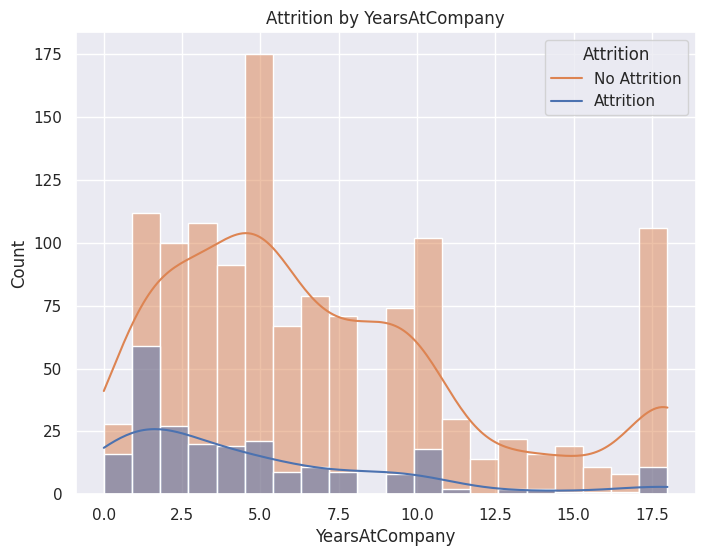

In [446]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', kde=True, bins=20)
plt.title('Attrition by YearsAtCompany')
plt.xlabel('YearsAtCompany')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

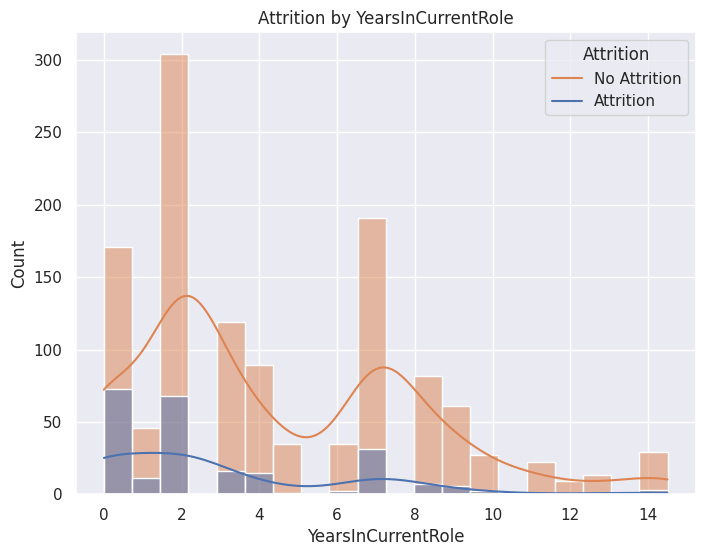

In [447]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='YearsInCurrentRole', hue='Attrition', kde=True, bins=20)
plt.title('Attrition by YearsInCurrentRole')
plt.xlabel('YearsInCurrentRole')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

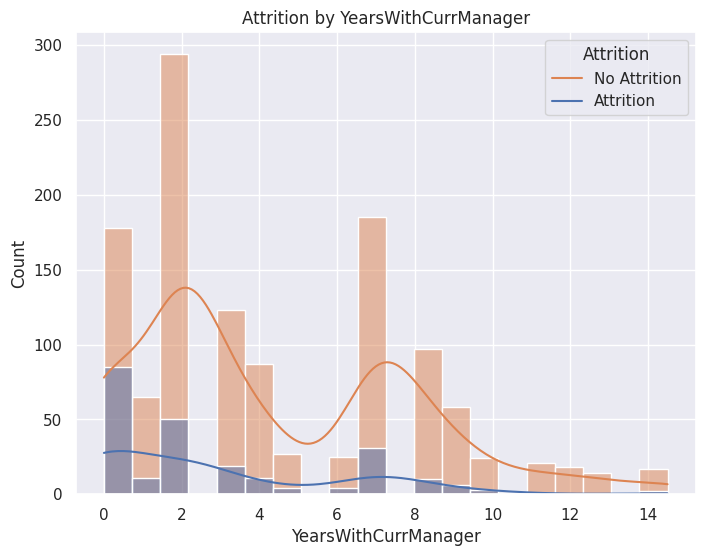

In [448]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='YearsWithCurrManager', hue='Attrition', kde=True, bins=20)
plt.title('Attrition by YearsWithCurrManager')
plt.xlabel('YearsWithCurrManager')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
plt.show()

<ipython-input-449-265b9ea5a06e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<Axes: >

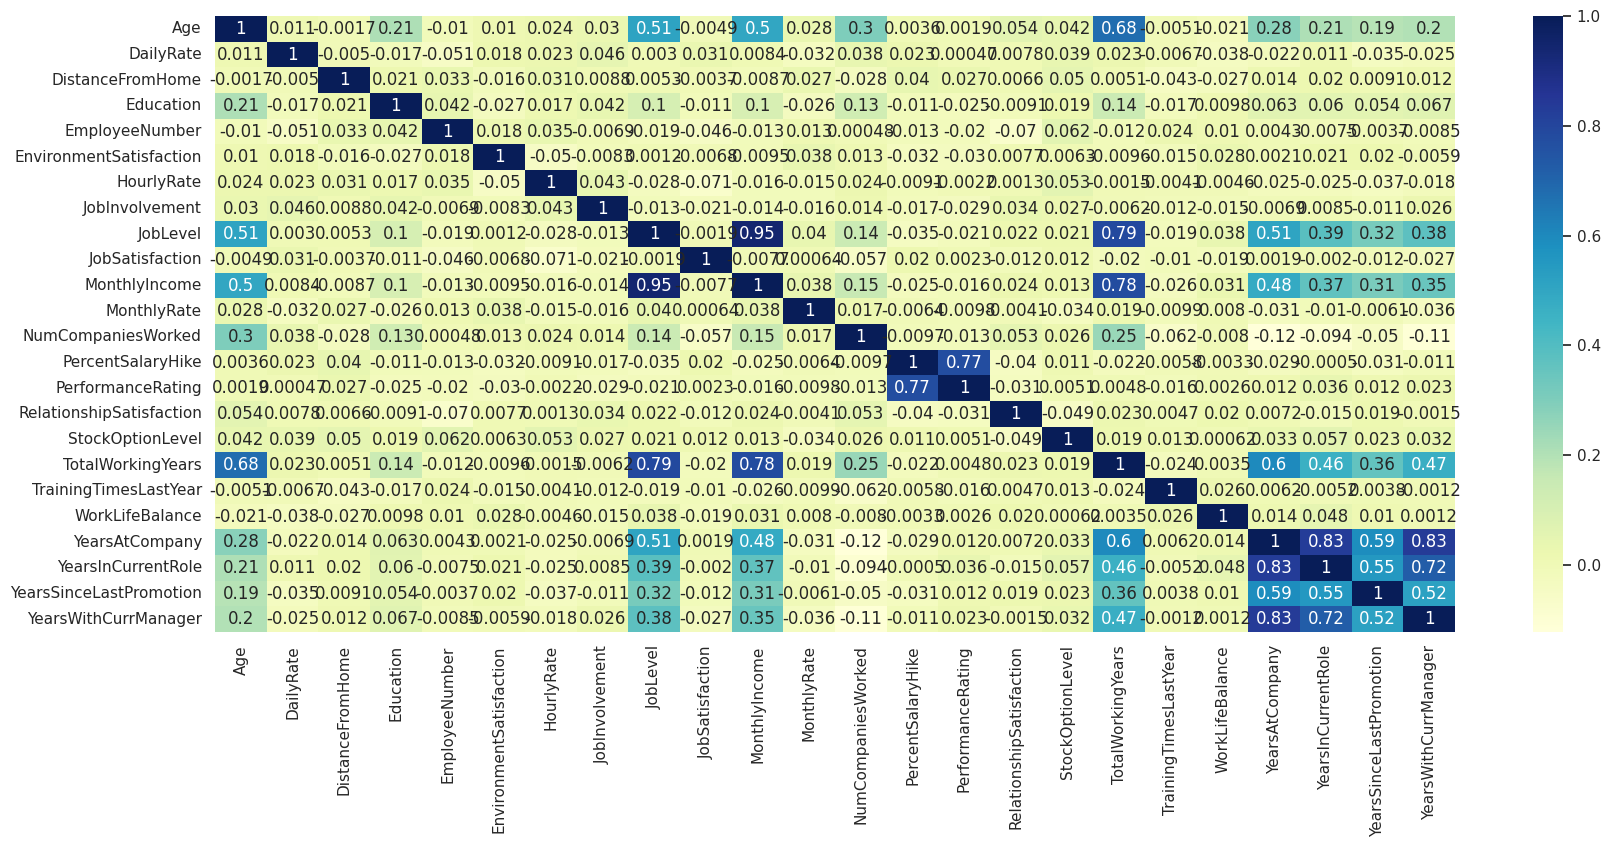

In [449]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


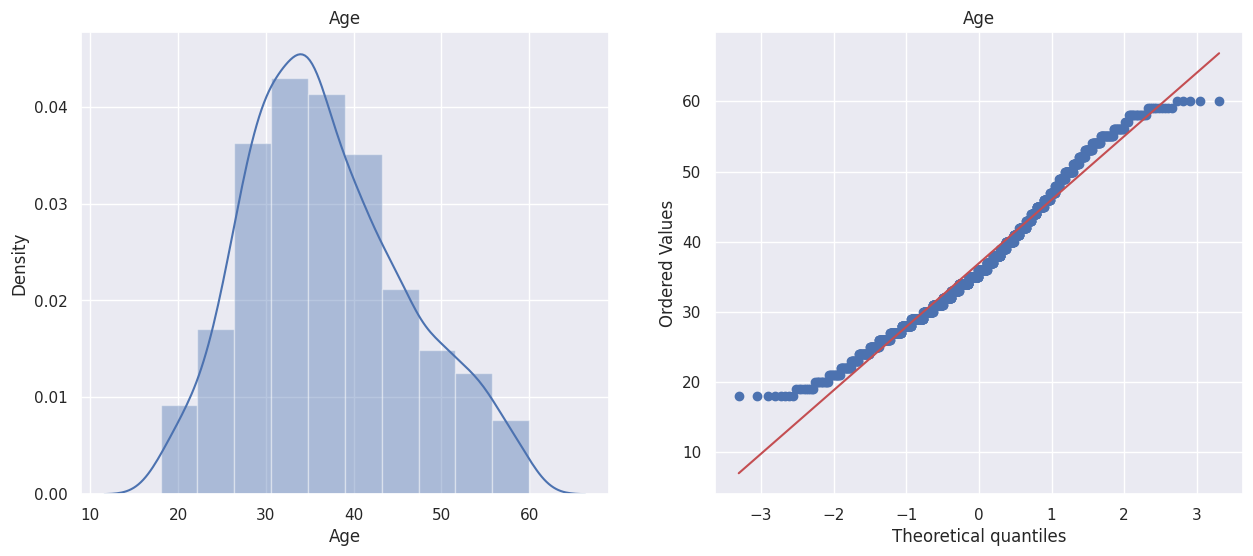

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


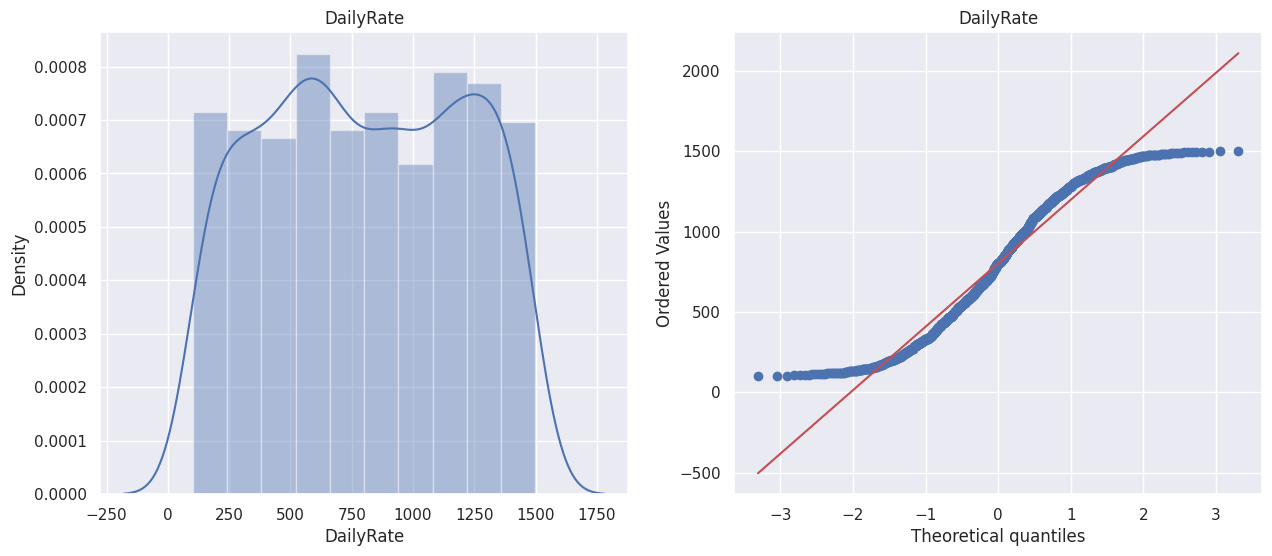

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


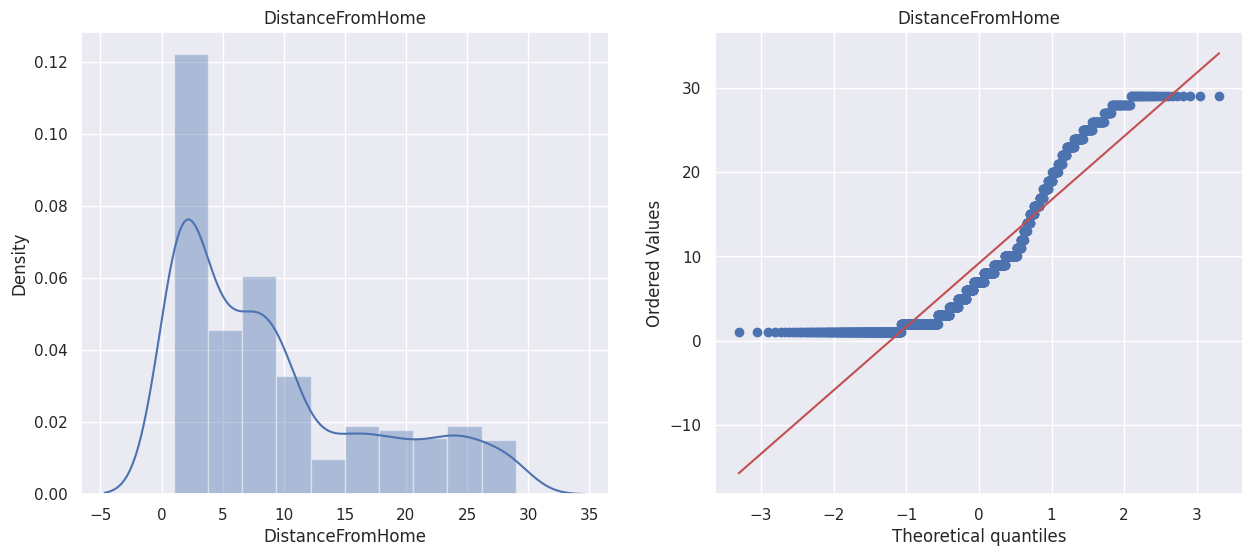

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


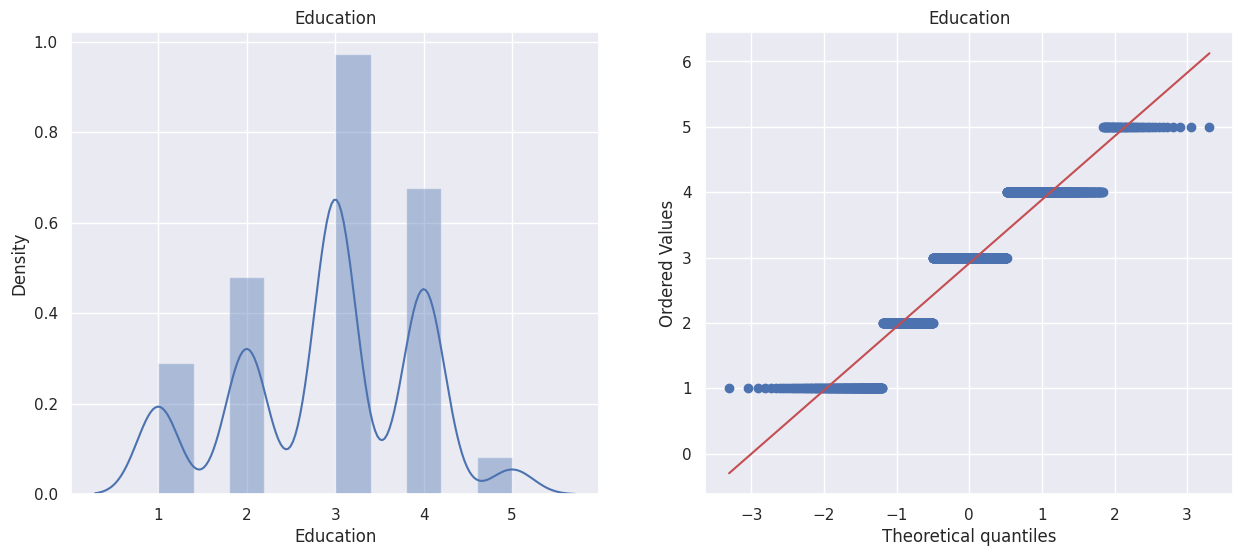

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


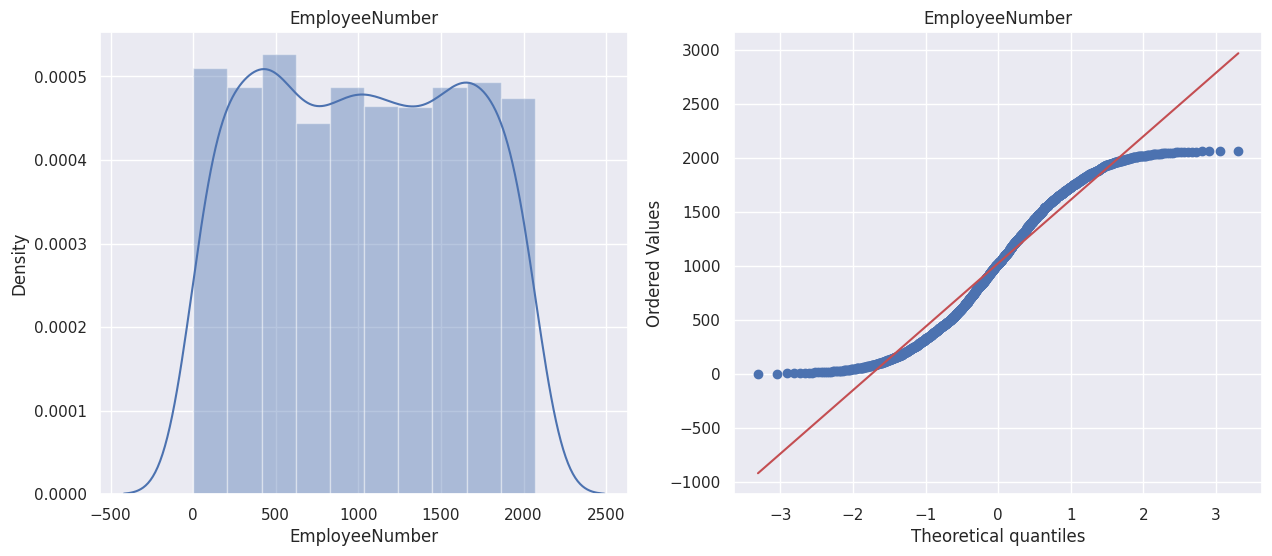

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


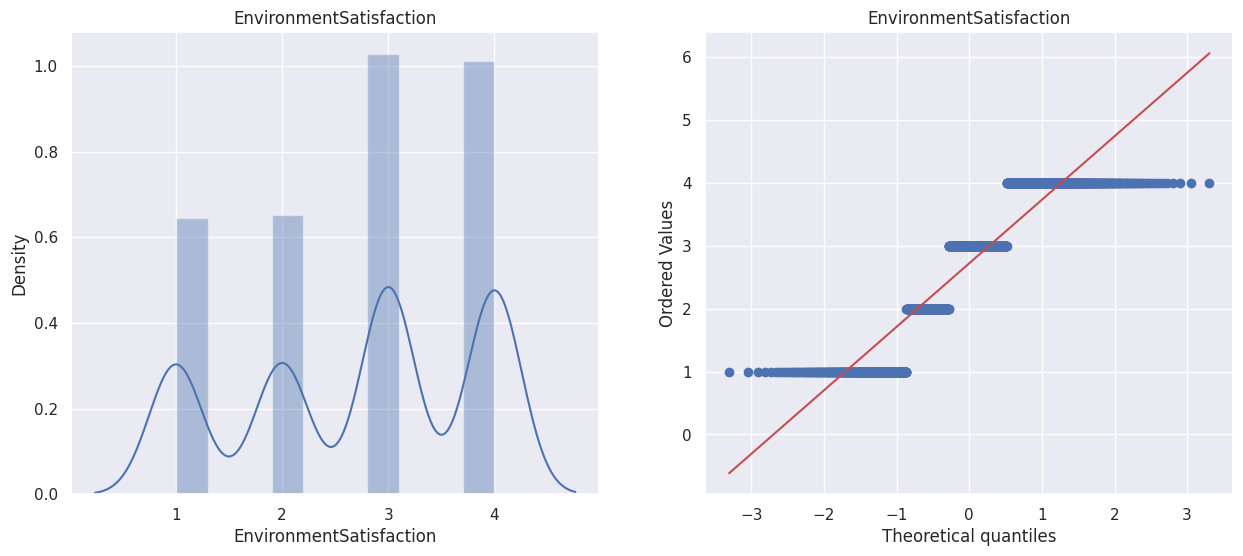

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


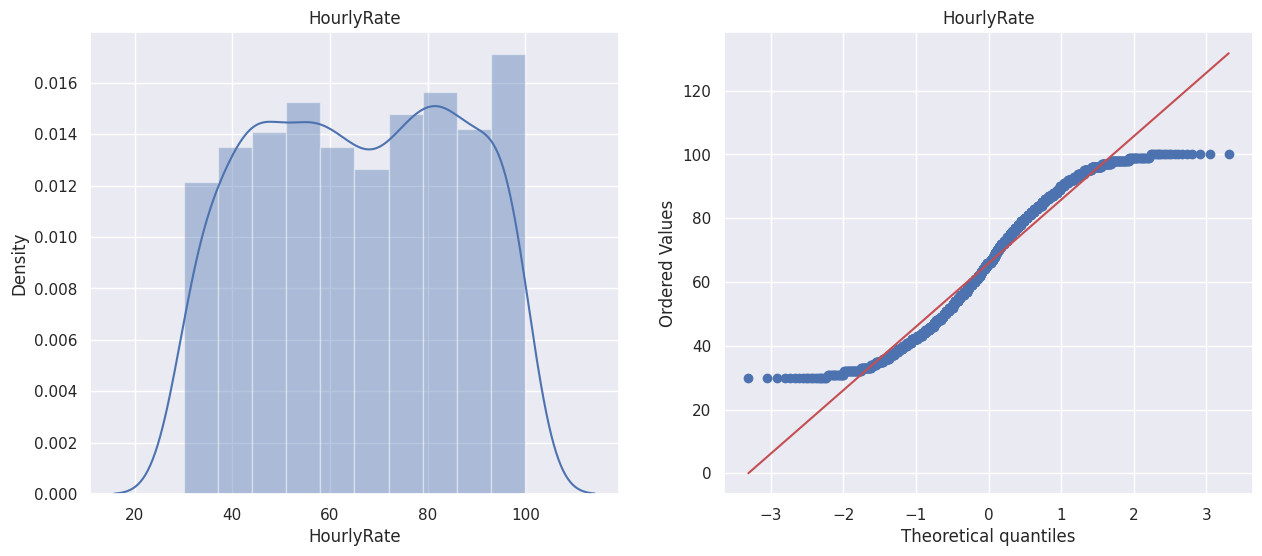

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


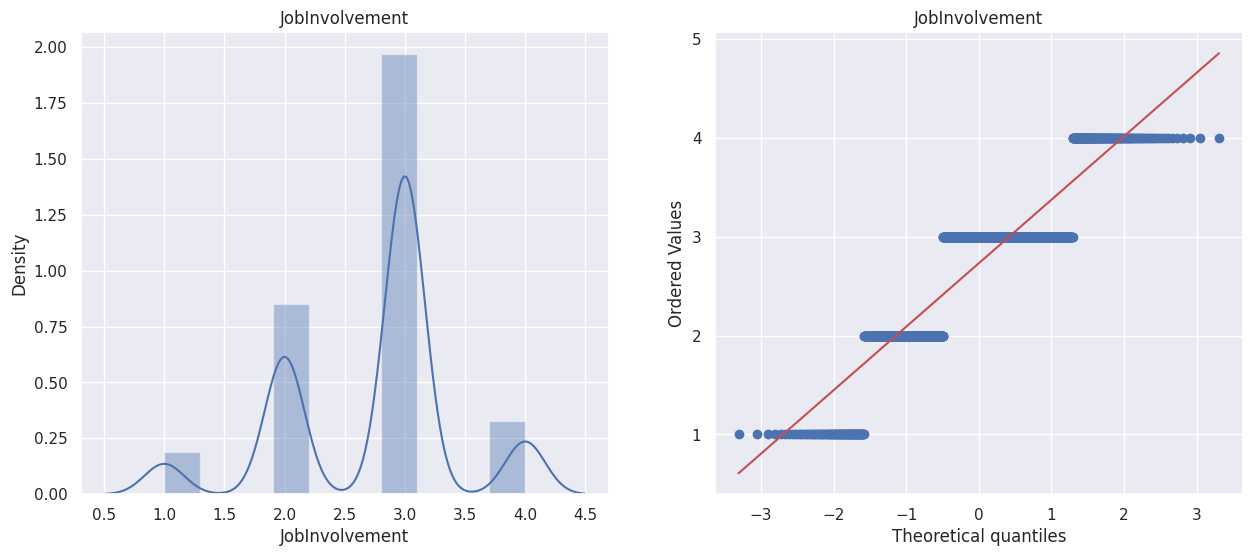

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


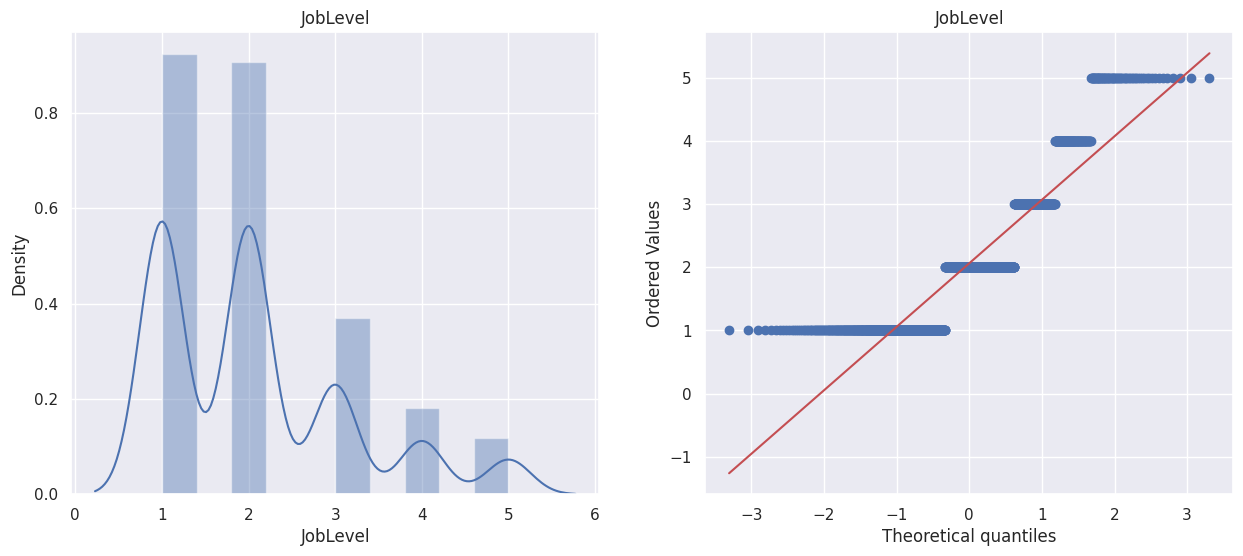

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


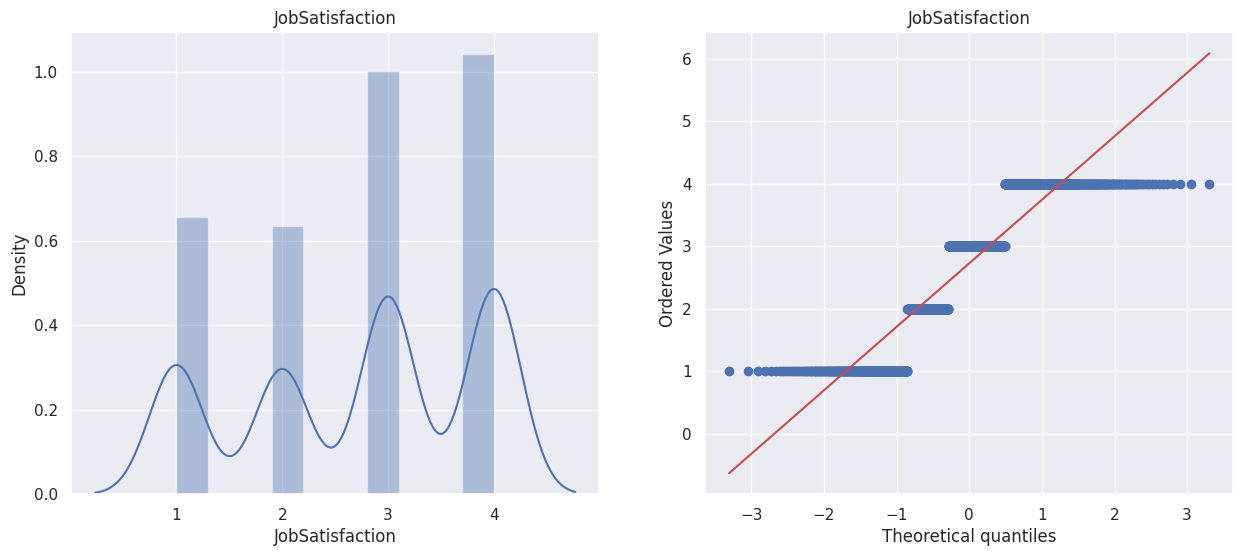

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


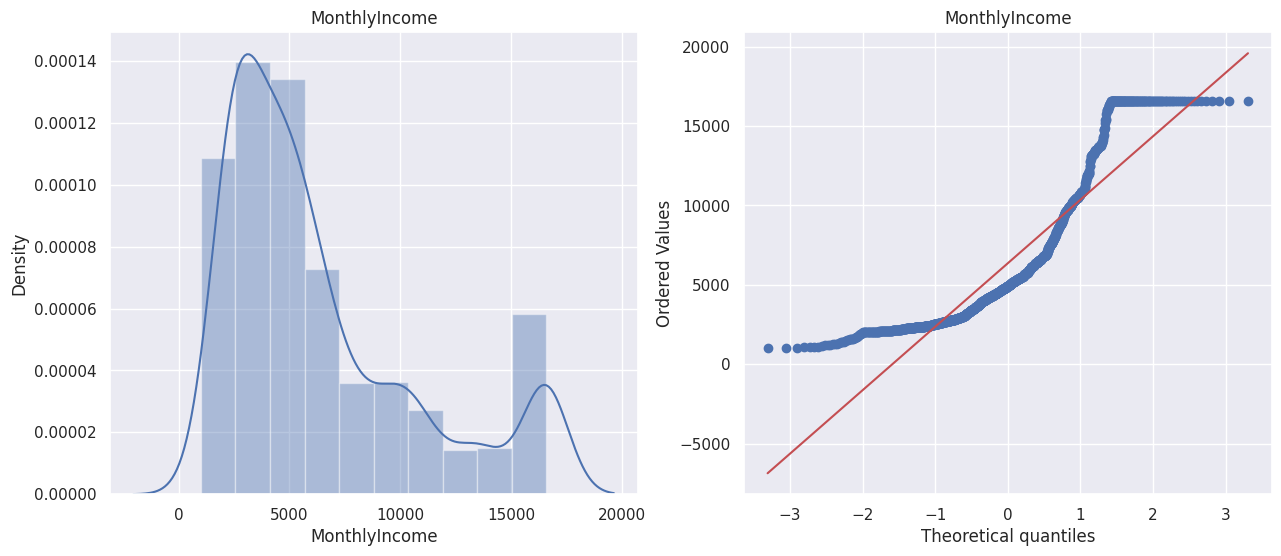

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


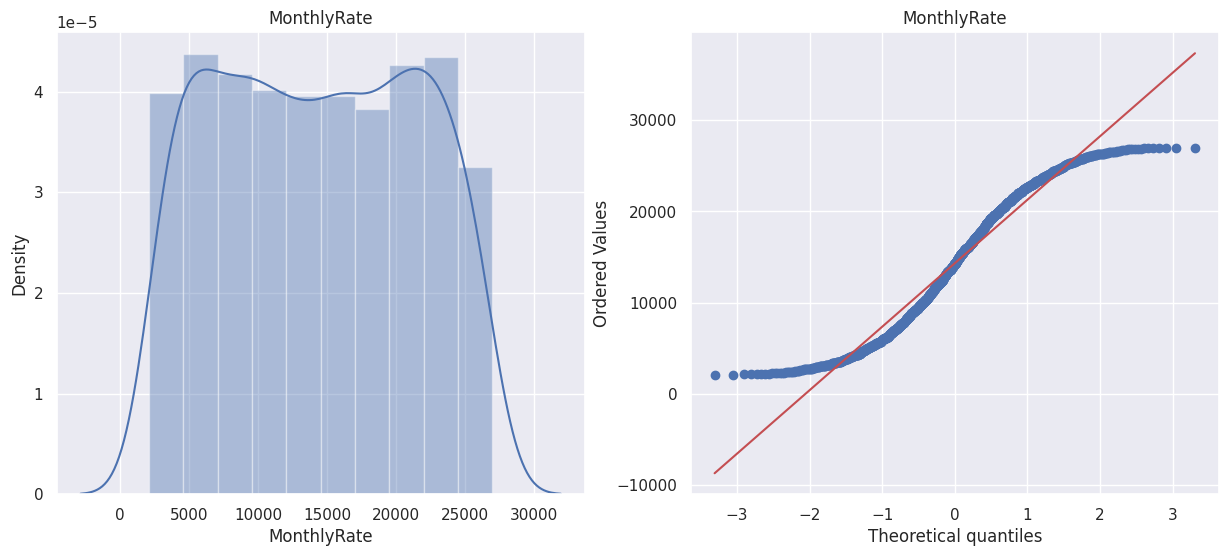

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


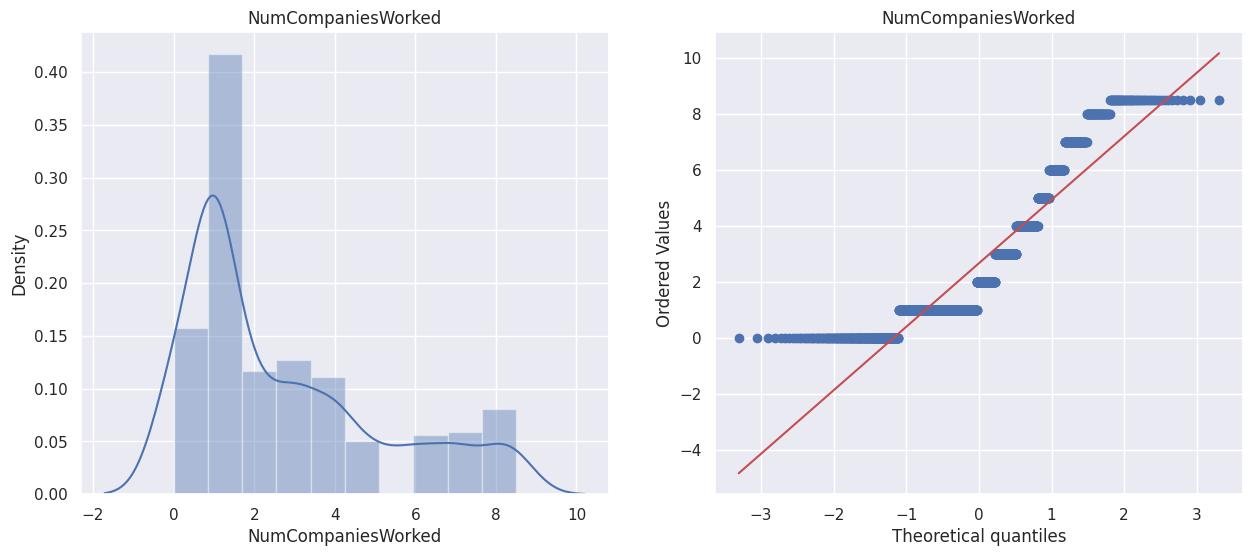

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


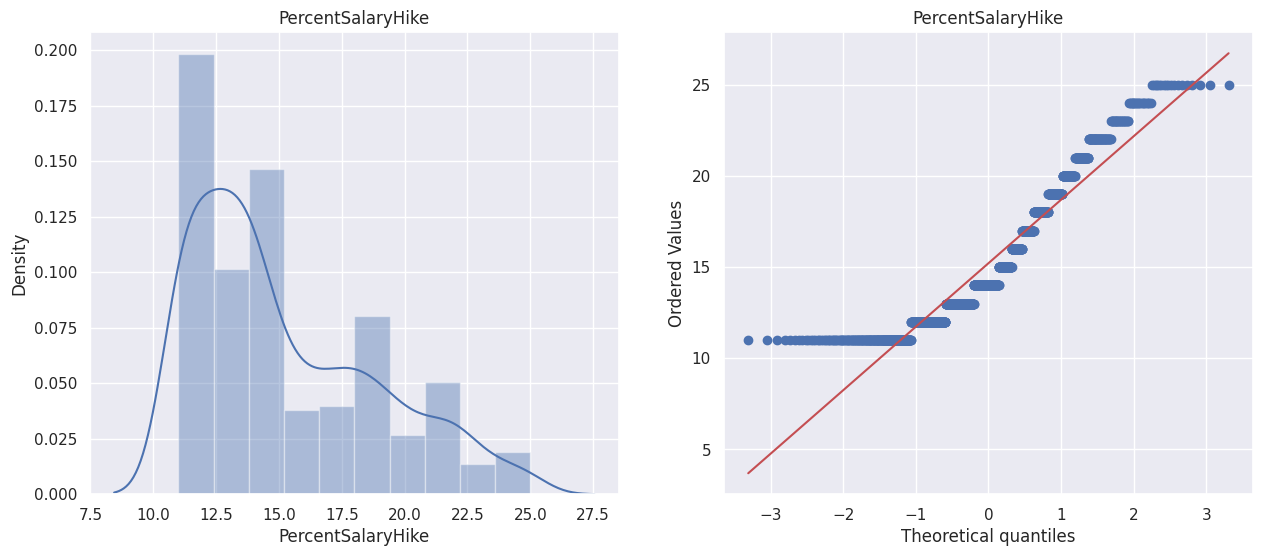

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


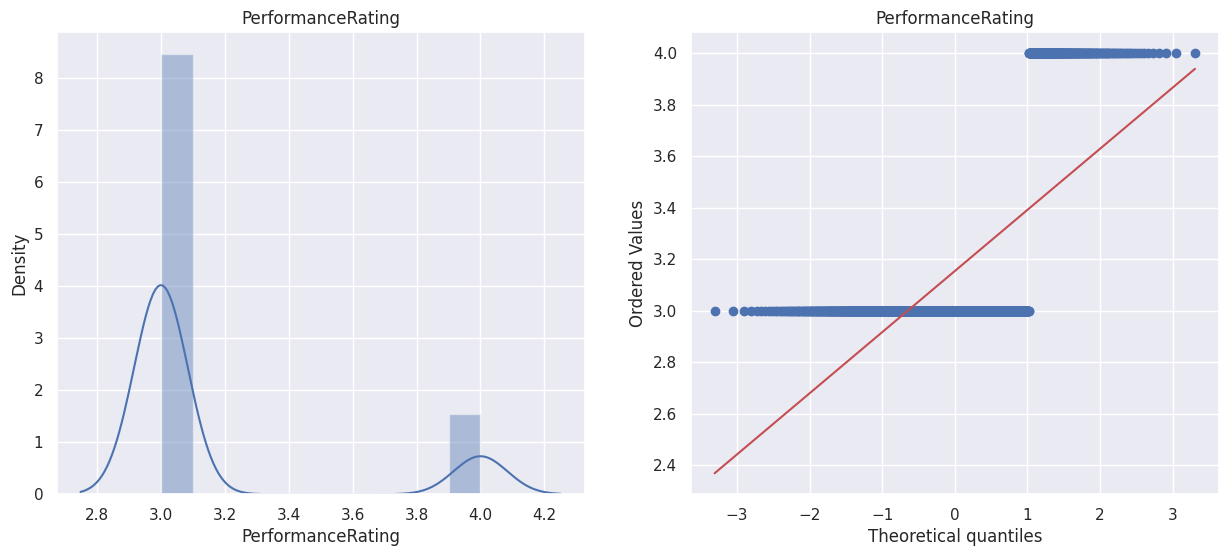

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


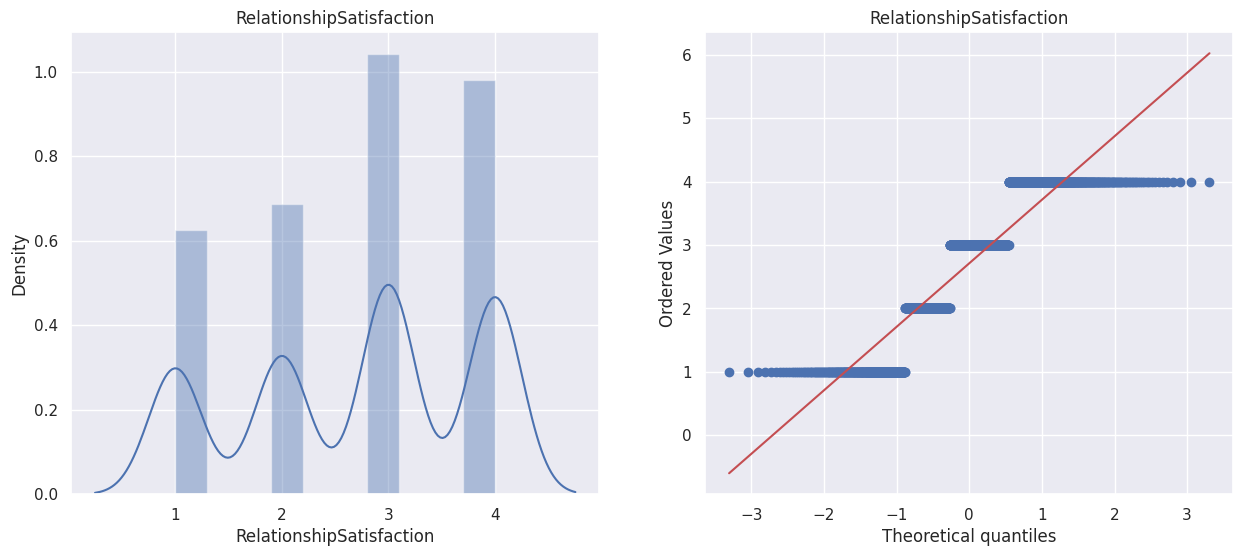

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


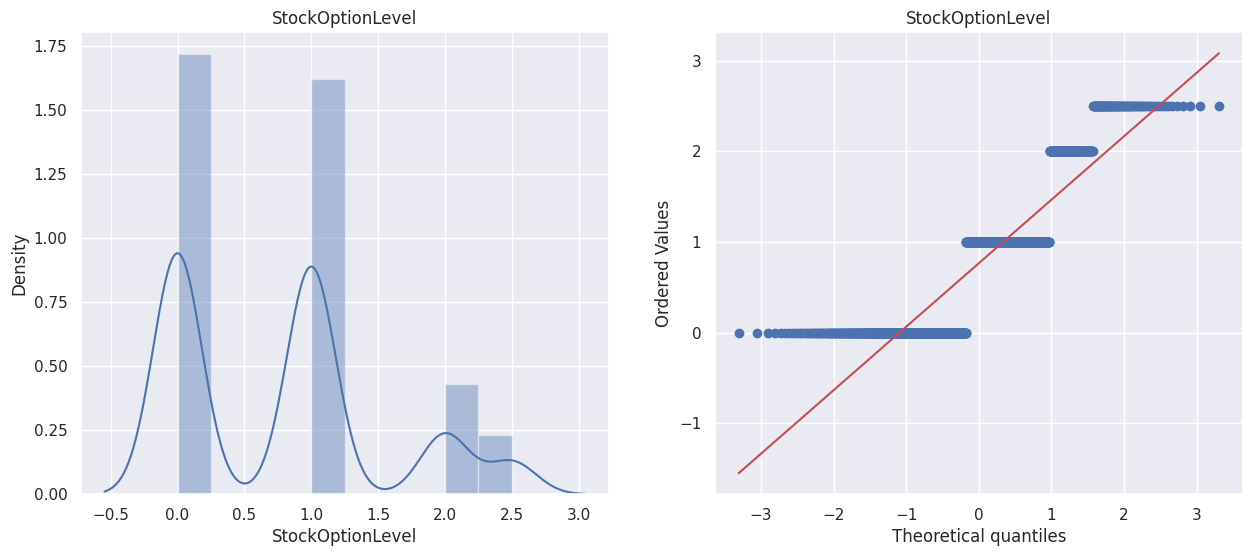

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


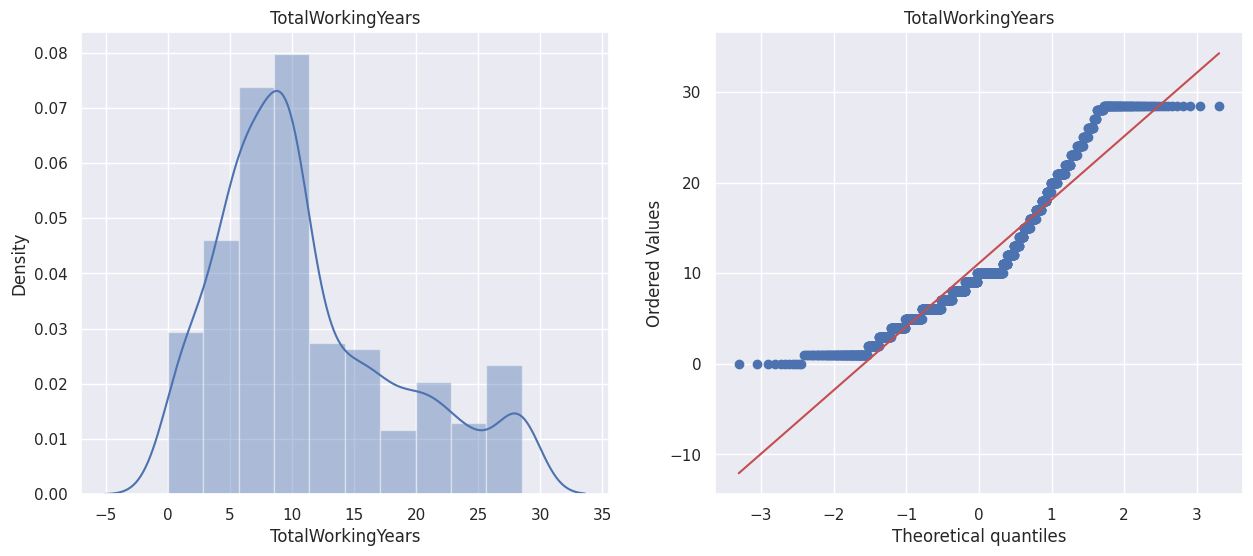

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


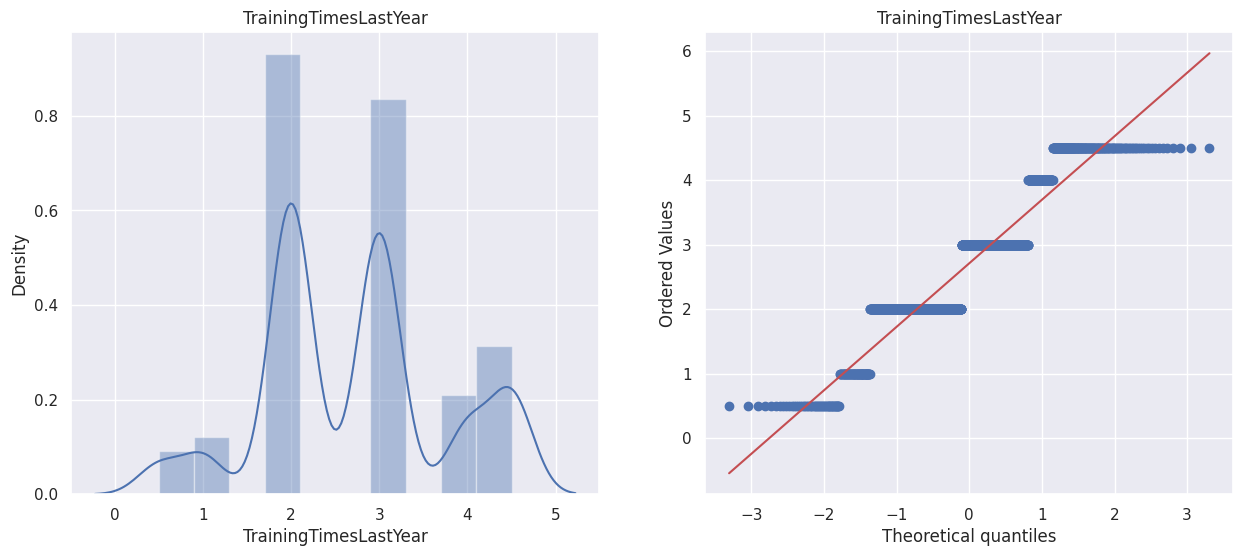

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


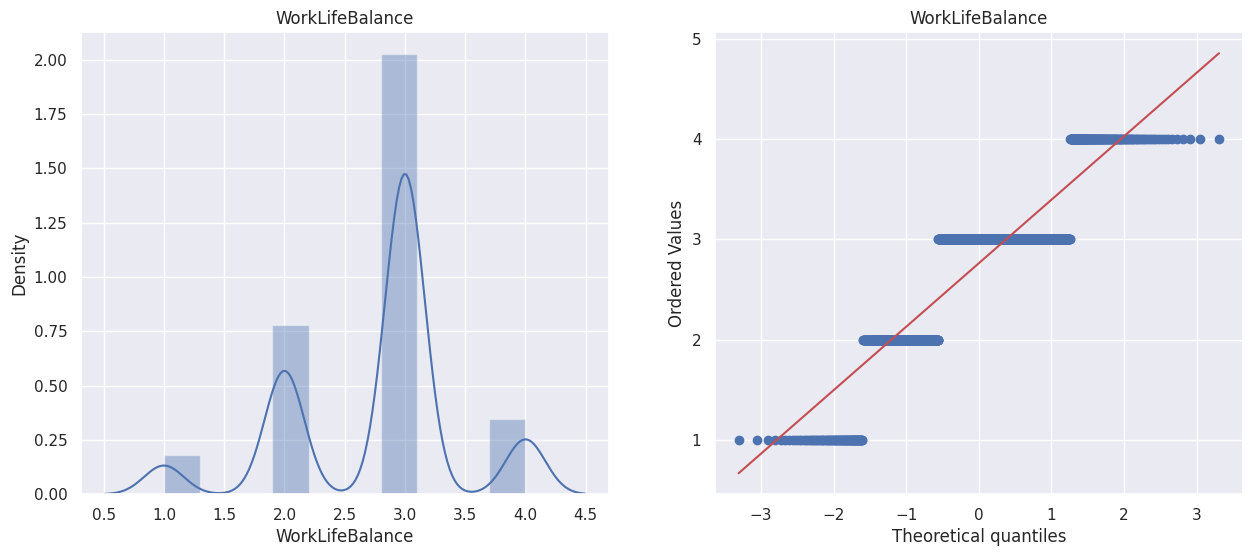

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


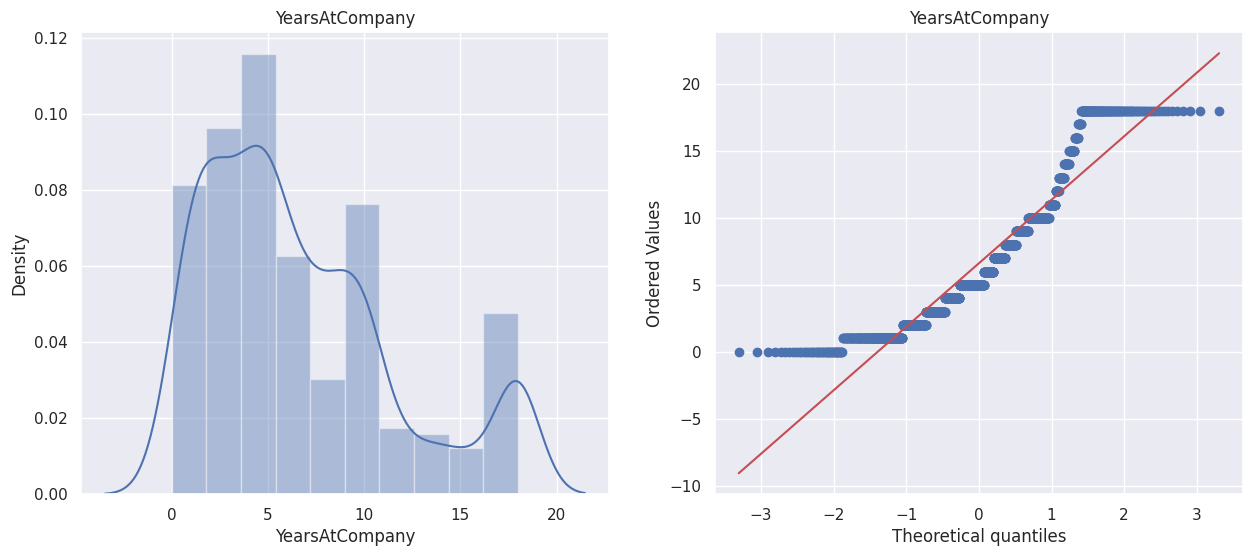

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


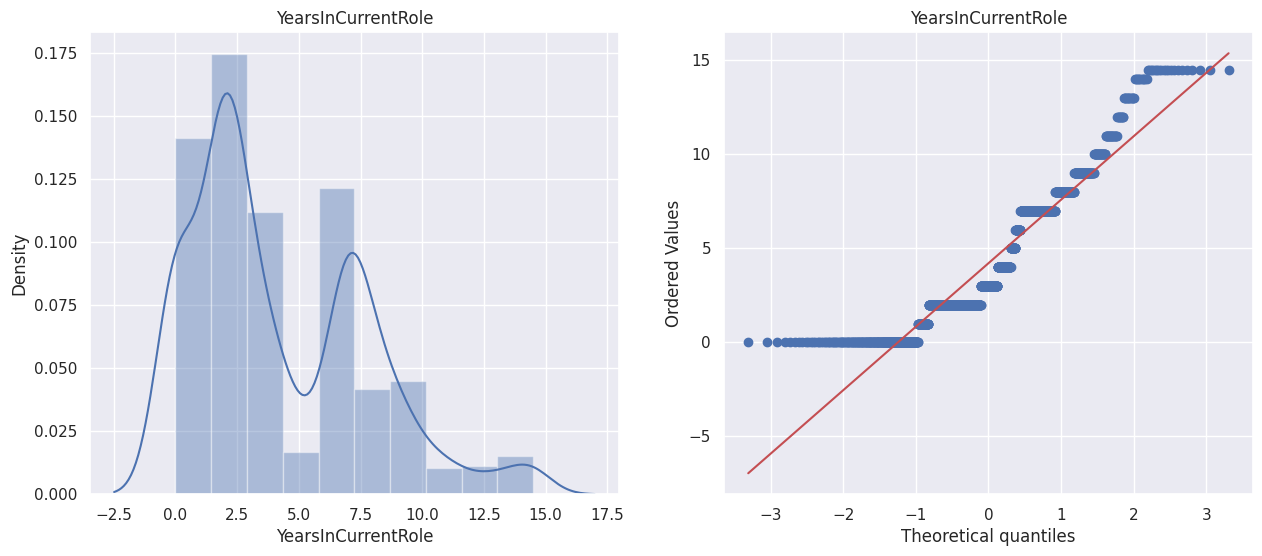

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


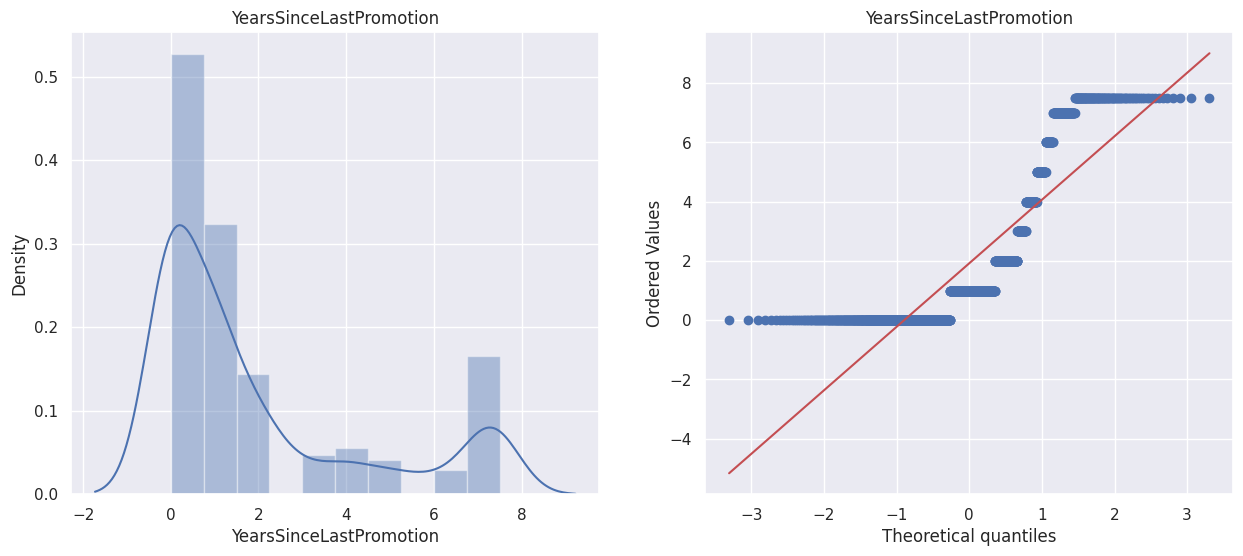

<ipython-input-450-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


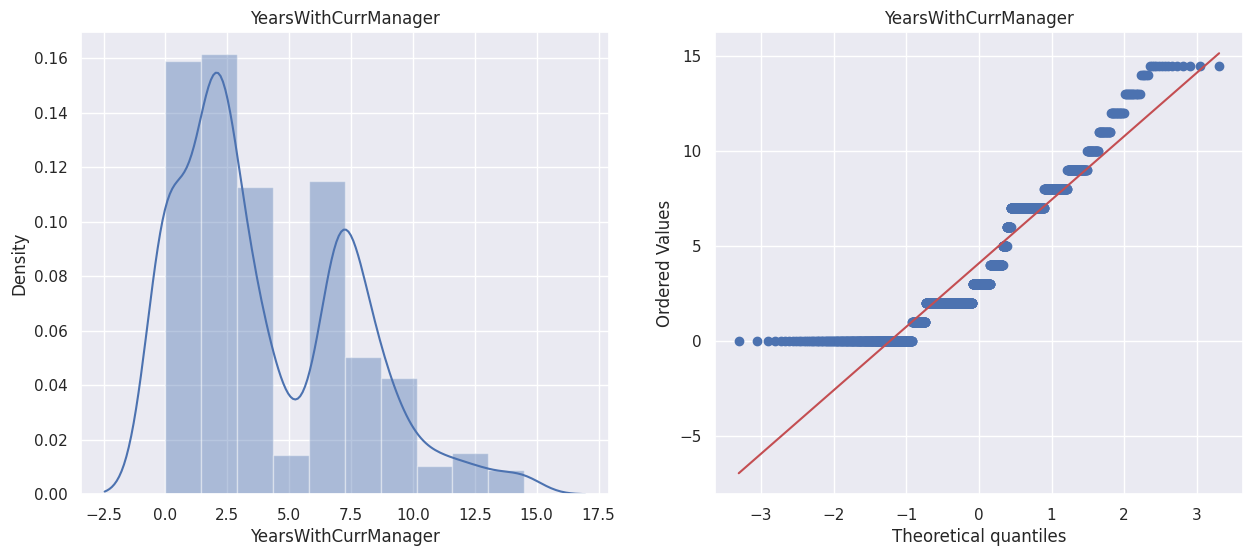

In [450]:
num_cols = df.select_dtypes(include=["int64","float64"])
def plots(num_cols, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    #num_cols[variable].hist()
    sns.distplot(num_cols[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(num_cols[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
for i in num_cols.columns:
  plots(num_cols, i)

#### **Convert Categorical Data To Number**

In [451]:
le = LabelEncoder()
df1 = df.copy()

select_col = df1.select_dtypes(include=["object"])

for i in select_col.columns:
  df1[i] = le.fit_transform(df1[i])

In [452]:
df1.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  41.0          1               2     1102.0           2               1.0   
1  49.0          0               1      279.0           1               8.0   
2  37.0          1               2     1373.0           1               2.0   
3  33.0          0               1     1392.0           1               3.0   
4  27.0          0               2      591.0           1               2.0   

   Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0        2.0               1             1.0                      2.0  ...   
1        1.0               1             2.0                      3.0  ...   
2        2.0               4             4.0                      4.0  ...   
3        4.0               1             5.0                      4.0  ...   
4        1.0               3             7.0                      1.0  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                       1.0               0.0   
1                  4                       4.0               1.0   
2                  3                       2.0               0.0   
3                  3                       3.0               0.0   
4                  3                       4.0               1.0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                8.0                    0.5              1.0             6.0   
1               10.0                    3.0              3.0            10.0   
2                7.0                    3.0              3.0             0.0   
3                8.0                    3.0              3.0             8.0   
4                6.0                    3.0              3.0             2.0   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                 4.0                      0.0                   5.0  
1                 7.0                      1.0                   7.0  
2                 0.0                      0.0                   0.0  
3                 7.0                      3.0                   0.0  
4                 2.0                      2.0                   2.0  

[5 rows x 32 columns]

# **Feature Engineering**

#### **Mutual Information**

In [453]:
Y = df1.pop("Attrition")
X = df1.copy()

In [454]:
mi_score = mutual_info_classif(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

BusinessTravel              0.000000
DistanceFromHome            0.000000
Education                   0.000000
EducationField              0.000000
EnvironmentSatisfaction     0.000000
NumCompaniesWorked          0.000000
YearsSinceLastPromotion     0.000000
WorkLifeBalance             0.000998
MonthlyRate                 0.002049
RelationshipSatisfaction    0.003031
DailyRate                   0.003390
EmployeeNumber              0.003898
PerformanceRating           0.004989
TotalWorkingYears           0.006581
HourlyRate                  0.008275
Department                  0.009536
PercentSalaryHike           0.010649
Gender                      0.011472
TrainingTimesLastYear       0.013319
JobSatisfaction             0.015730
JobInvolvement              0.019090
YearsAtCompany              0.019424
MaritalStatus               0.019708
Age                         0.021575
StockOptionLevel            0.024245
OverTime                    0.024620
YearsWithCurrManager        0.025156
J

<Axes: >

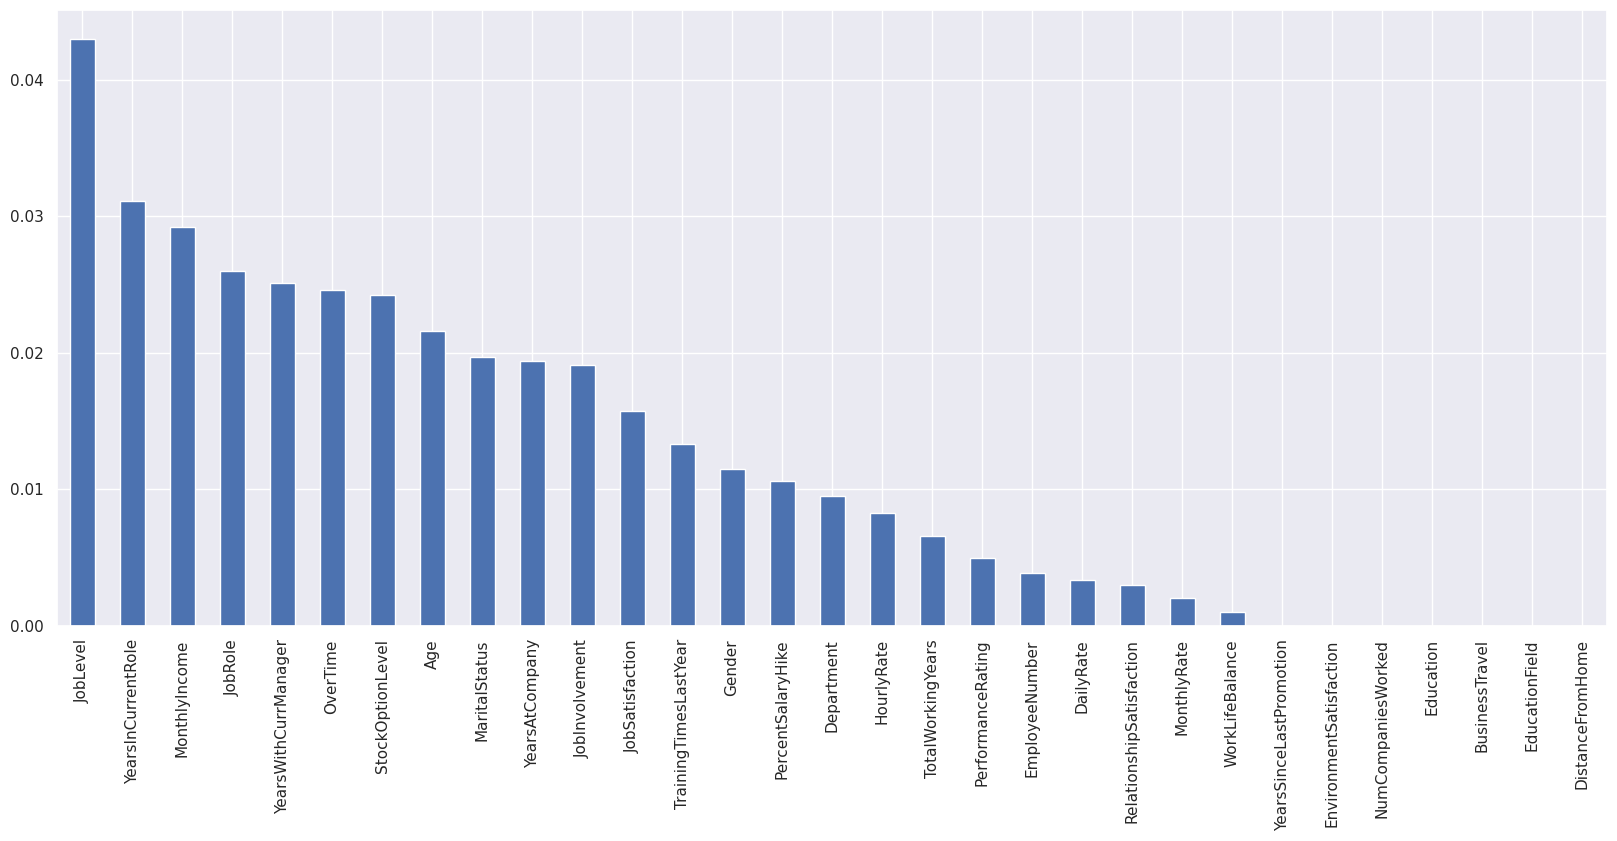

In [455]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [456]:
X.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

#### **Create New Features**

In [457]:
# Calculate the ratio of YearsAtCompany to TotalWorkingYears
X["Experience_ratio"] = X["YearsAtCompany"] / X["TotalWorkingYears"]

# Count the number of job changes by subtracting NumCompaniesWorked from YearsAtCompany.
X["Job_Hop_Count"] = X["YearsAtCompany"] - X["NumCompaniesWorked"]

# Calculate the percentage increase in salary due to PercentSalaryHike.
#X["Increase_Percentage"] = X["PercentSalaryHike"] / 100

# Create an index of overall job satisfaction based on EnvironmentSatisfaction, JobSatisfaction, and RelationshipSatisfaction.
X["Job_Satisfaction_Index"] = X["EnvironmentSatisfaction"] + X["JobSatisfaction"] + X["RelationshipSatisfaction"]



In [458]:
X.isnull().sum()

Age                          0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
Experience_ratio            11
Job_Hop_

In [459]:
X["Experience_ratio"] = X["Experience_ratio"].fillna(X["Experience_ratio"].mean())

In [460]:
X.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Experience_ratio            0
Job_Hop_Count               0
Job_Satisf

In [461]:
mi_score = mutual_info_classif(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

TrainingTimesLastYear       0.000000
BusinessTravel              0.000000
DailyRate                   0.000000
Education                   0.000000
EducationField              0.000000
EnvironmentSatisfaction     0.000000
MonthlyRate                 0.002157
MaritalStatus               0.003145
Experience_ratio            0.003687
EmployeeNumber              0.004016
Job_Satisfaction_Index      0.004094
JobSatisfaction             0.004490
JobInvolvement              0.006058
NumCompaniesWorked          0.006590
PerformanceRating           0.007255
HourlyRate                  0.007393
DistanceFromHome            0.008088
YearsInCurrentRole          0.008349
PercentSalaryHike           0.008794
Job_Hop_Count               0.009466
WorkLifeBalance             0.009995
JobLevel                    0.011304
RelationshipSatisfaction    0.011816
Gender                      0.013223
Age                         0.013259
YearsWithCurrManager        0.013552
Department                  0.013693
Y

<Axes: >

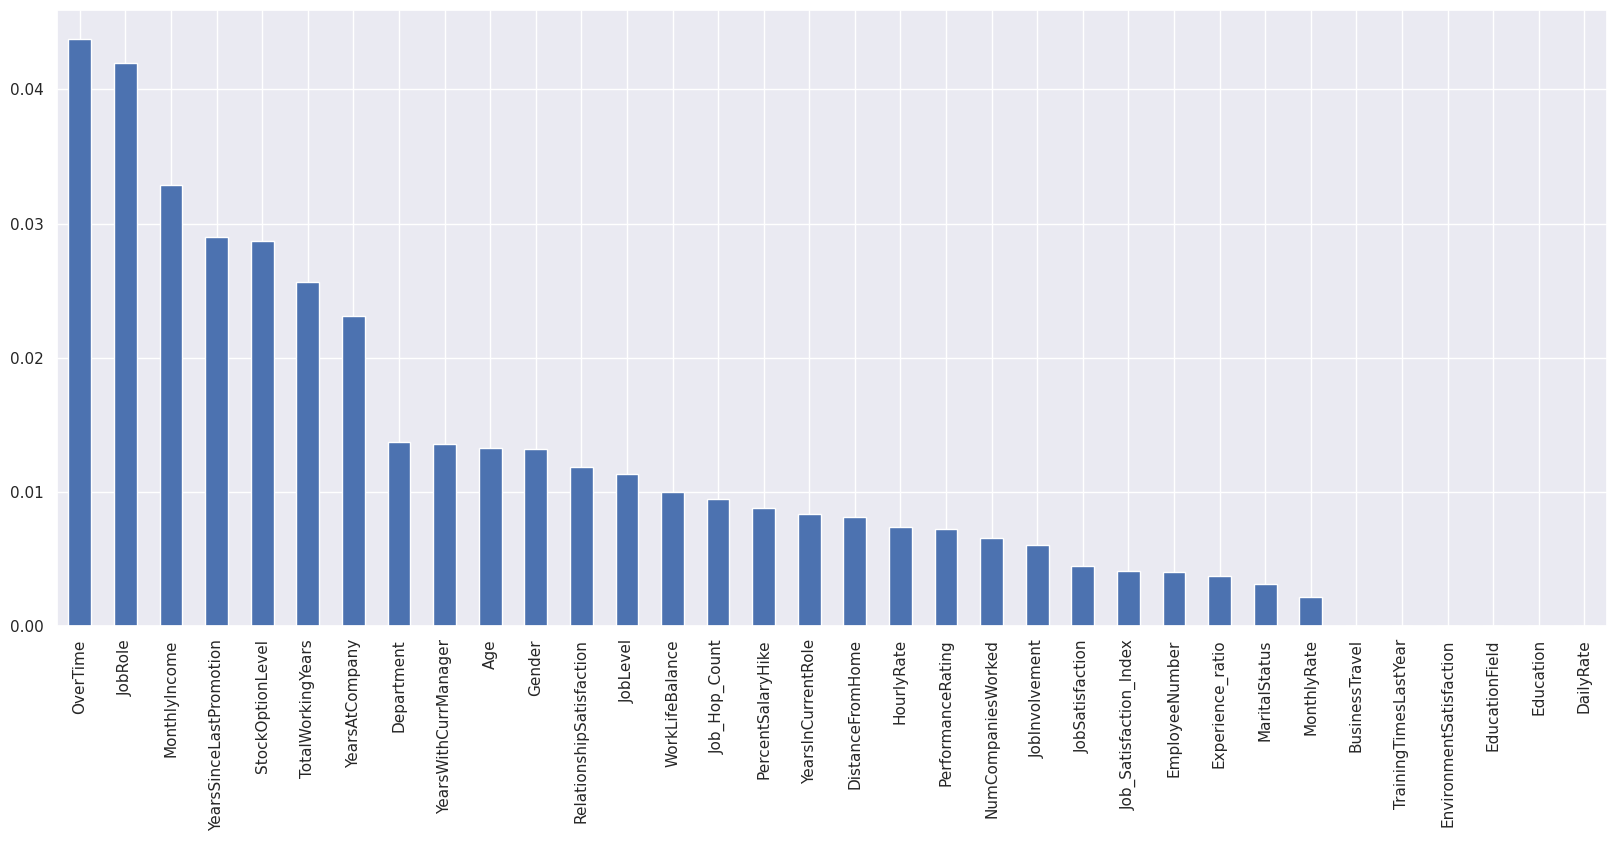

In [462]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [463]:
X1 = X[['Age', 'BusinessTravel', 'DailyRate','DistanceFromHome',
        'EducationField', 'EmployeeNumber',
        'Gender',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Experience_ratio',
       'Job_Hop_Count', 'Job_Satisfaction_Index']]

#### **Splitting Data Into Train and Test**

In [464]:
train_data,test_data,train_label,test_label = train_test_split(X1,Y,test_size=0.2,random_state=0)

In [465]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (1176, 25)
train_label :  (1176,)
test_data :  (294, 25)
test_label :  (294,)


#### **Normalizing Data**

In [466]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [467]:
train_data_sc

array([[ 2.3389367 ,  0.595307  , -0.48557354, ..., -2.0362606 ,
        -1.20079693,  1.49100594],
       [ 0.9043263 ,  0.595307  ,  0.36465323, ..., -0.1610382 ,
        -0.50687202,  2.02315252],
       [ 0.35255307,  0.595307  , -1.23722329, ...,  0.63366572,
         0.36053411, -1.16972697],
       ...,
       [ 0.68361701,  0.595307  ,  0.92900666, ...,  1.03101768,
         0.8809778 ,  0.42671278],
       [ 0.13184377,  0.595307  , -1.31608491, ..., -1.61799538,
        -1.54775938,  0.42671278],
       [ 0.35255307,  0.595307  , -0.35495899, ..., -1.85881475,
        -0.85383447, -1.70187355]])

#### **PCA**

In [468]:
pc = PCA()
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [469]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [1.87613455e-01 1.16612173e-01 7.47648061e-02 6.44289519e-02
 4.90040865e-02 4.81834405e-02 4.58544070e-02 4.19596372e-02
 4.12665842e-02 3.93843033e-02 3.79713349e-02 3.78758253e-02
 3.54015932e-02 3.23686604e-02 3.16318672e-02 2.61683435e-02
 2.11678850e-02 1.91699158e-02 1.41004684e-02 1.23538357e-02
 1.05850813e-02 7.64340352e-03 2.63042012e-03 1.85952144e-03
 2.43747188e-33]


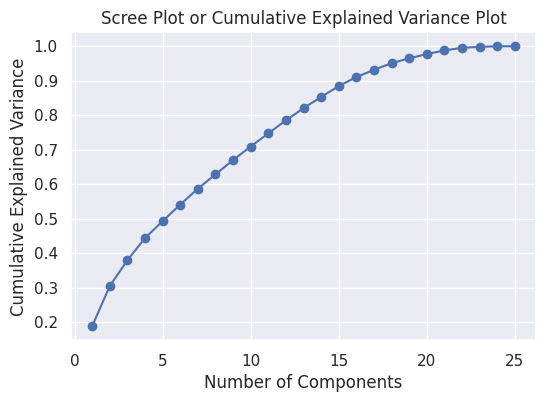

In [470]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)


# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [471]:
# Cumulative explained variance nikalen
cumulative_variance = np.cumsum(explained_variance)

# Kitne components select karna hai, yeh decide karen
desired_variance = 0.95  # Example: 95% variance ko capture karna hai

# Kitne components select kiye ja sakte hain
num_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"\nNumber of components selected: {num_components}")


Number of components selected: 18


In [472]:
train_data_sc.shape

(1176, 25)

In [473]:
pc = PCA(n_components=18)
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [474]:
print("train_data_sc_pc : ",train_data_sc_pc.shape)
print("test_data_sc_pc : ",test_data_sc_pc.shape)

train_data_sc_pc :  (1176, 18)
test_data_sc_pc :  (294, 18)


# **Model**

#### **LogisticRegression**

In [475]:
model_lr = LogisticRegression().fit(train_data_sc_pc,train_label)

In [476]:
model_lr.score(train_data_sc_pc,train_label)

0.8647959183673469

In [477]:
y_pred_1 = model_lr.predict(test_data_sc_pc)

In [478]:
print("Train Data Accuracy :",(model_lr.score(train_data_sc_pc,train_label)))
print("Test Data Accuracy :",(accuracy_score(y_pred_1,test_label)))

Train Data Accuracy : 0.8647959183673469
Test Data Accuracy : 0.8095238095238095


In [479]:
confusion_matrix(y_pred_1,test_label)

array([[232,  43],
       [ 13,   6]])

In [480]:
print(classification_report(y_pred_1,test_label))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       275
           1       0.12      0.32      0.18        19

    accuracy                           0.81       294
   macro avg       0.53      0.58      0.53       294
weighted avg       0.89      0.81      0.85       294



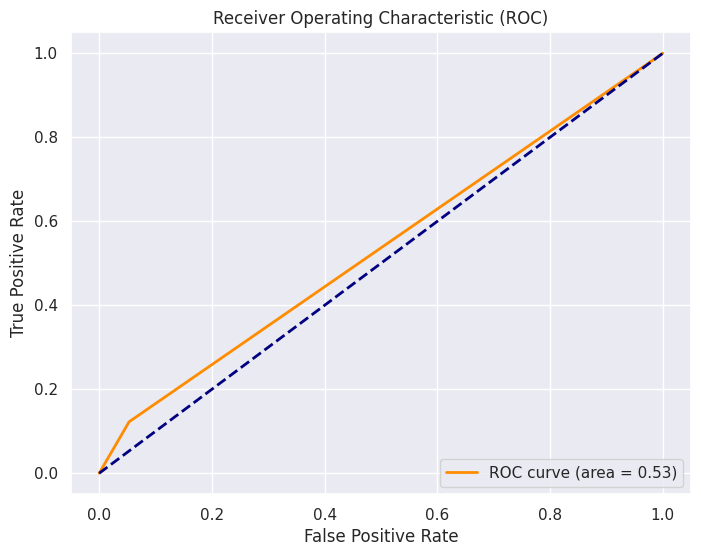

In [481]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_1)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### **Random Forest model**

In [482]:
model_rf = RandomForestClassifier().fit(train_data_sc_pc,train_label)

In [483]:
y_pred_2 = model_rf.predict(test_data_sc_pc)

In [484]:
print("Train Data Accuracy :",(model_rf.score(train_data_sc_pc,train_label)))
print("Test Data Accuracy :",(accuracy_score(y_pred_2,test_label)))

Train Data Accuracy : 1.0
Test Data Accuracy : 0.826530612244898


In [485]:
confusion_matrix(y_pred_2,test_label)

array([[240,  46],
       [  5,   3]])

In [486]:
print(classification_report(y_pred_2,test_label))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       286
           1       0.06      0.38      0.11         8

    accuracy                           0.83       294
   macro avg       0.52      0.61      0.50       294
weighted avg       0.95      0.83      0.88       294



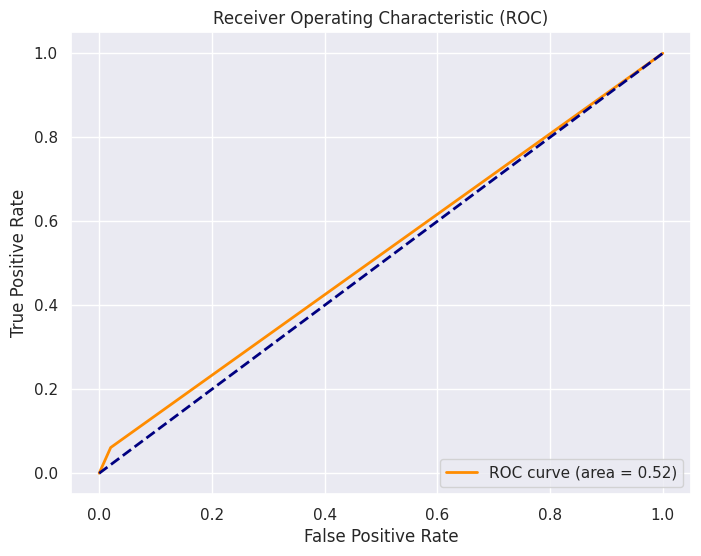

In [487]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_2)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [488]:
print("Cross_val_score : ",cross_val_score(model_rf,train_data_sc_pc,train_label,cv=5).mean())
print("Cross_val_score : ",cross_val_score(model_rf,test_data_sc_pc,test_label,cv=5).mean())

Cross_val_score :  0.850342589253516
Cross_val_score :  0.853769725306838


#### **XGBOOST**

In [489]:
model_xg = xgb.XGBClassifier().fit(train_data_sc_pc,train_label)

In [490]:
y_pred_3 = model_xg.predict(test_data_sc_pc)

In [491]:
print("Train Data Score : ",model_xg.score(train_data_sc_pc,train_label))
print("Test Data Accuracy Score : ",accuracy_score(y_pred_3,test_label))

Train Data Score :  1.0
Test Data Accuracy Score :  0.8061224489795918


In [492]:
print("Corss _Val_Score Train Data : ",cross_val_score(model_xg,train_data_sc_pc,train_label,cv=5).mean())
print("Corss _Val_Score Test Data : ",cross_val_score(model_xg,test_data_sc_pc,test_label,cv=5).mean())

Corss _Val_Score Train Data :  0.8494879192210603
Corss _Val_Score Test Data :  0.8264172998246639


In [493]:
print(classification_report(y_pred_3,test_label))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       264
           1       0.22      0.37      0.28        30

    accuracy                           0.81       294
   macro avg       0.57      0.61      0.58       294
weighted avg       0.85      0.81      0.83       294



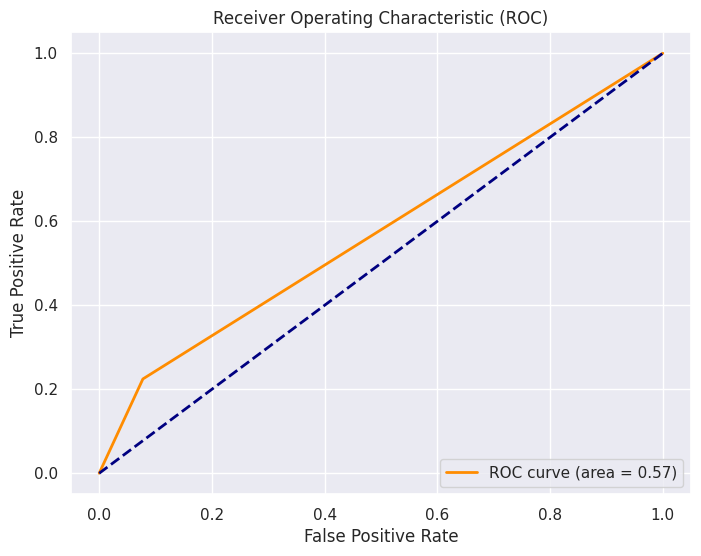

In [494]:
from sklearn.metrics._plot.roc_curve import auc
fpr, tpr, thresholds = roc_curve(test_label, y_pred_3)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()